# Plotting distributions from datacards (combine ones)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [9]:
# OPTIONS FOR USER
fractions = False
channel = "tt"
analysis = "cpdecays"
year = "2018"
signal_scale = 50
norm_mc = False
mva_categories = None
embedding = True
ff = True
signals = ["H_sm", "H_ps"]
#signals = ["H_sm"]
#signals = []
to_plot = "prefit"
df_plot_alt = None

leg_kw = {"offaxis": True, "fontsize": 9, "labelspacing":0.12,}

variables = [
    "IC_15Mar2020_max_score",
    "Bin number",
]

In [4]:
from plotting import draw_1d, create_df, draw_signal_ratio
from plotting import var_kw, process_kw, nbins_kw
import oyaml as yaml
import pandas as pd
import numpy as np

ch_kw = {}
with open("plot_kw.yaml", "r") as f:
    try:
        ch_kw = yaml.safe_load(f)
    except yaml.YAMLError as exc:
        print(exc)
# for including FF
if ff:
    ch_kw = {}
    with open("plot_kw_postfit.yaml", "r") as f:
        try:
            ch_kw = yaml.safe_load(f)
        except yaml.YAMLError as exc:
            print(exc)
if embedding:
    for ch, proc in ch_kw.items():
        if ch in ["tt", "mt", "et", "em",]:
            proc["EmbedZTT"] = ["EmbedZTT"]
            del proc["ZTT"]

In [5]:
if embedding and ff:
    processes = ['data_obs', 'EmbedZTT', 'ZL', 'TTT', 'VVT', 'jetFakes',]
elif ff:
    processes = ['data_obs', 'ZTT', 'ZL', 'TTT', 'VVT', 'jetFakes', 'EWKZ',]
elif embedding:
    processes = ['data_obs', 'EmbedZTT', 'ZL', 'TTT', 'VVT', 'VVJ', 'W', 'QCD', 'ZJ']
else:
    processes = ['data_obs', 'ZTT', 'ZL', 'ZJ', 'TTT', 'TTJ', 'VVT', 'VVJ', 'W', 'QCD', 'EWKZ',]
if len(signals) > 0:
    processes.extend([
        "ggH_sm_htt", "qqH_sm_htt", #"ZH_sm_htt", "WH_sm_htt",
        "ggH_ps_htt", "qqH_ps_htt", #"ZH_ps_htt", "WH_ps_htt",
    ])

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_5_13TeV_prefit' at 0x7f079c9a31d0>: set weights to 10^{-10}
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_5_13TeV_prefit' at 0x7f079c7a73c8>: set weights to 10^{-10}
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f079c772cf8>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f079c870048>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f071d430a20>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f079c877518>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f079c7145f8>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f079c714438>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading 

/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_8_13TeV_prefit' at 0x7f078845e8d0>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_8_13TeV_prefit' at 0x7f078845abe0>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1996: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f074dd682b0>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f074dd68208>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f074dd68278>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f074dd63668>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f074dd63550>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f074dd63518>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Lo

/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_5_13TeV_prefit' at 0x7f074d2db6d8>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_5_13TeV_prefit' at 0x7f074d1fd278>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1996: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f074d05f5c0>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f074d05f5f8>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f074d05f5c0>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f074d0616d8>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f074d0615f8>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f074d0614e0>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading 

/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_8_13TeV_prefit' at 0x7f074cee1cc0>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_8_13TeV_prefit' at 0x7f074cef55c0>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_8_13TeV_prefit' at 0x7f074cee1400>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_8_13TeV_prefit' at 0x7f074cee1828>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_9_13TeV_prefit' at 0x7f074858a0f0>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_9_13TeV_prefit' at 0x7f074858a0f0>: set weights to 10^{-10}
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_9_13TeV_prefit' at 0x7f074857eb38>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_9_13TeV_prefit' at 0x7f074857ea58>: set weights to 10^{-10}
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1996: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0743e634a8>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0743e632e8>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0743e63128>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0743e4f630>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0743e4f470>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0743e4f438>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Lo

/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asa

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_6_13TeV_prefit' at 0x7f0740f36358>: set weights to 10^{-10}
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2018_6_13TeV_prefit' at 0x7f0740f361d0>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_6_13TeV_prefit' at 0x7f0740f2f470>: set weights to 10^{-10}
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2018_6_13TeV_prefit' at 0x7f0740f2f2e8>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_9_13TeV_prefit' at 0x7f073e4672e8>: set weights to 10^{-10}
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_9_13TeV_prefit' at 0x7f073e3b7208>: set weights to 10^{-10}
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_11_13TeV_prefit' at 0x7f073db05a58>: set weights to 10^{-10}
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_11_13TeV_prefit' at 0x7f073ddd0cf8>: set weights to 10^{-10}
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125


/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
/home/hep/akd116/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1996: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspa

Loading qqH_ps_htt125
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_5_13TeV_prefit' at 0x7f0719541c18>: set weights to 10^{-10}
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_5_13TeV_prefit' at 0x7f0719487f98>: set weights to 10^{-10}
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f07191a0cc0>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f07191a0be0>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f07191a0ac8>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f071919c0b8>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f071919c048>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_6_13TeV_prefit' at 0x7f071919c198>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading 

/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_8_13TeV_prefit' at 0x7f0718925588>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_8_13TeV_prefit' at 0x7f0718797908>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f0718020048>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f0718023048>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f0718020048>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f071800e3c8>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f071800e2b0>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2016_11_13TeV_prefit' at 0x7f071800e400>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Lo

/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_5_13TeV_prefit' at 0x7f071752a9b0>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_5_13TeV_prefit' at 0x7f07174ab390>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f071715b940>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f071715b860>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f071715b780>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f07171695f8>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f07171695c0>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_6_13TeV_prefit' at 0x7f0717169400>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading 

/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_8_13TeV_prefit' at 0x7f07167930b8>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_8_13TeV_prefit' at 0x7f07167990b8>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_8_13TeV_prefit' at 0x7f07167a15c0>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_8_13TeV_prefit' at 0x7f07167a1668>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_9_13TeV_prefit' at 0x7f07166a9470>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_9_13TeV_prefit' at 0x7f07166a9470>: set weights to 10^{-10}
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_9_13TeV_prefit' at 0x7f07166382e8>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_9_13TeV_prefit' at 0x7f07166382e8>: set weights to 10^{-10}
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0715eb8400>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0715eb8320>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0715eb8240>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0715f67cf8>: set weights to 10^{-10}
Loading TTT
Not found TTT in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0715f67be0>: set weights to 10^{-10}
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2017_11_13TeV_prefit' at 0x7f0715f67a20>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Lo

/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_6_13TeV_prefit' at 0x7f07150aa3c8>: set weights to 10^{-10}
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2018_6_13TeV_prefit' at 0x7f07150924a8>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_6_13TeV_prefit' at 0x7f0715086748>: set weights to 10^{-10}
Loading TTT
Loading VVT
Not found VVT in <ROOTDirectory b'htt_tt_2018_6_13TeV_prefit' at 0x7f07150ab6a0>: set weights to 10^{-10}
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_9_13TeV_prefit' at 0x7f07145e8048>: set weights to 10^{-10}
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_9_13TeV_prefit' at 0x7f07145dac88>: set weights to 10^{-10}
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_11_13TeV_prefit' at 0x7f0714028860>: set weights to 10^{-10}
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Not found ZL in <ROOTDirectory b'htt_tt_2018_11_13TeV_prefit' at 0x7f071401aac8>: set weights to 10^{-10}
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt125
Loading qqH_sm_htt125
Loading ggH_ps_htt125
Loading qqH_ps_htt125


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/vols/build/cms/akd116/Notebooks/plotting.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

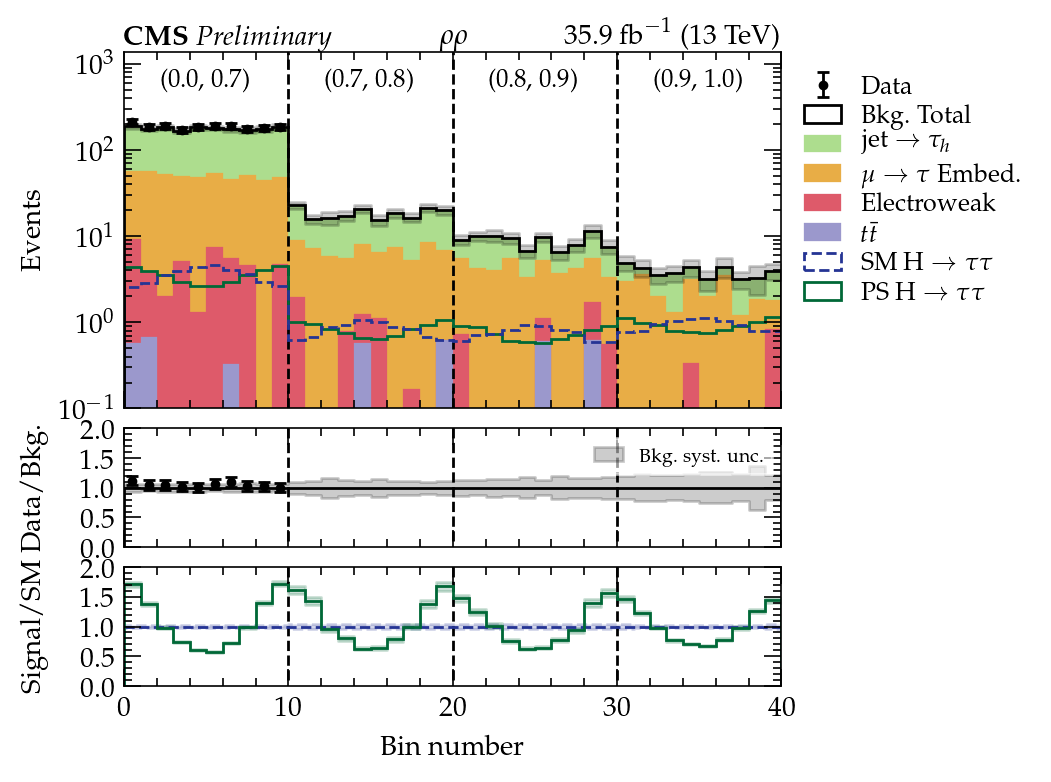

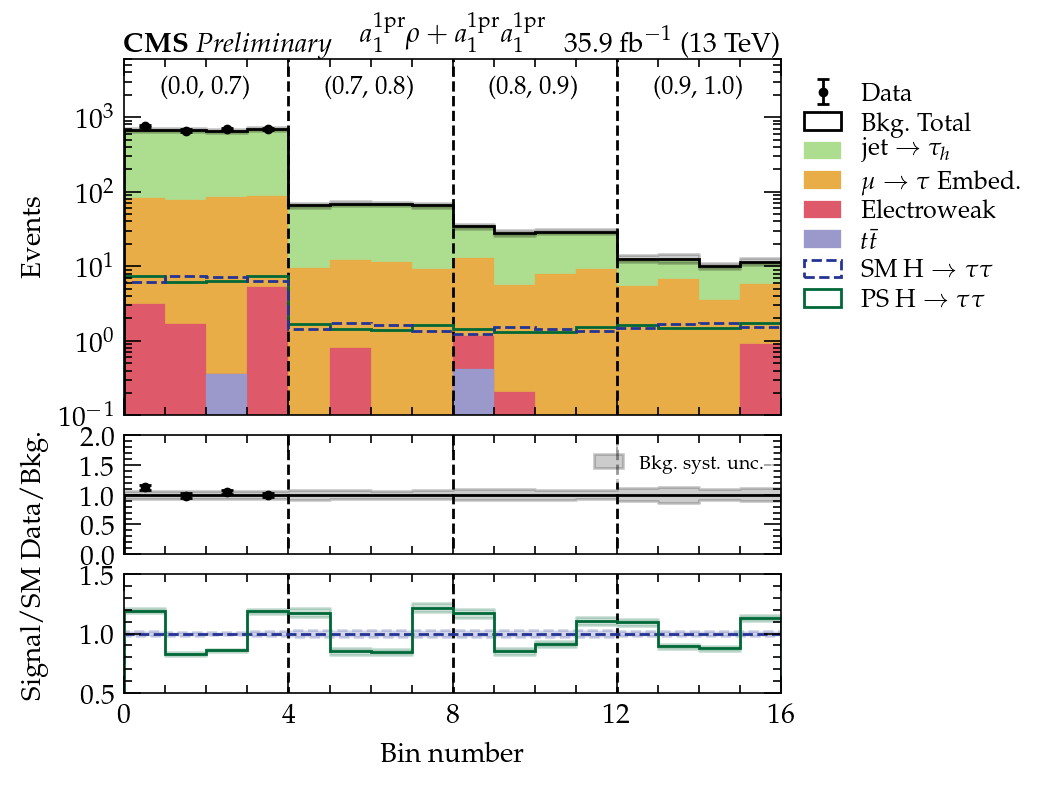

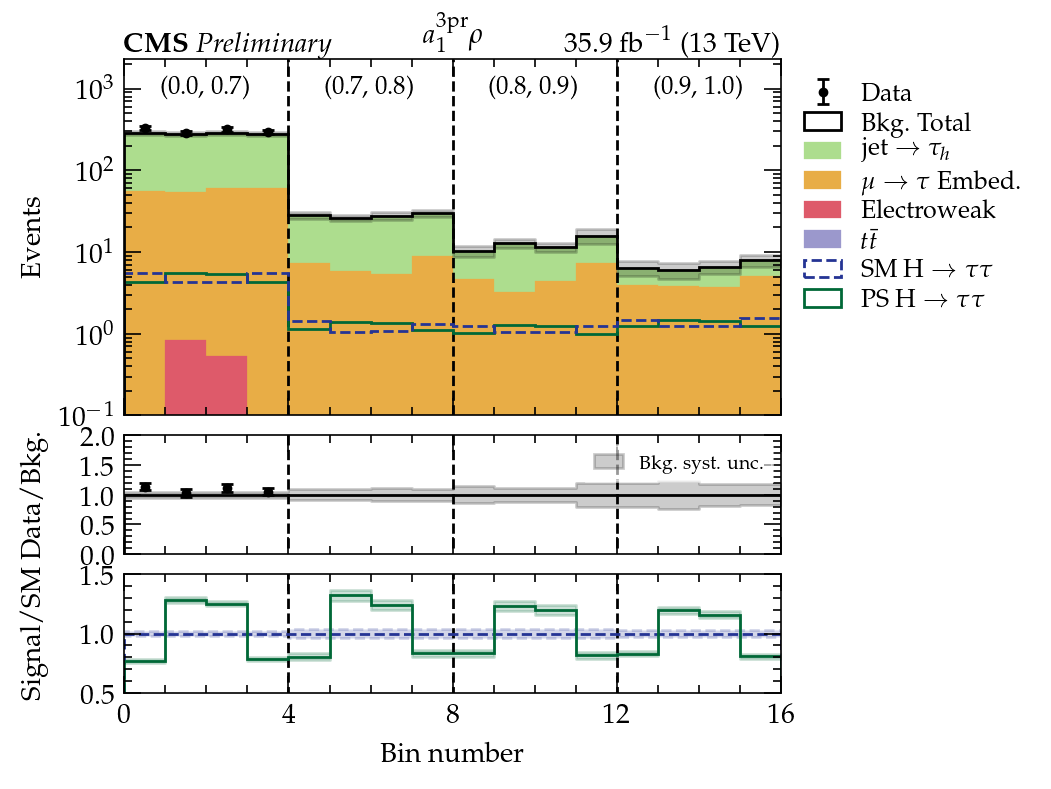

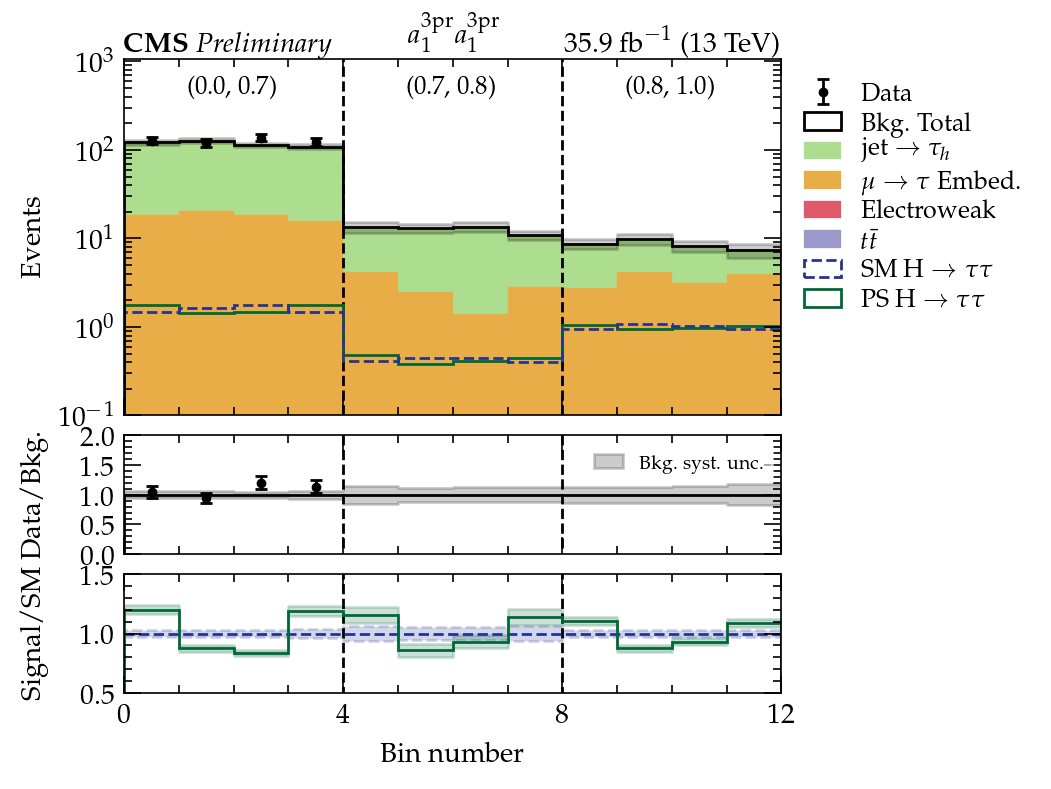

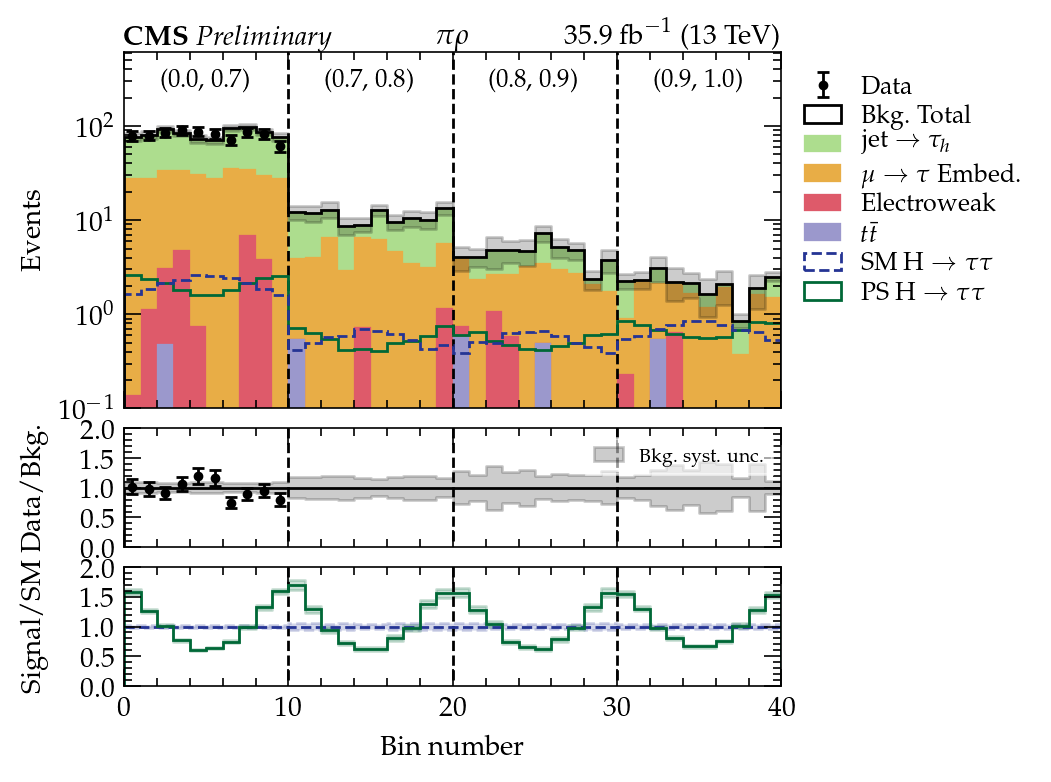

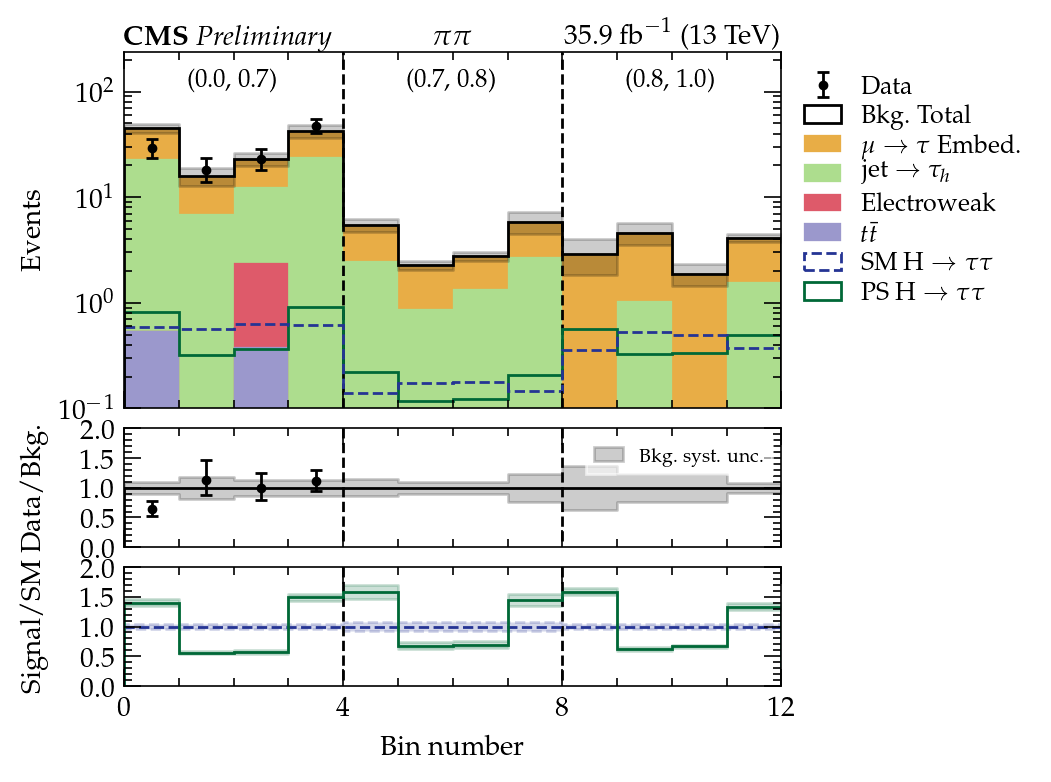

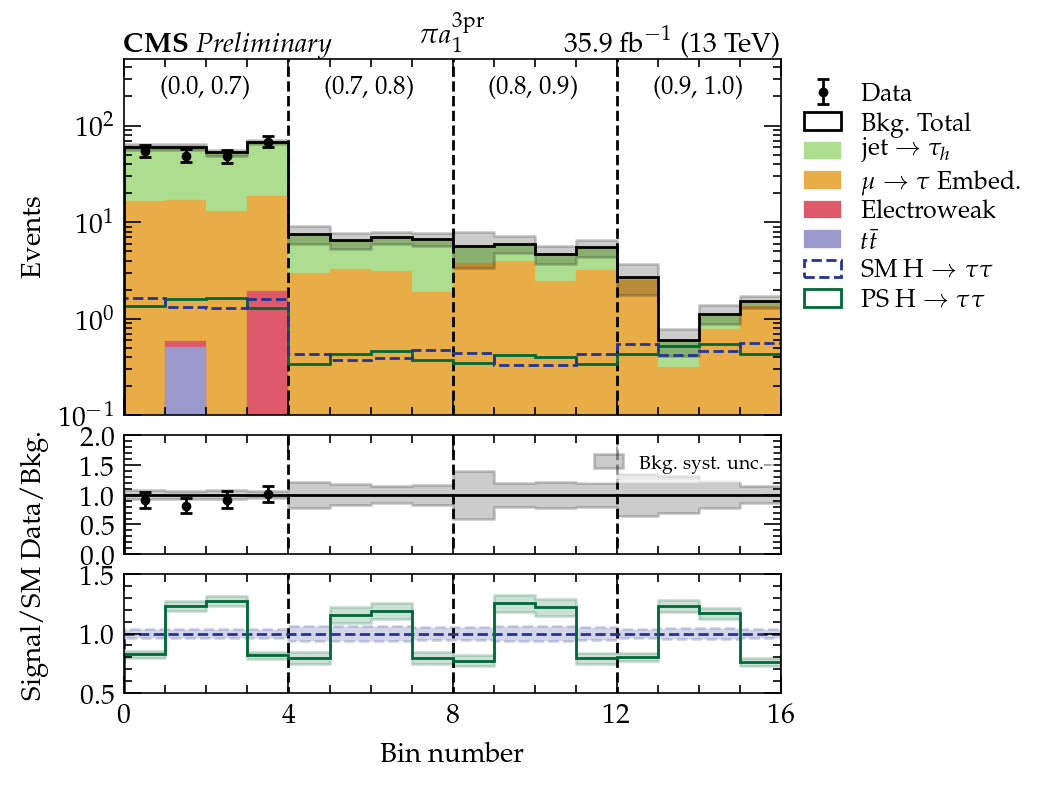

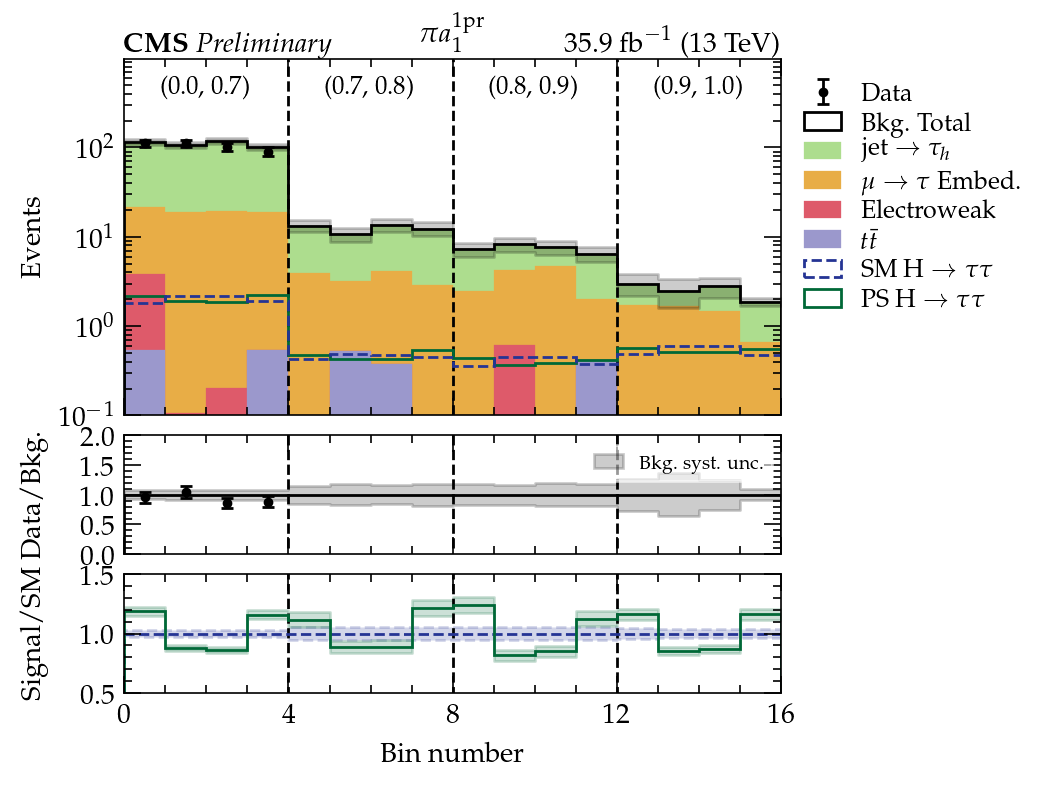

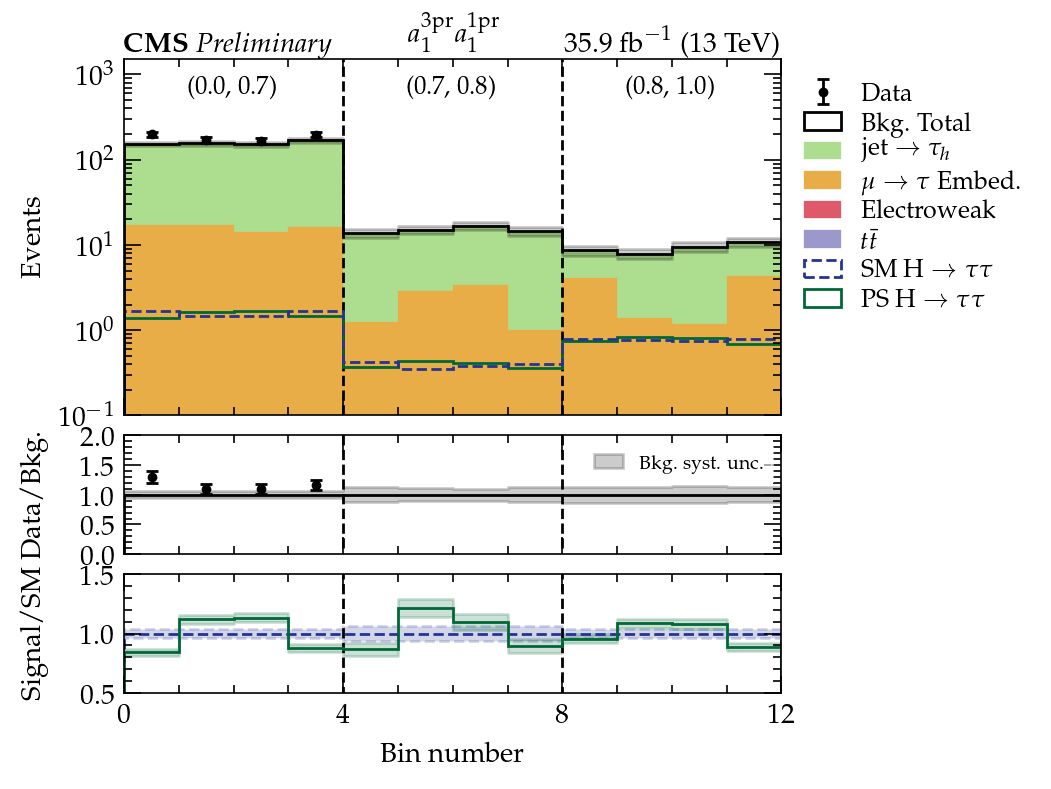

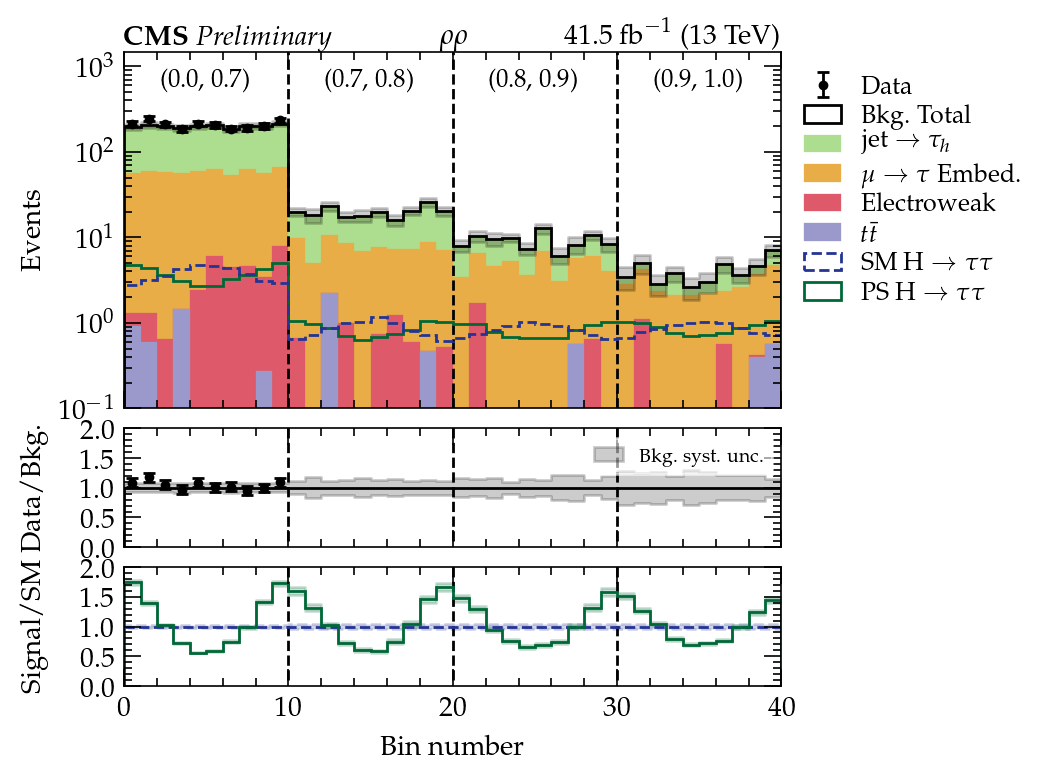

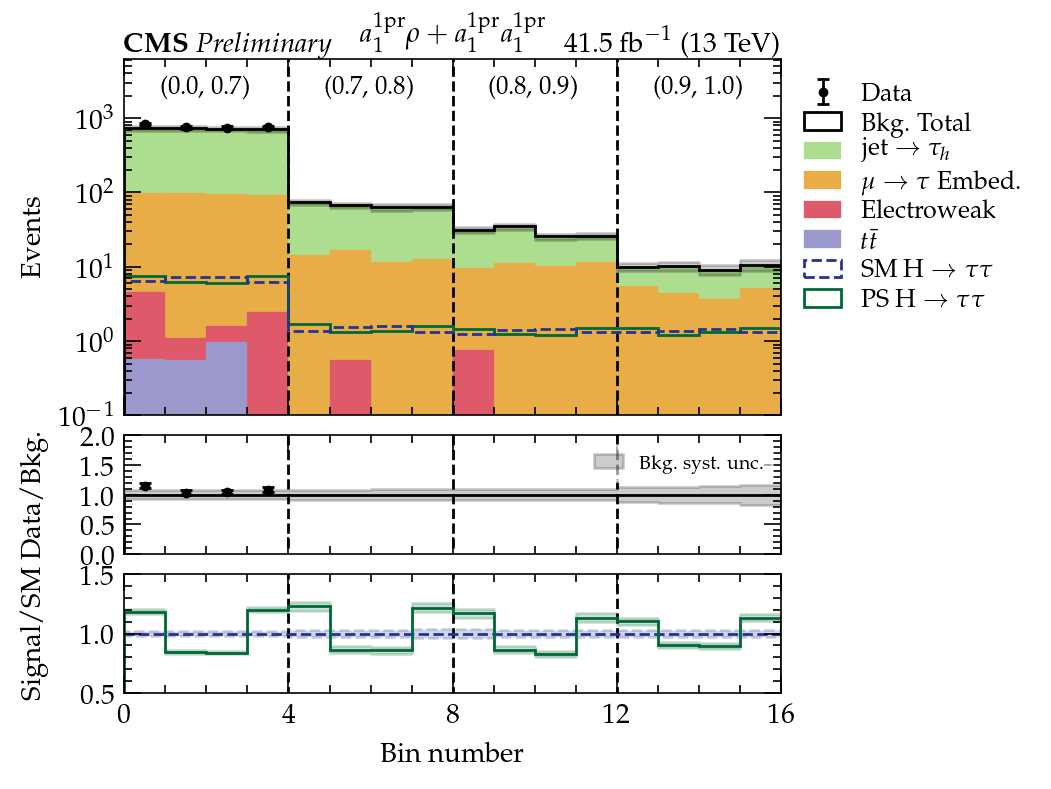

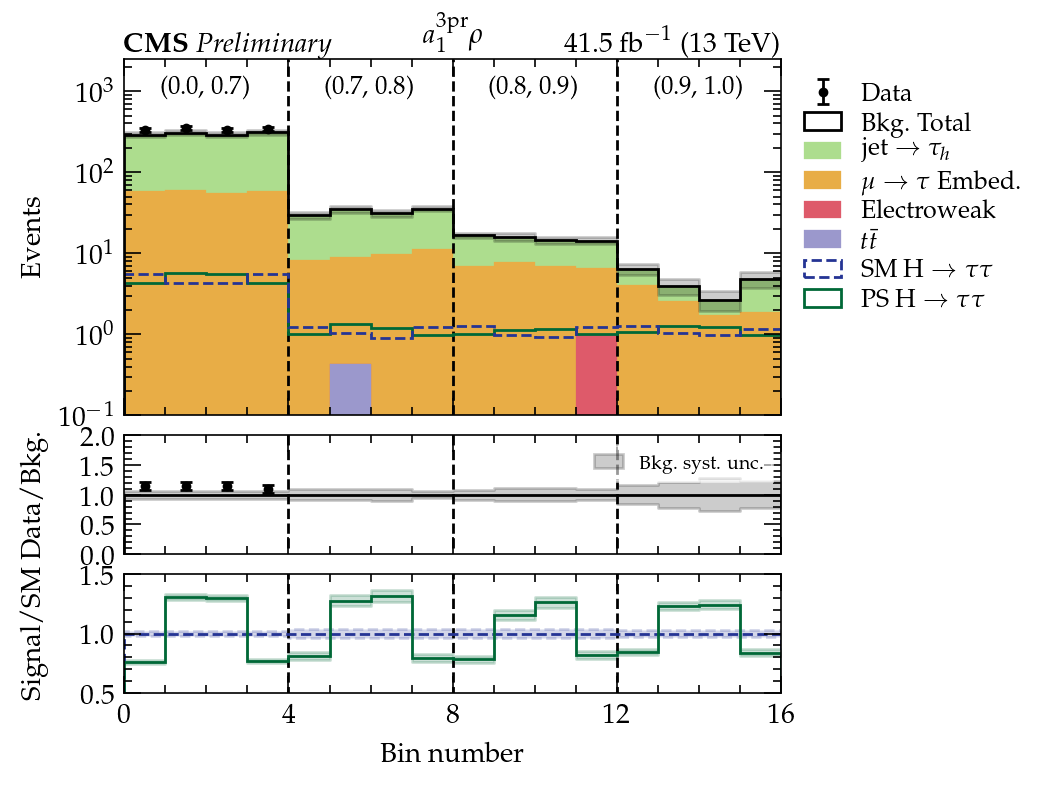

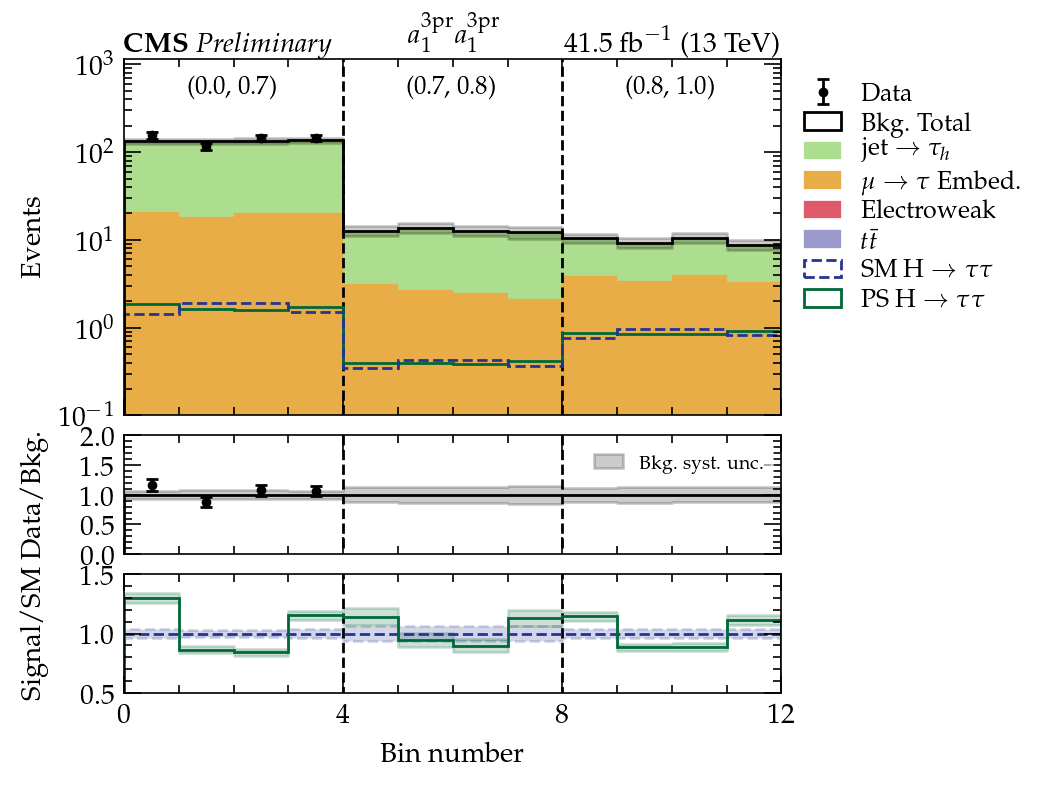

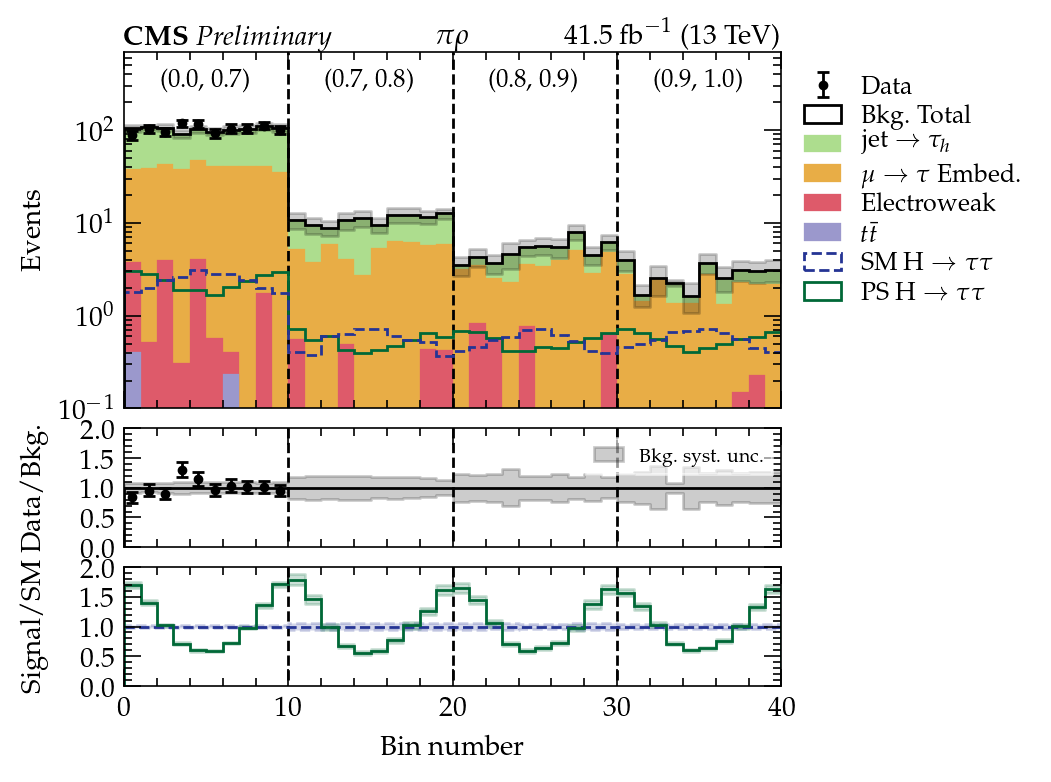

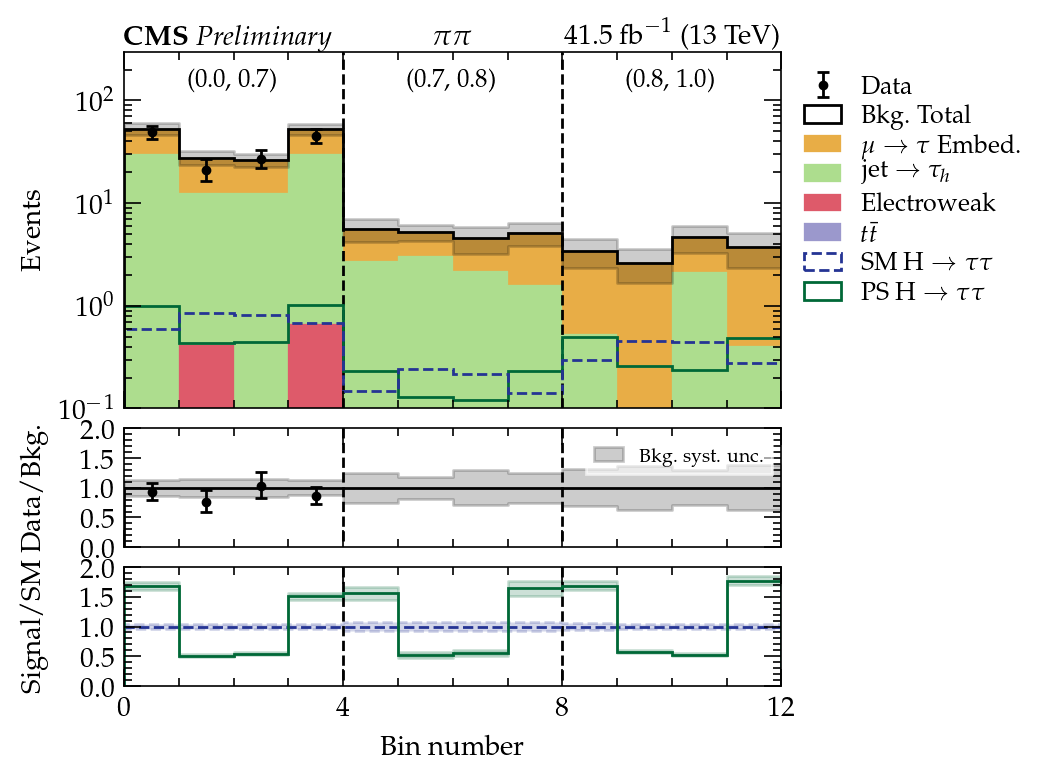

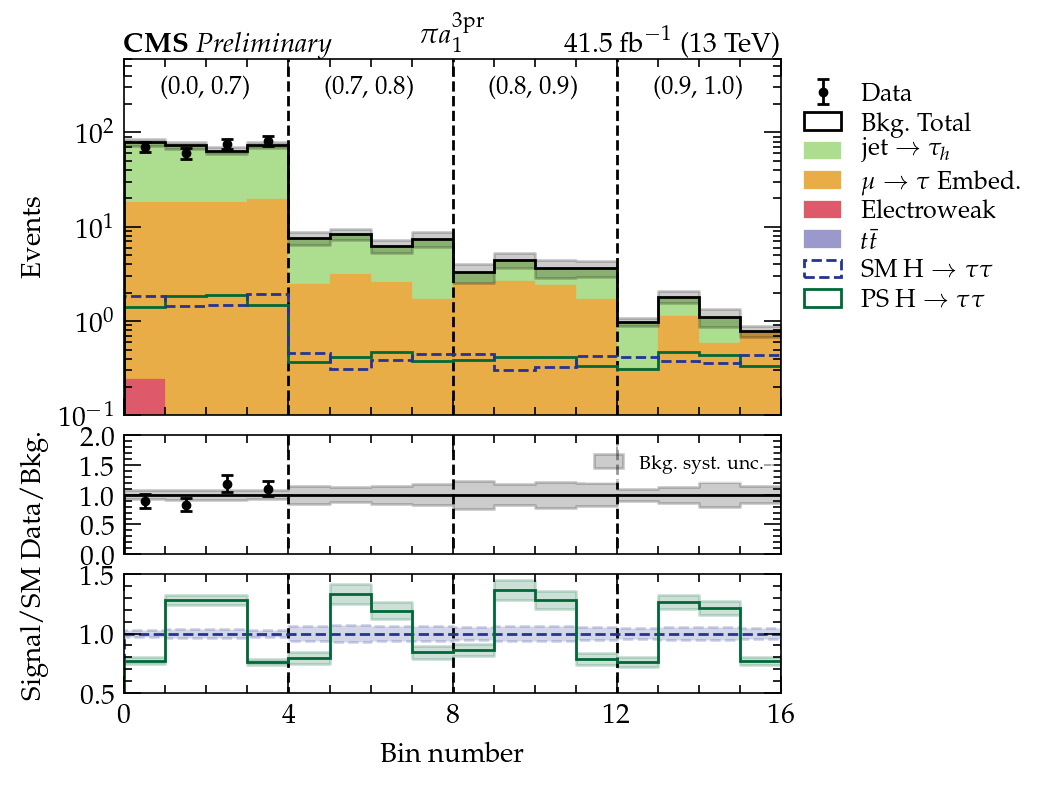

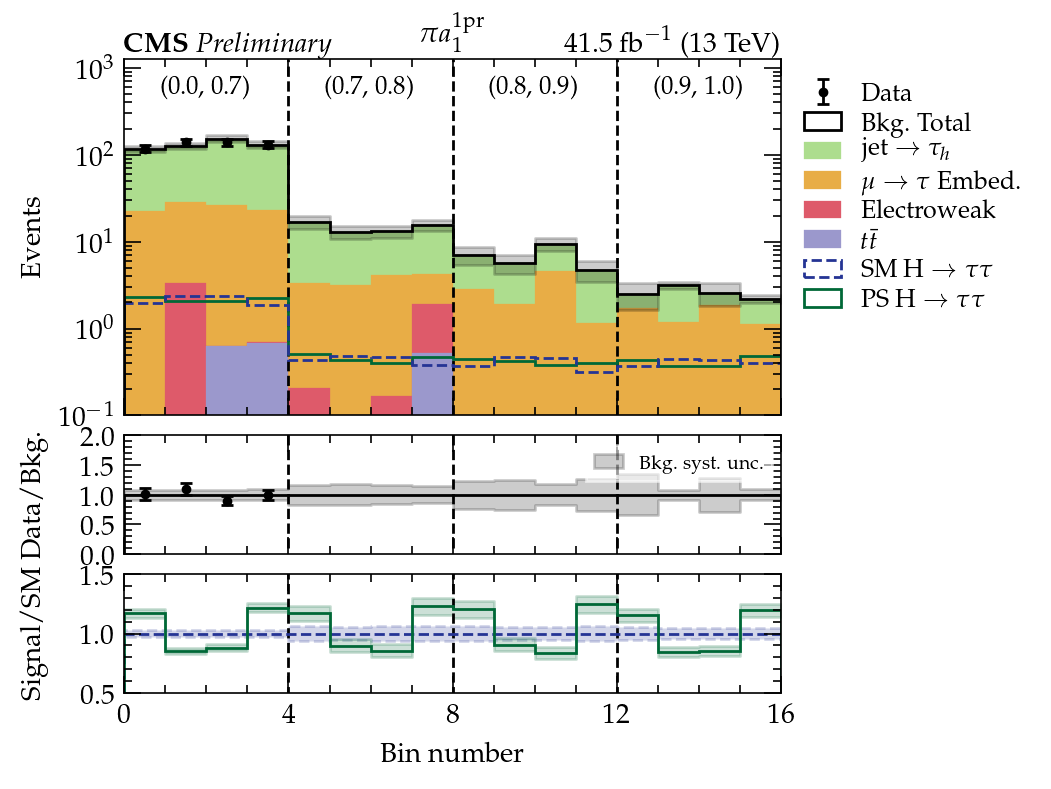

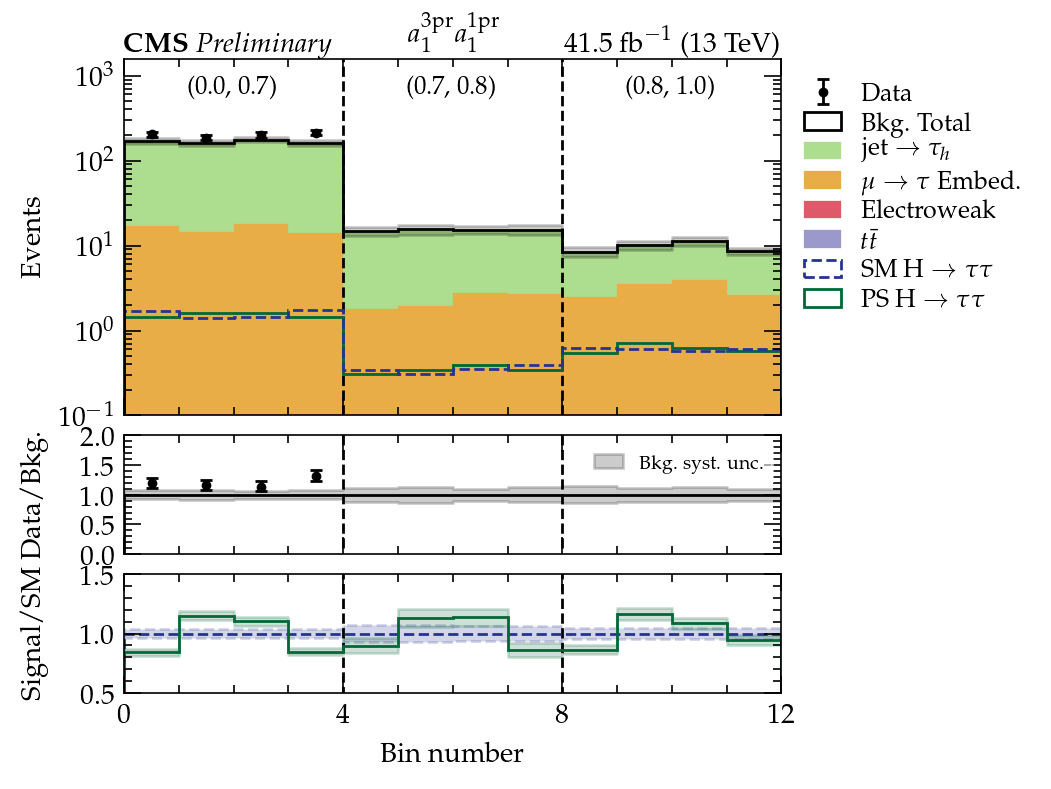

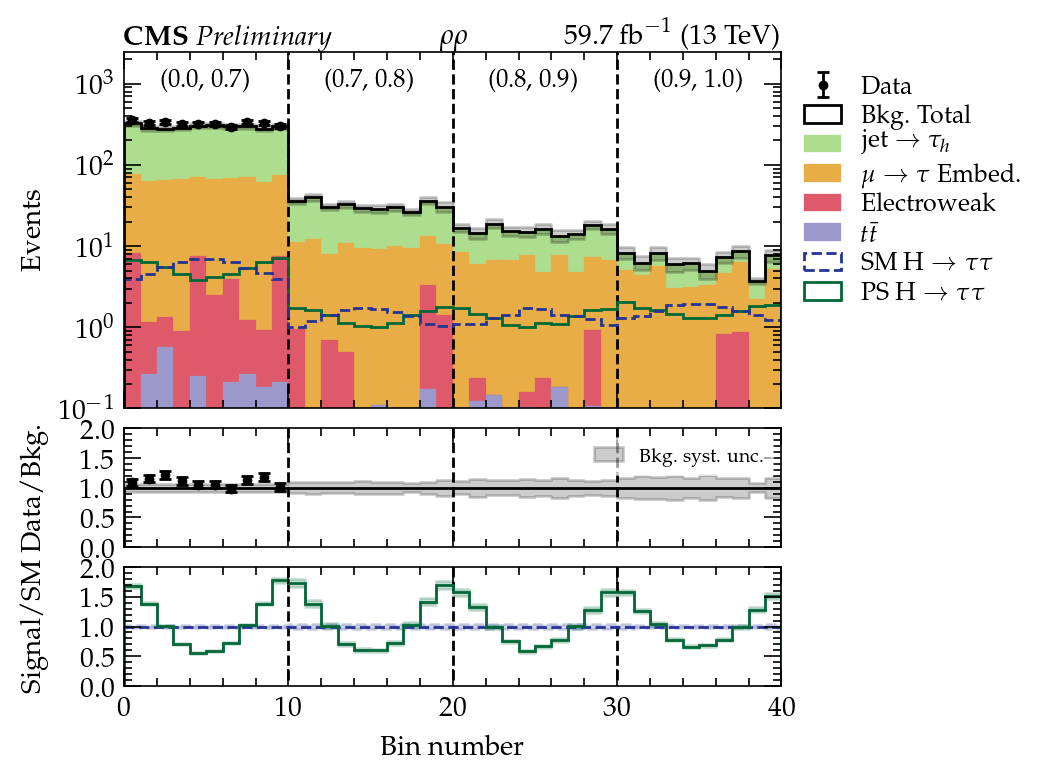

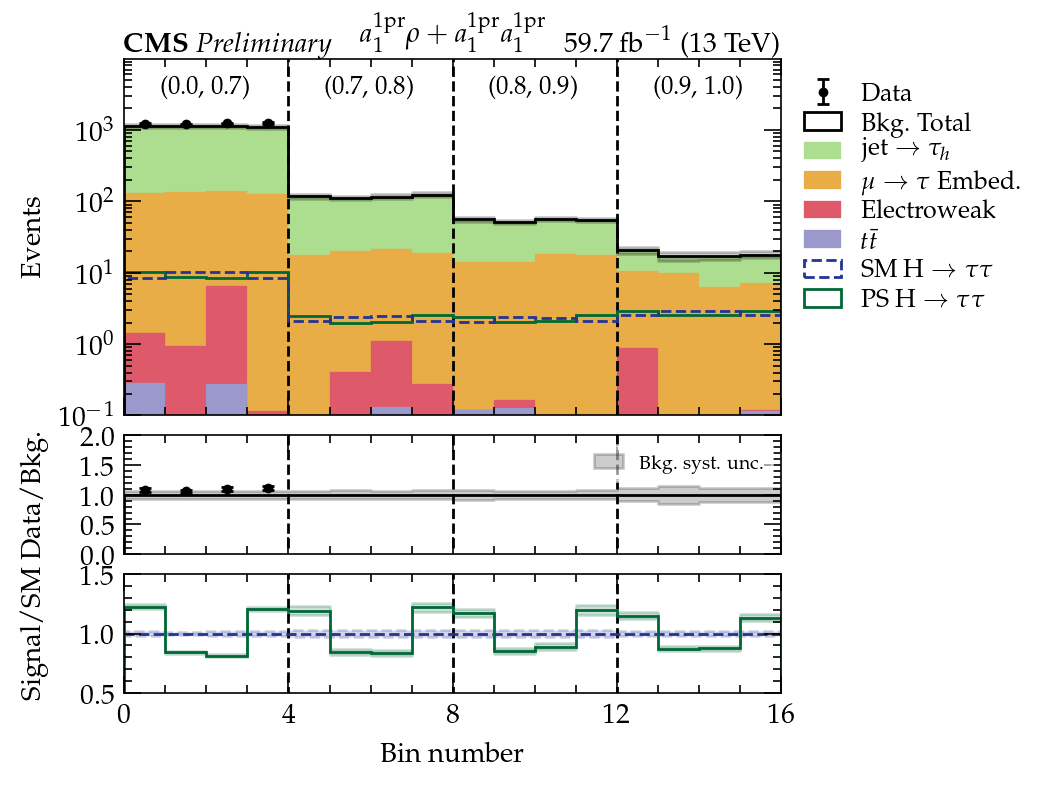

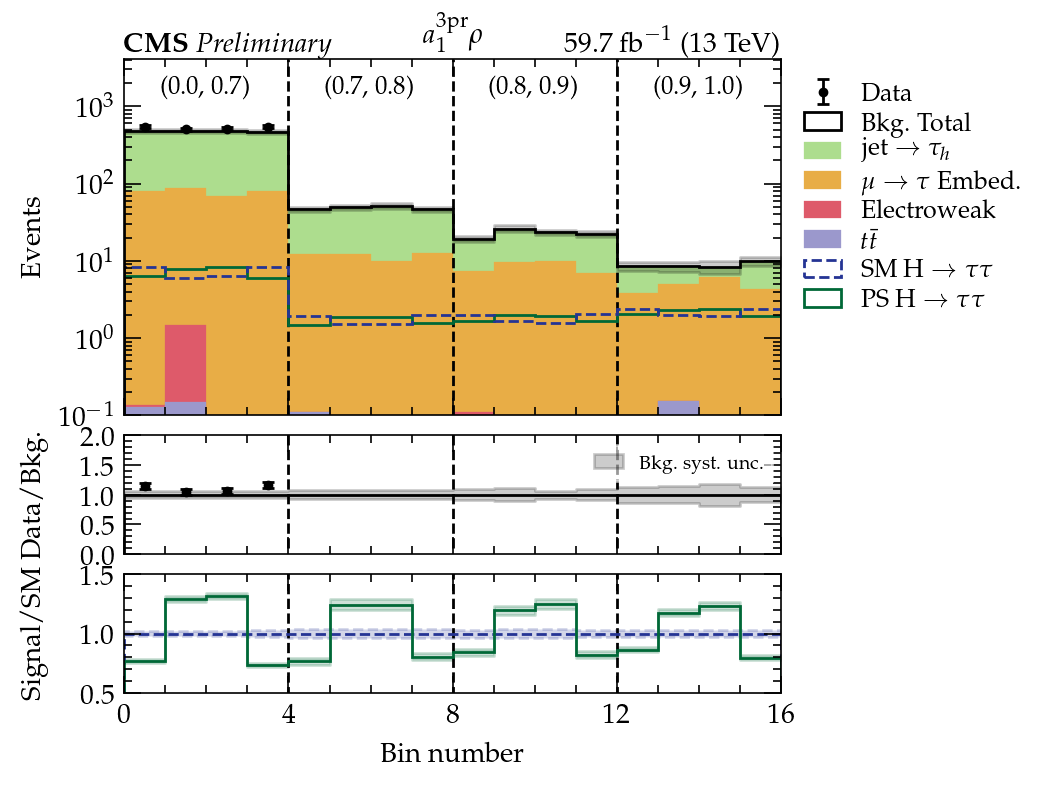

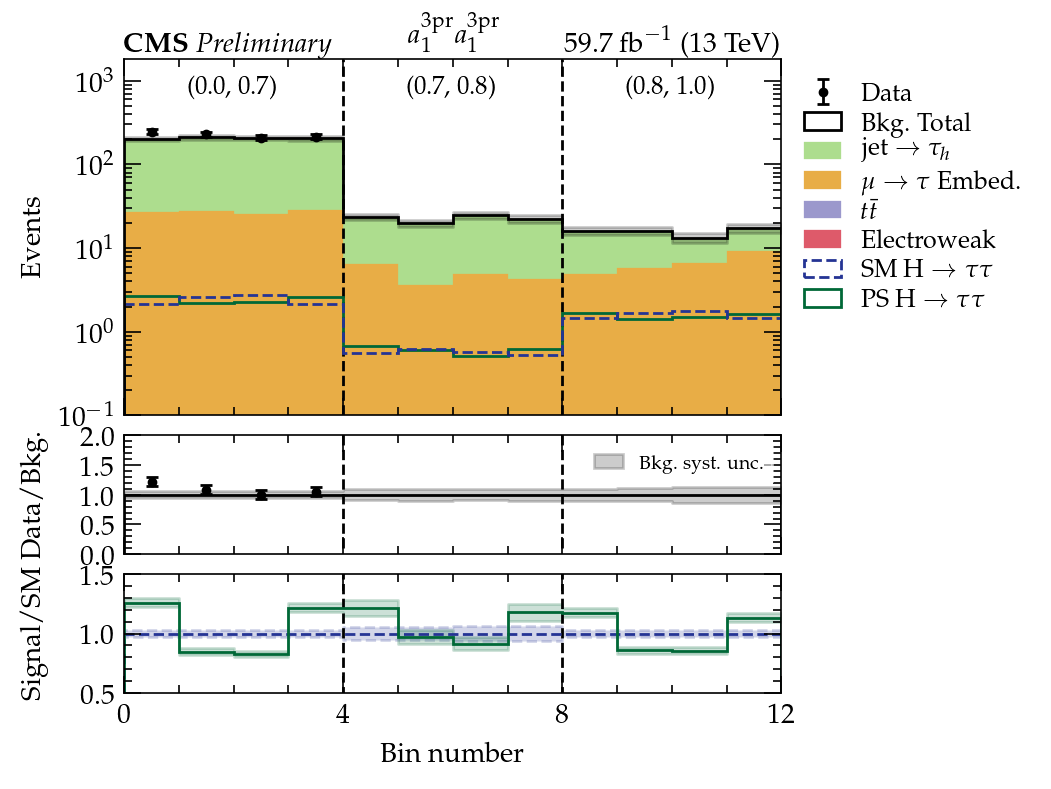

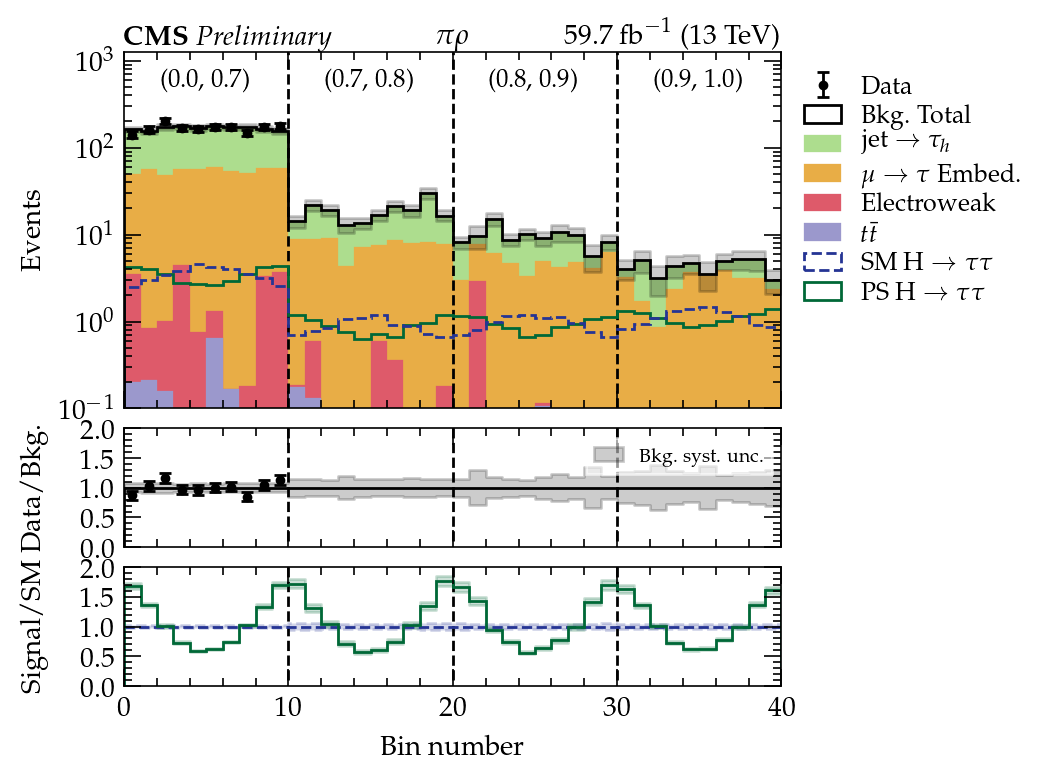

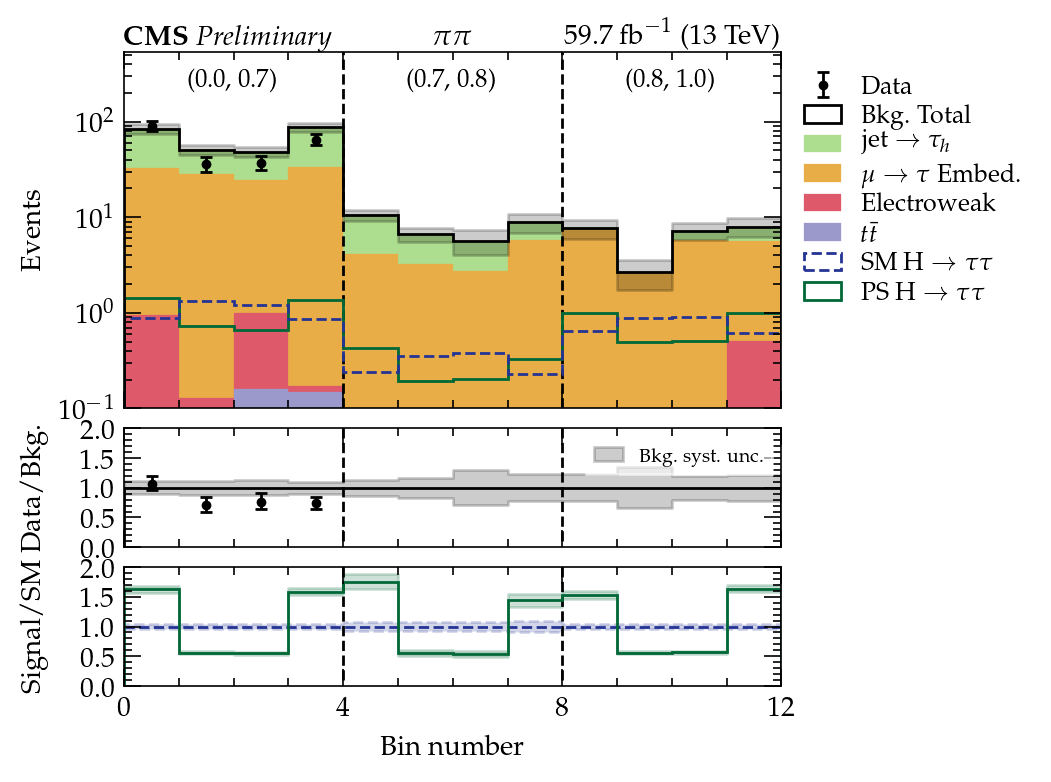

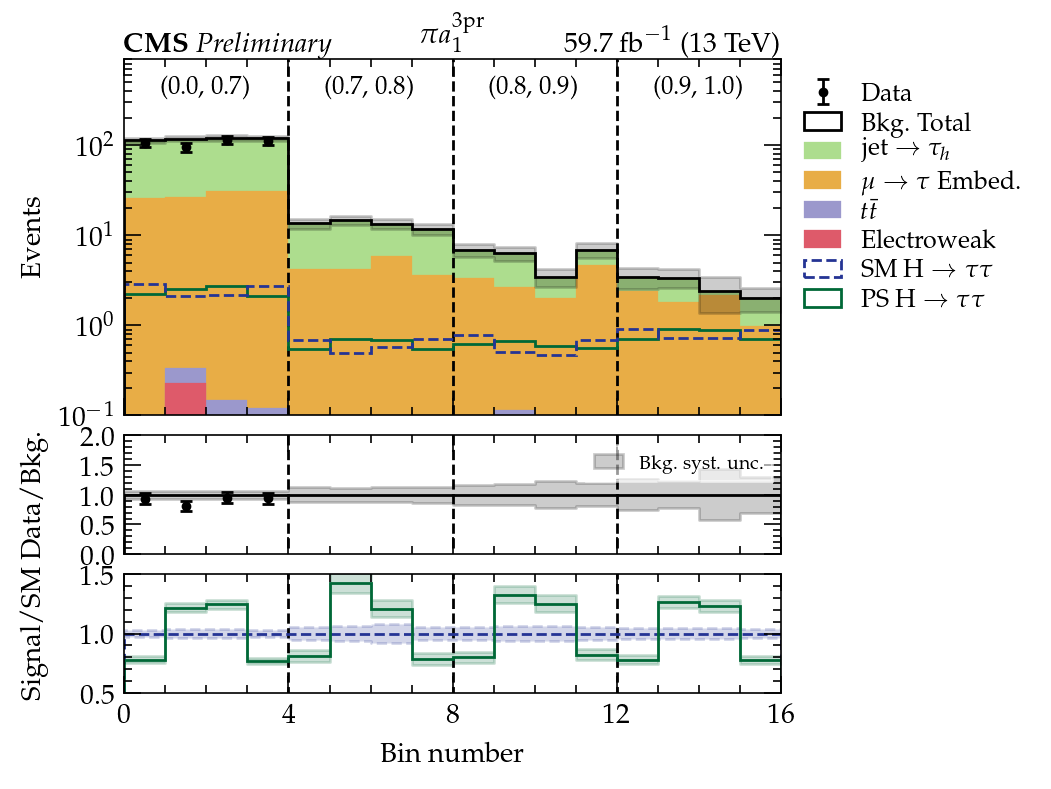

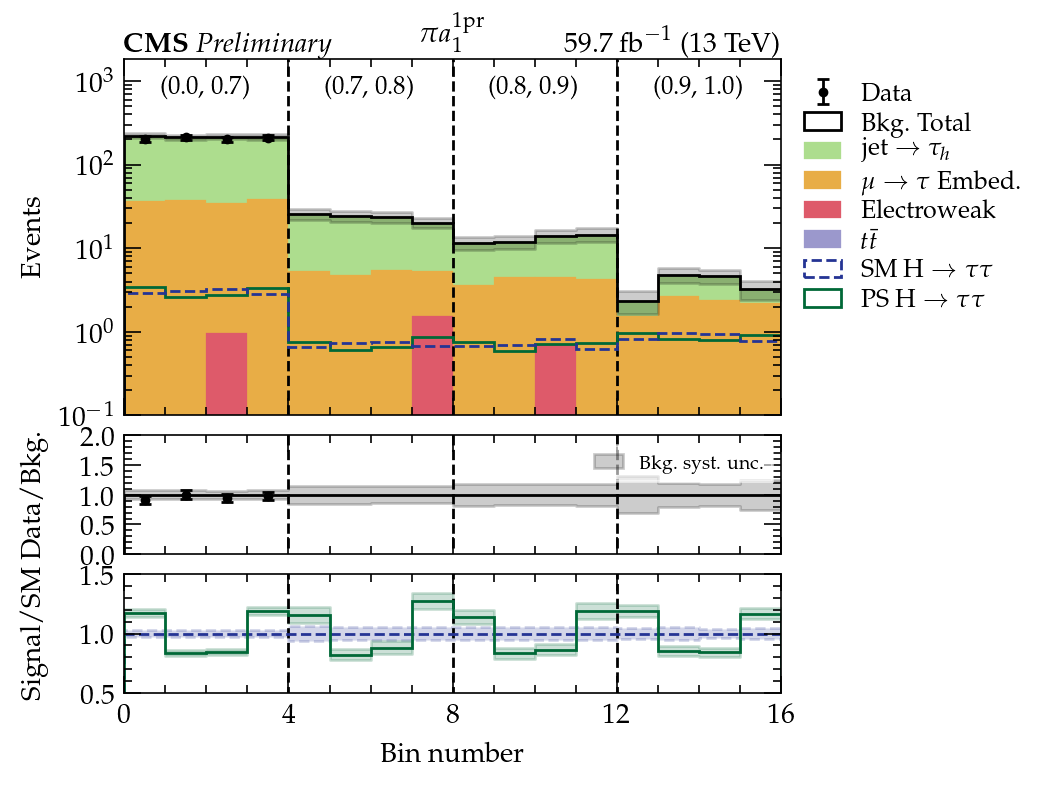

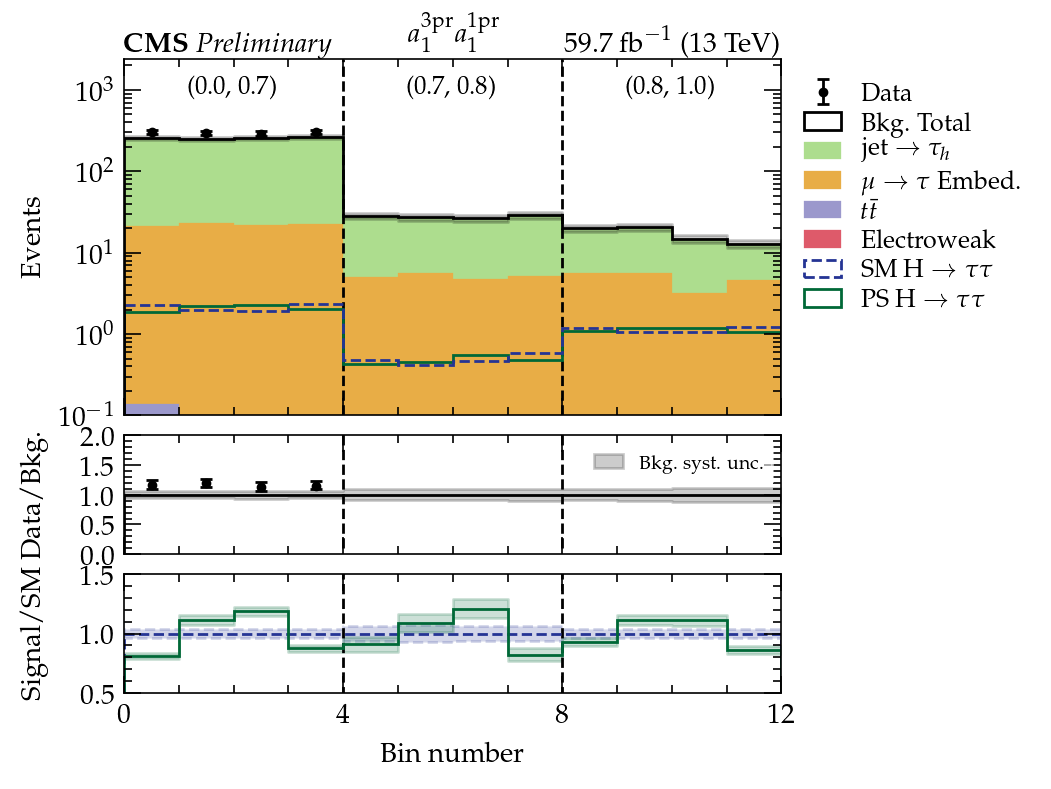

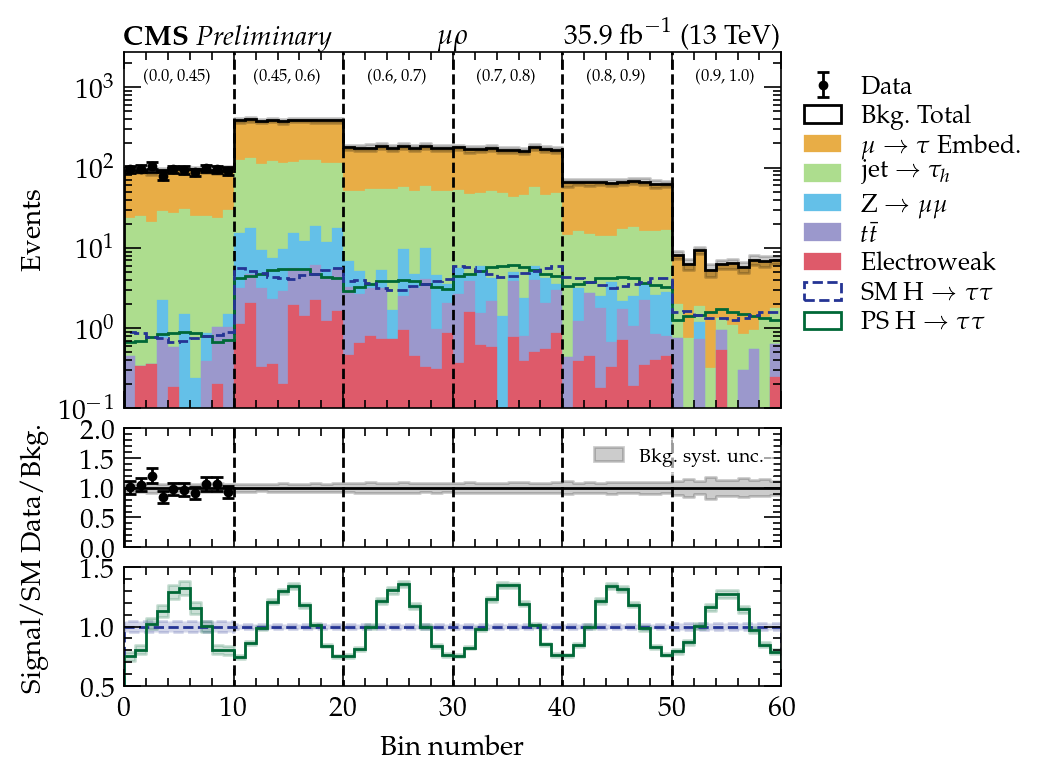

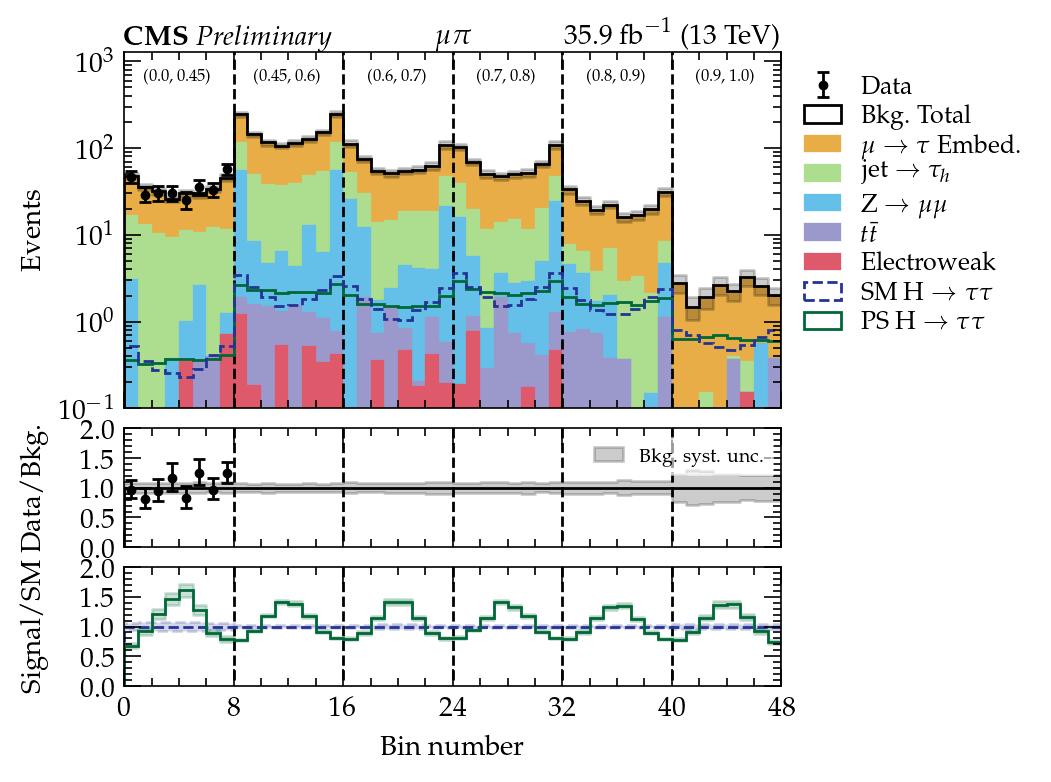

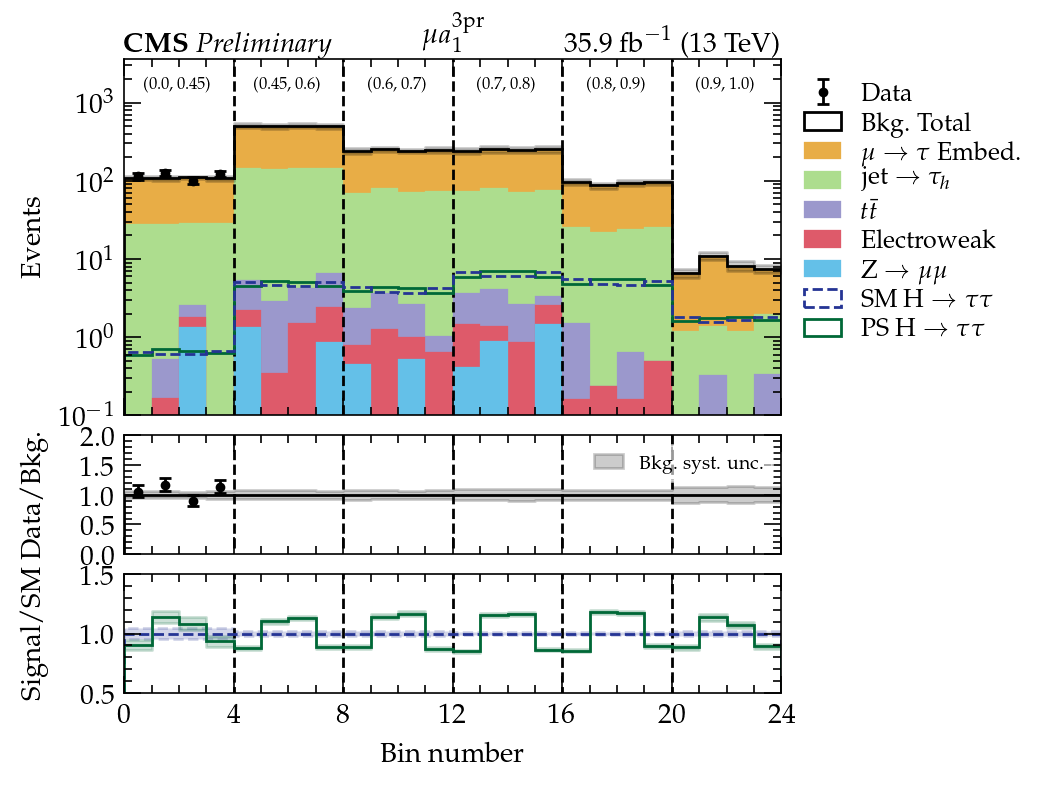

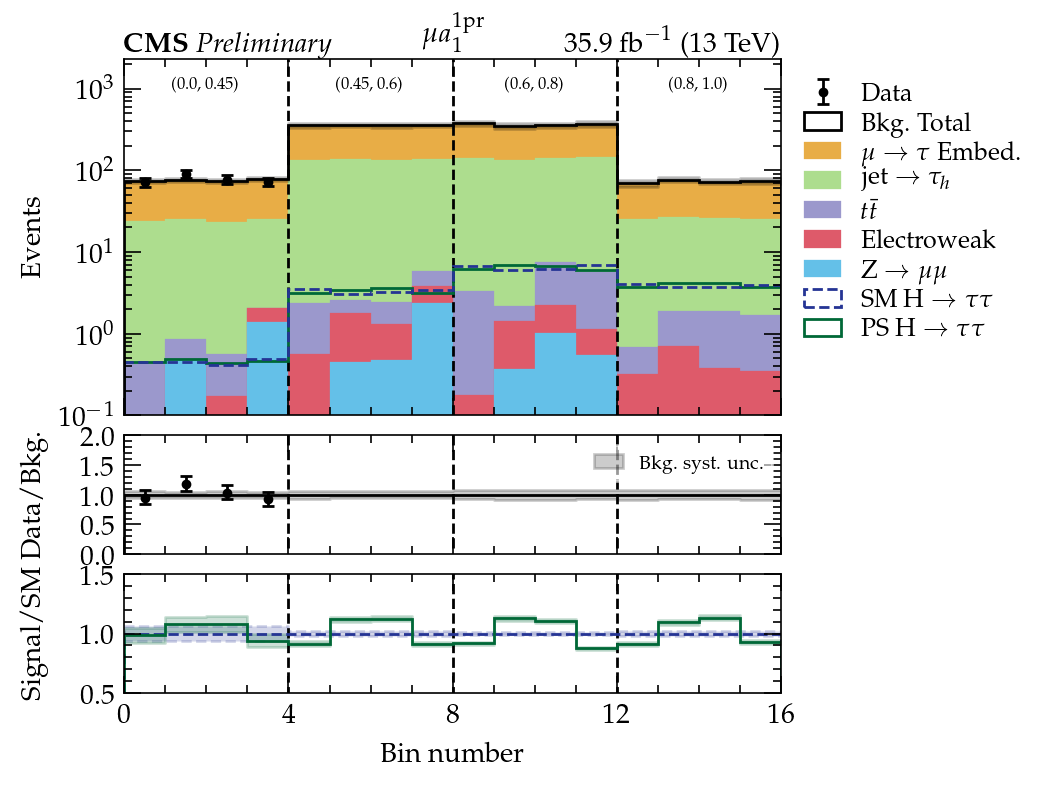

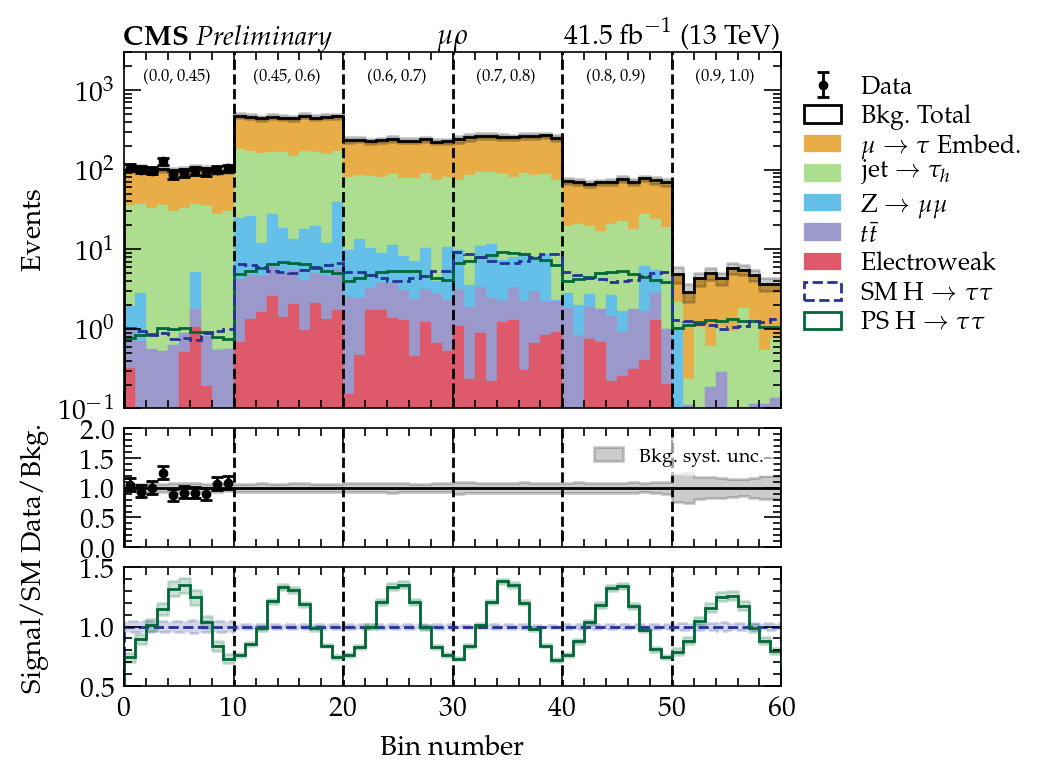

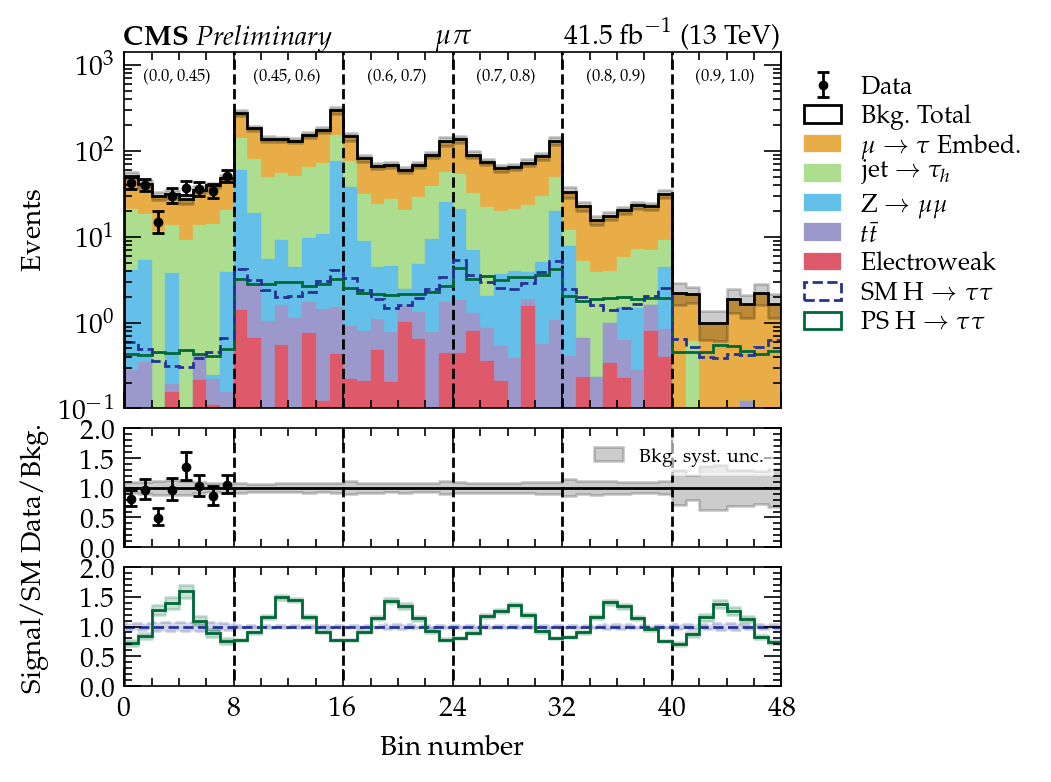

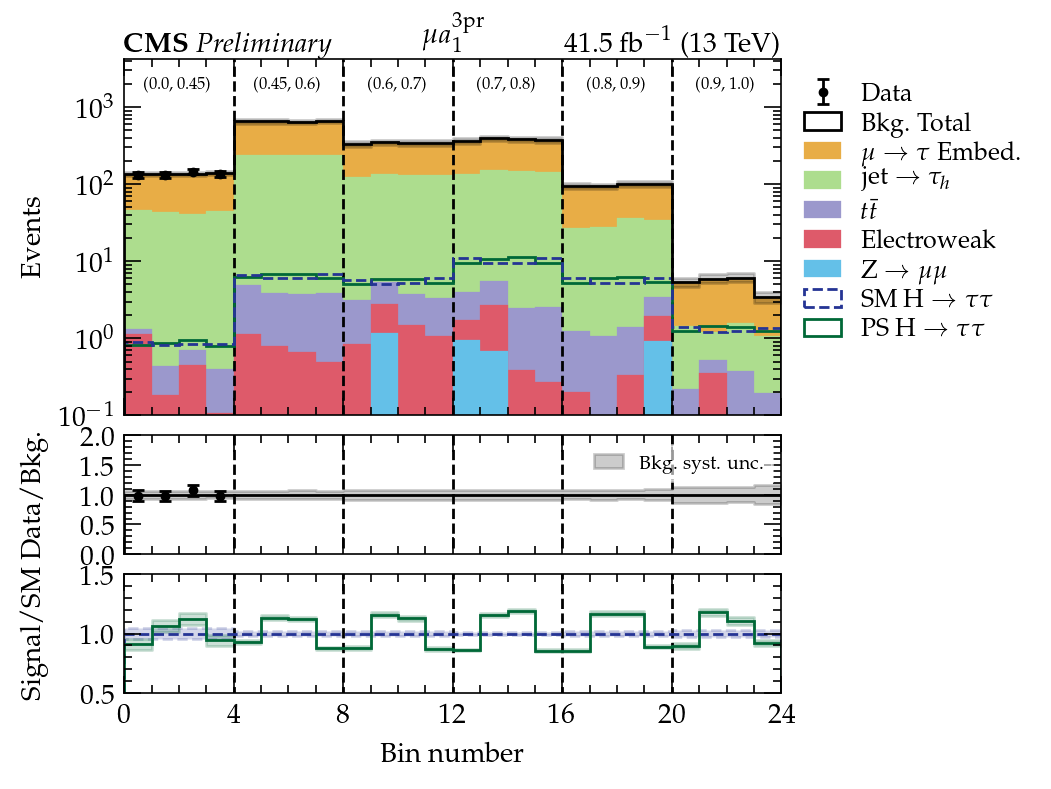

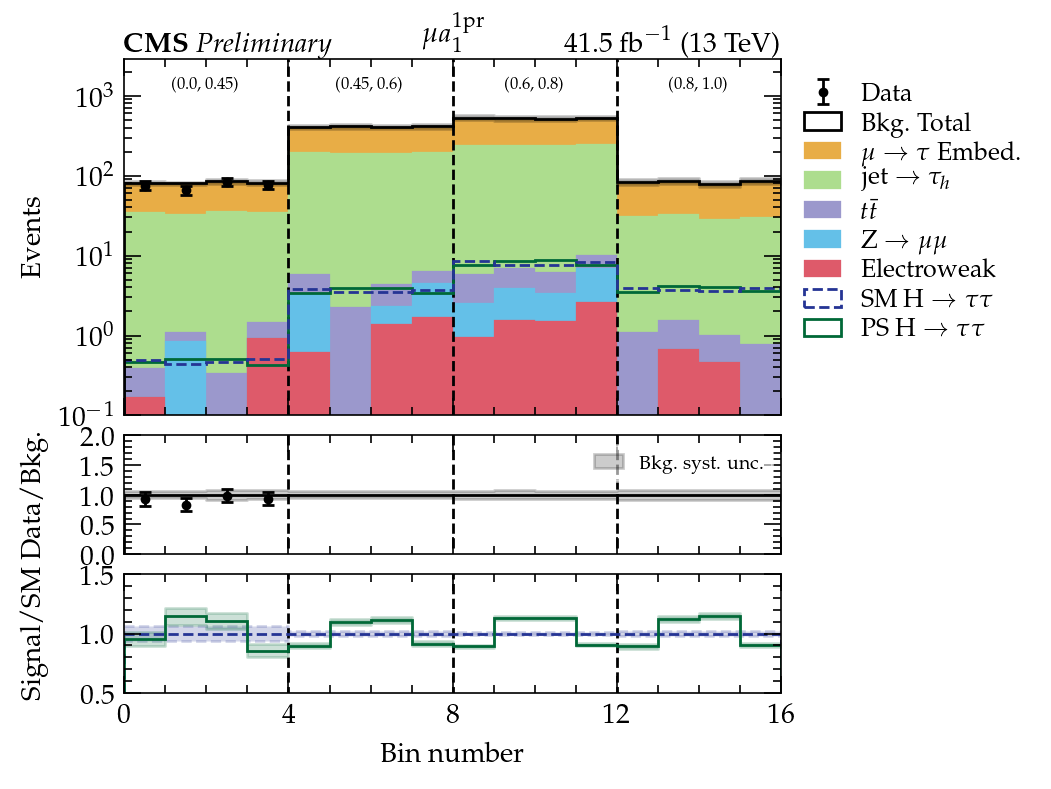

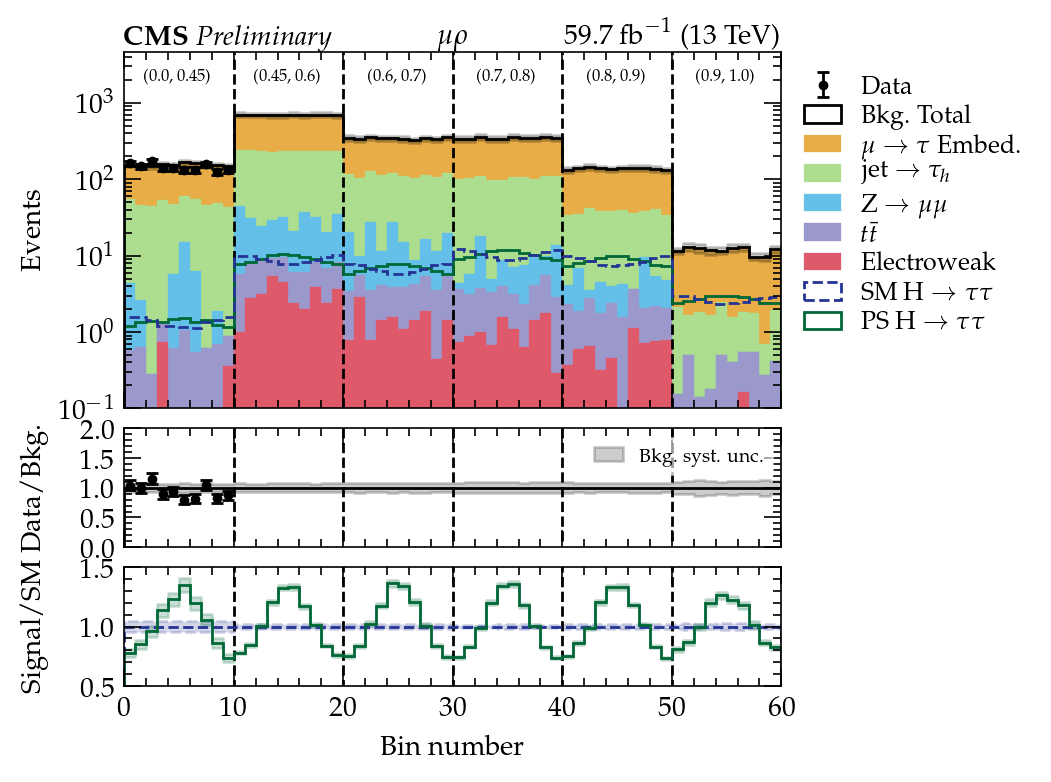

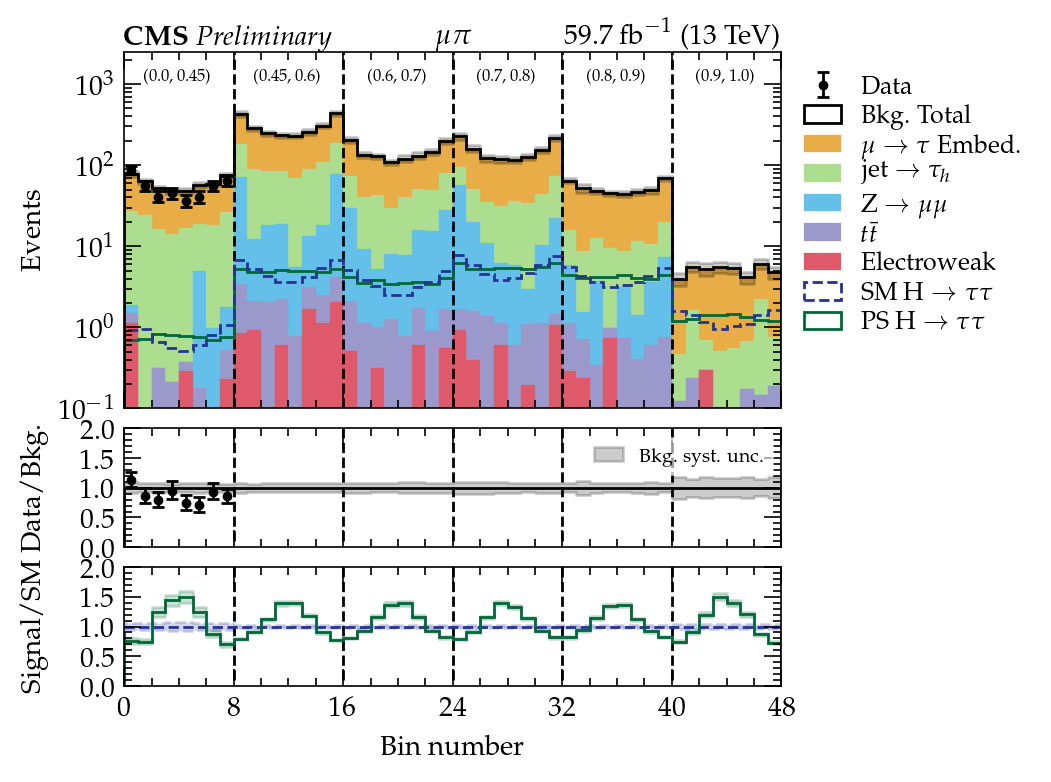

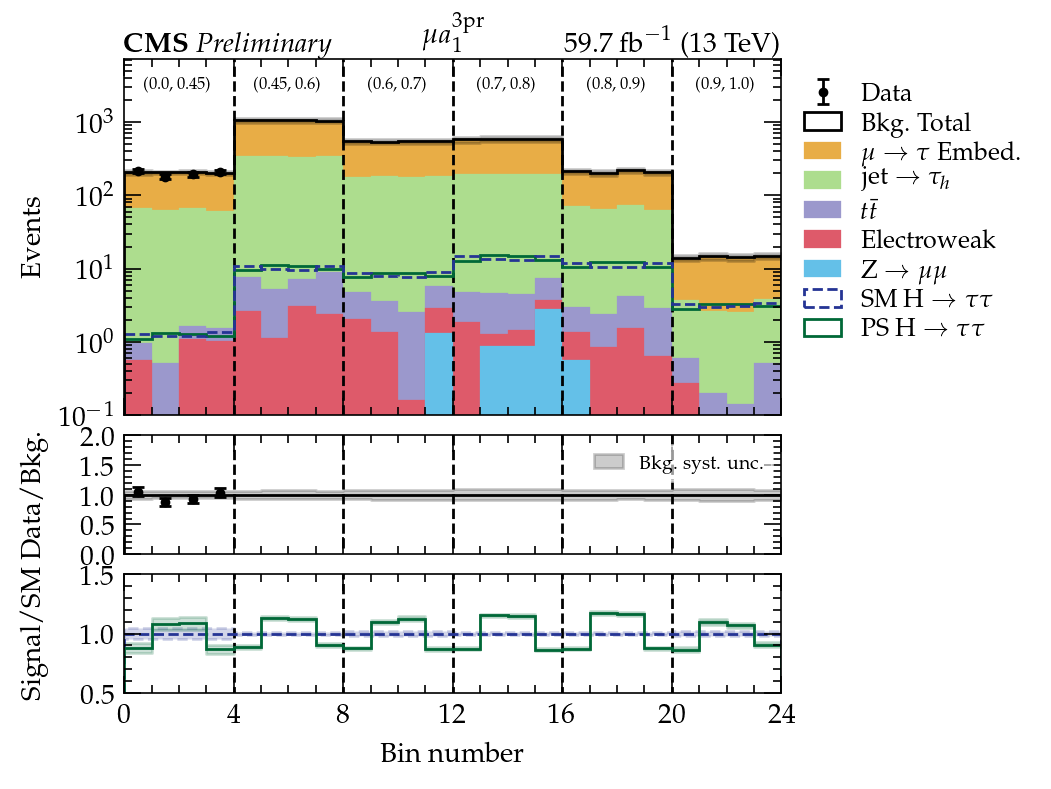

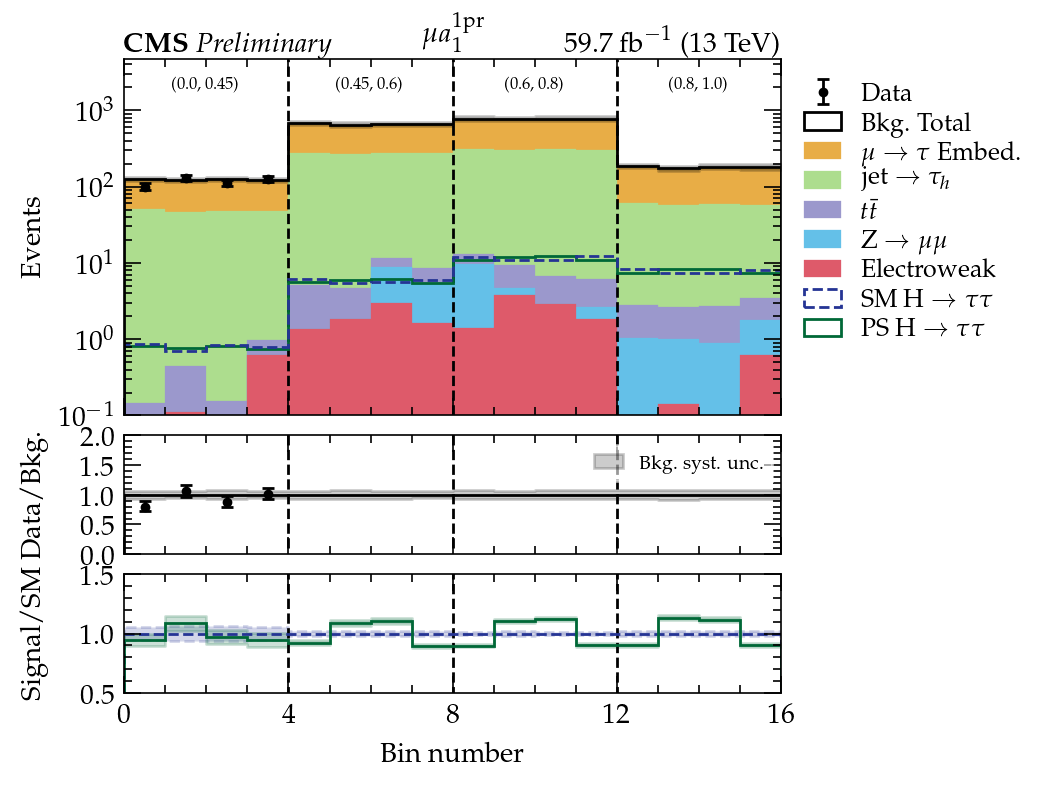

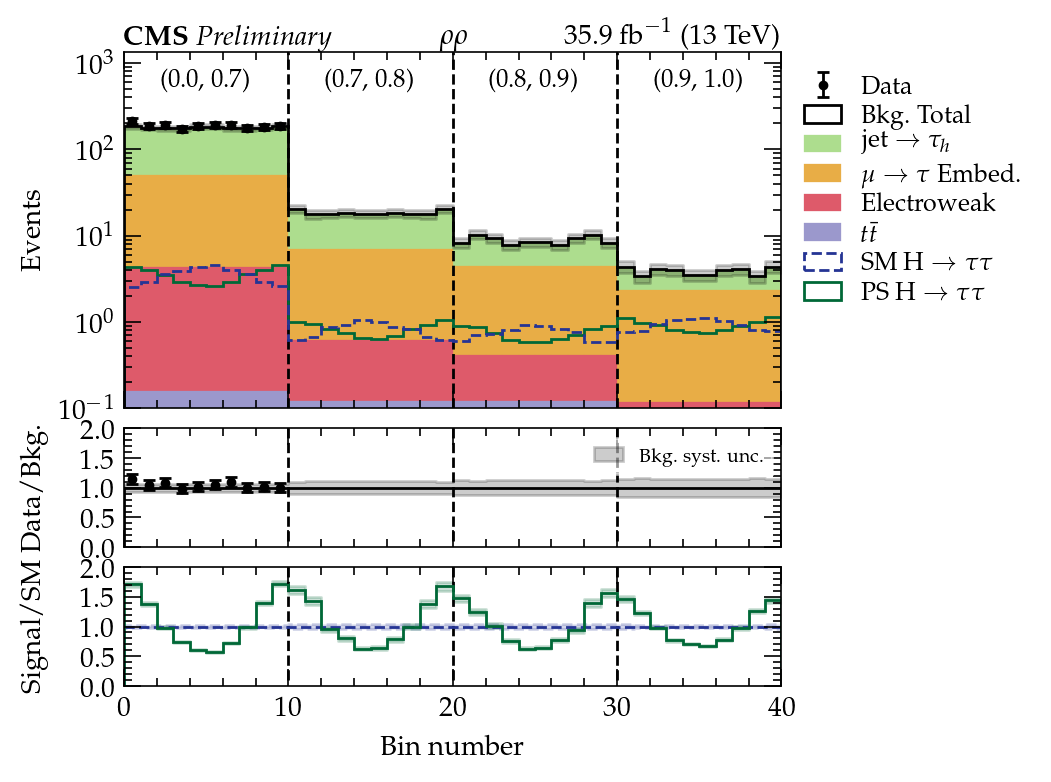

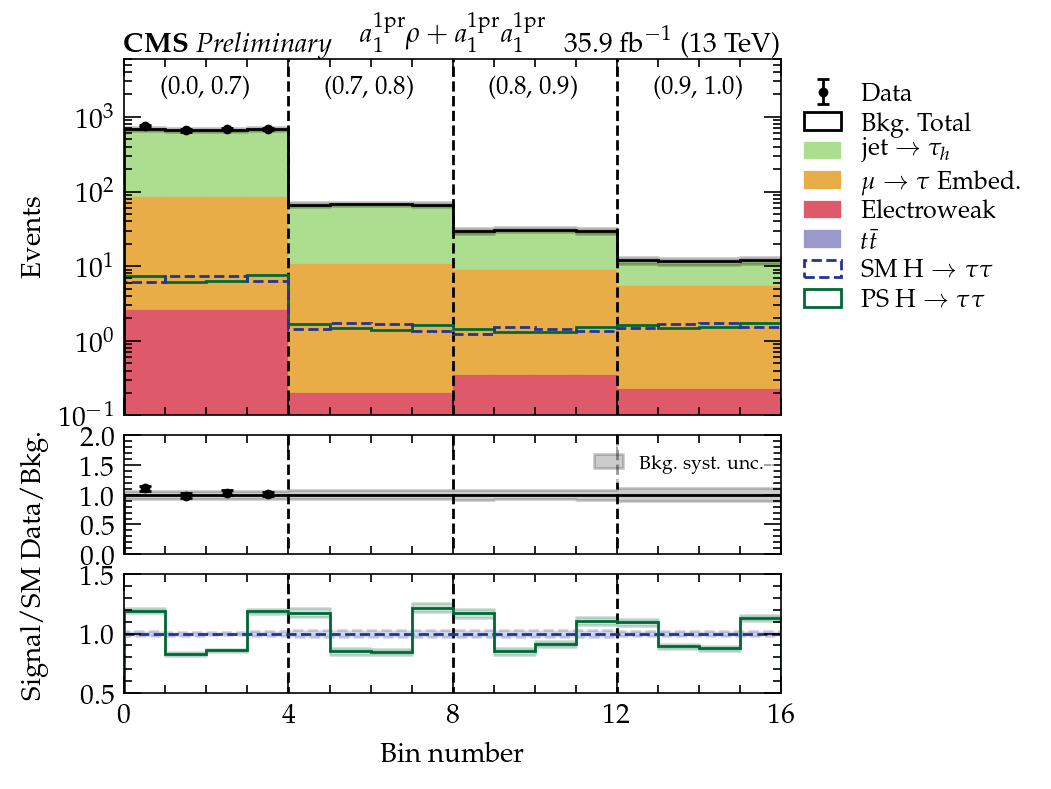

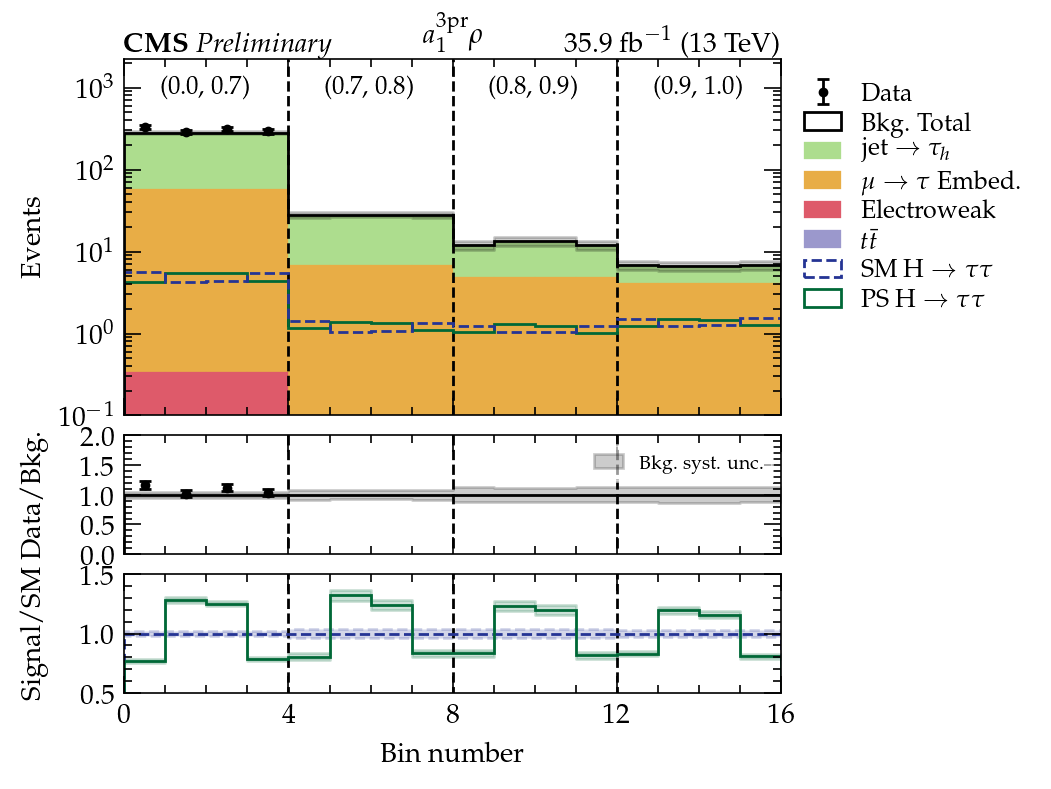

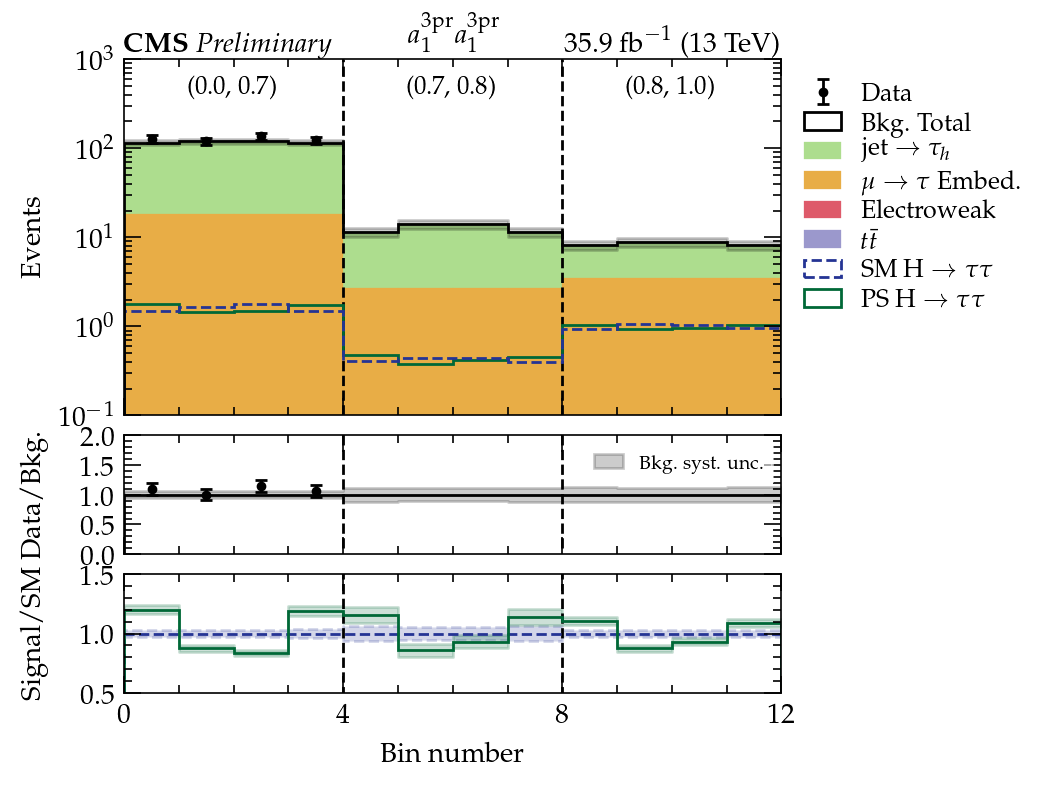

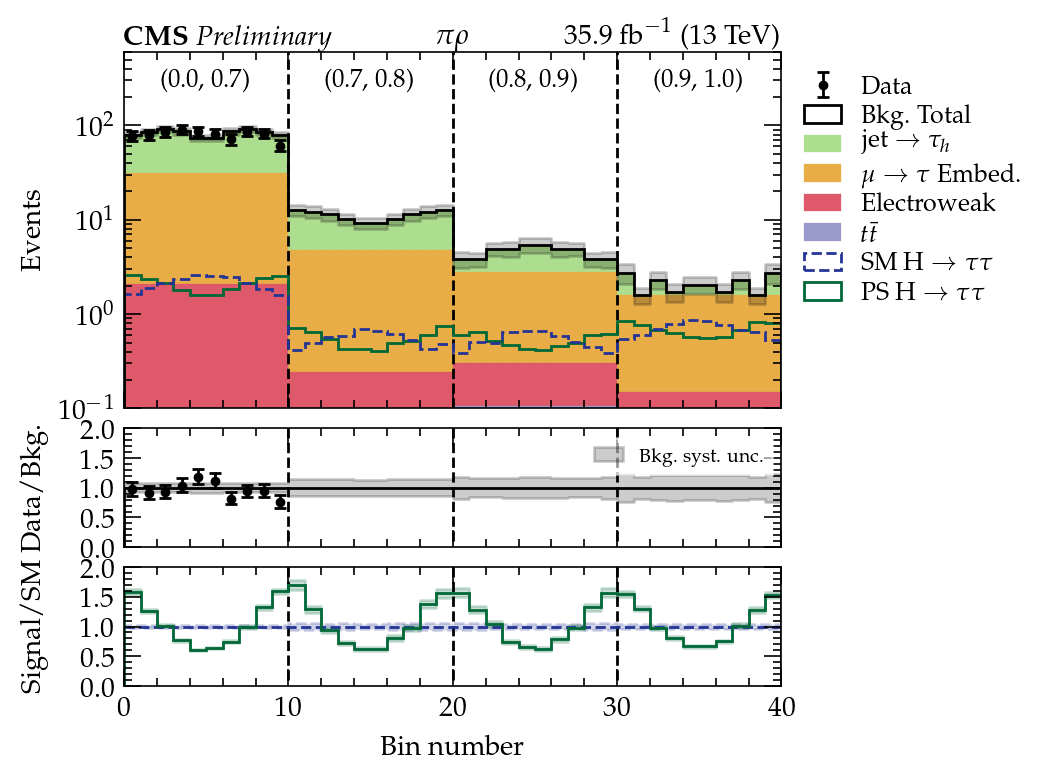

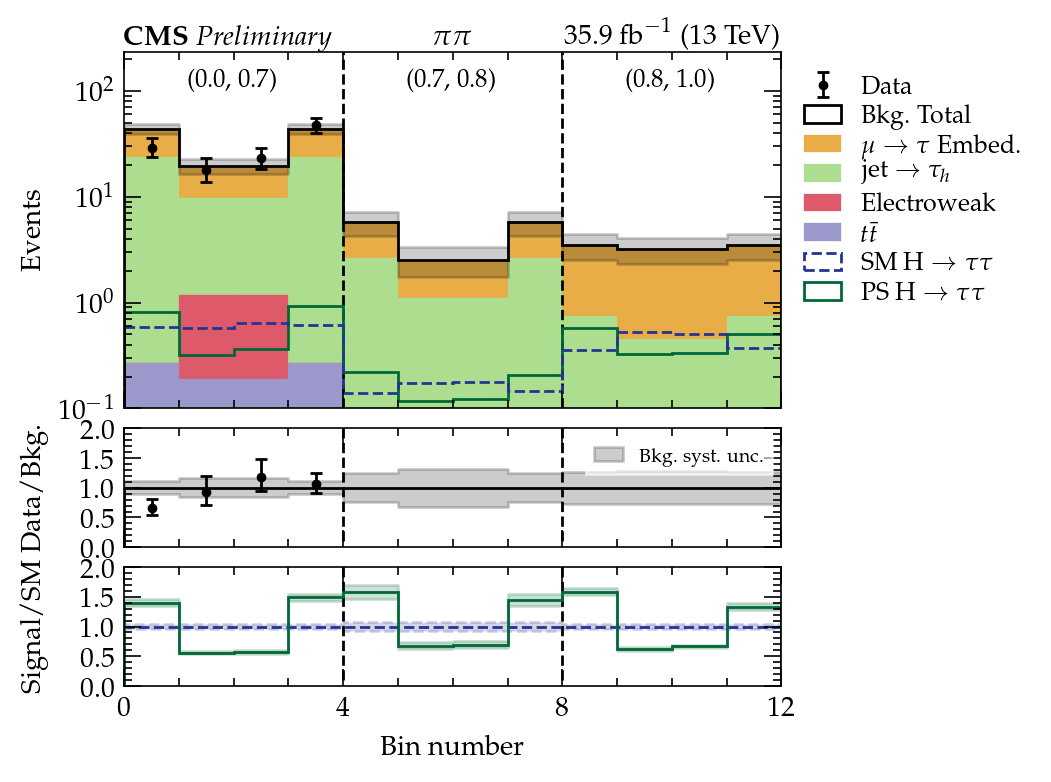

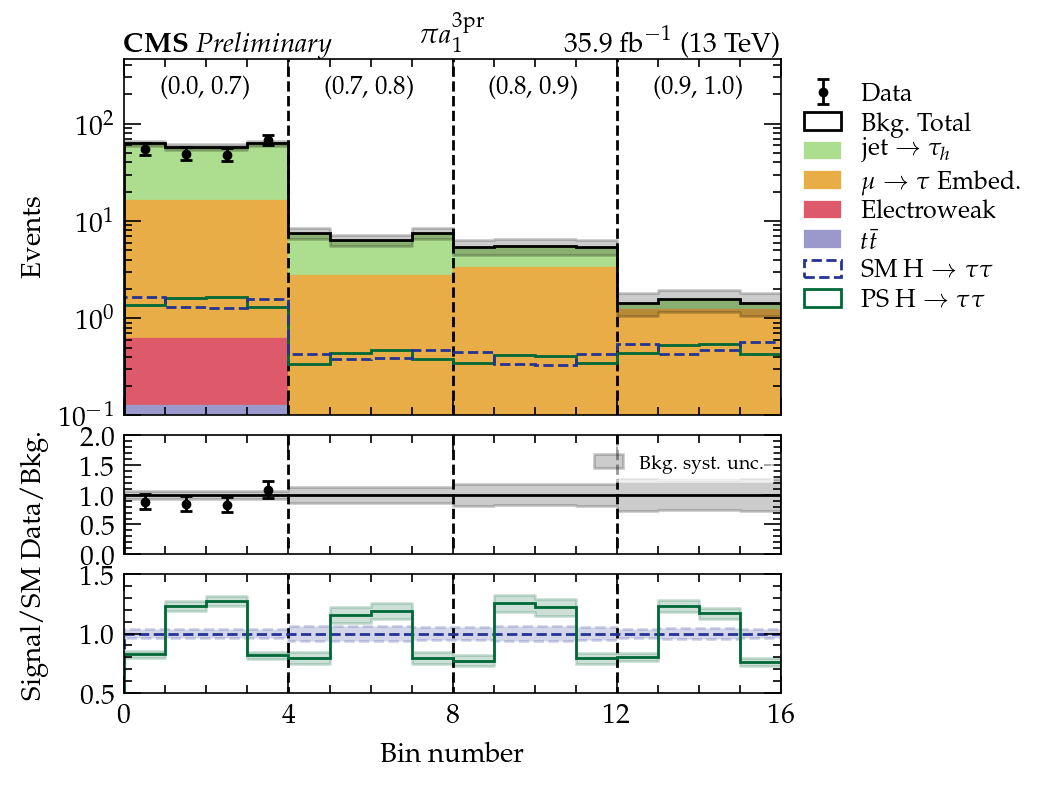

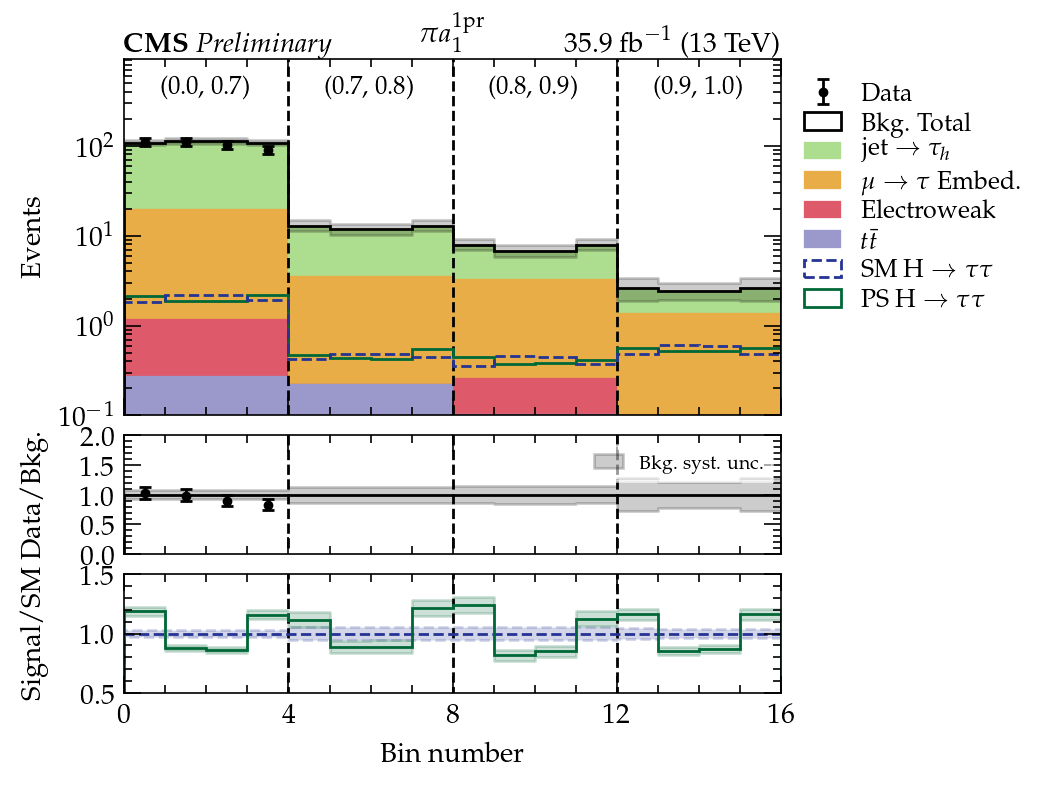

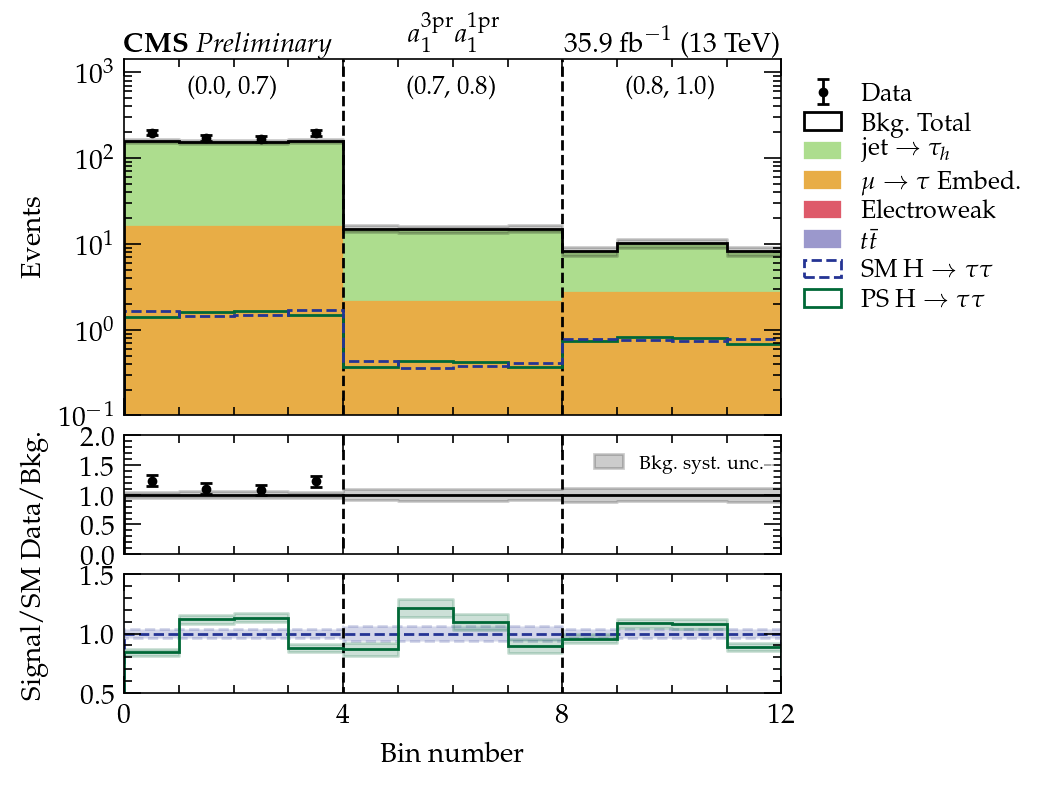

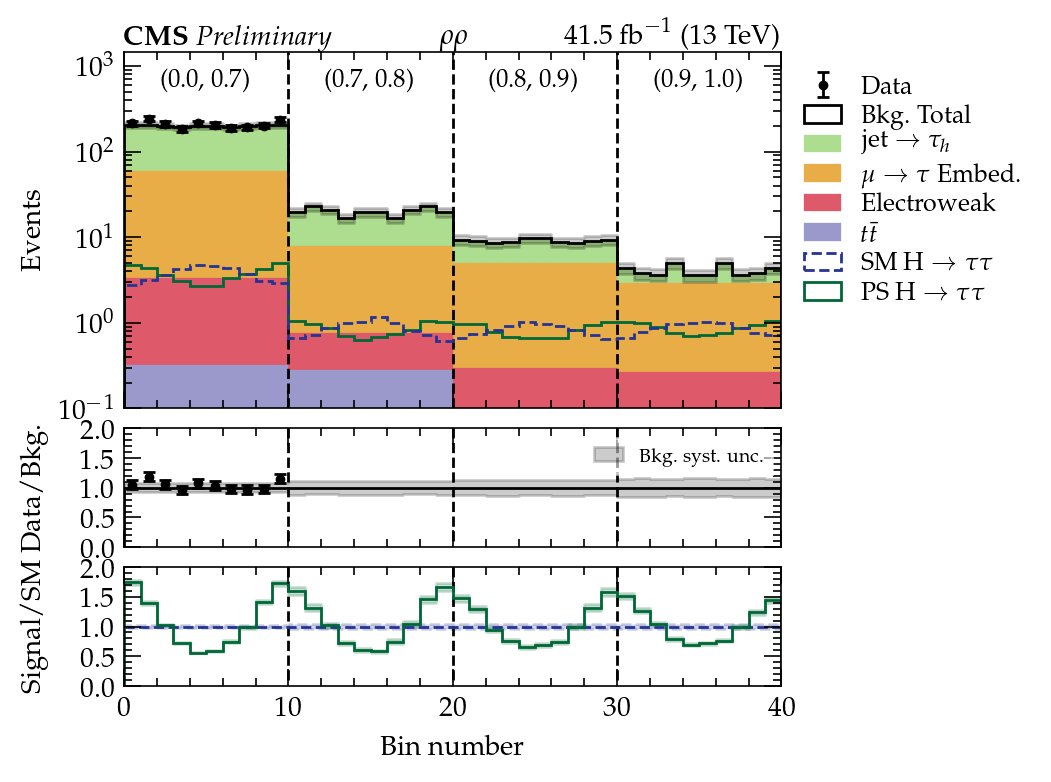

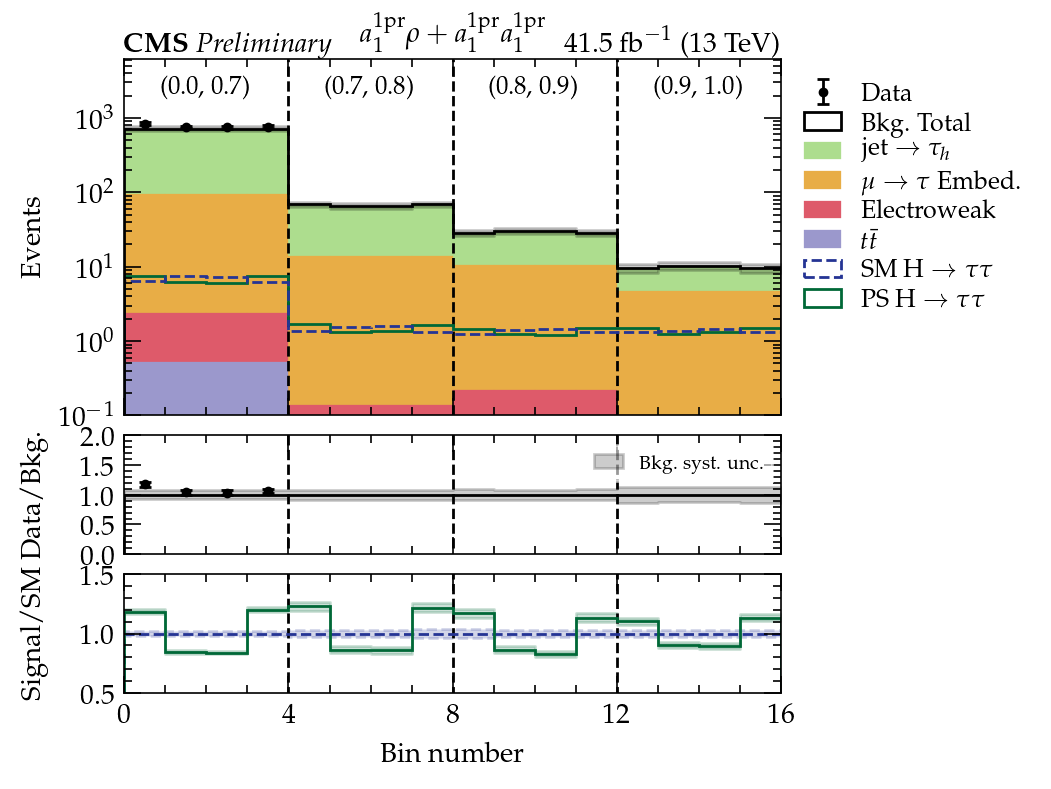

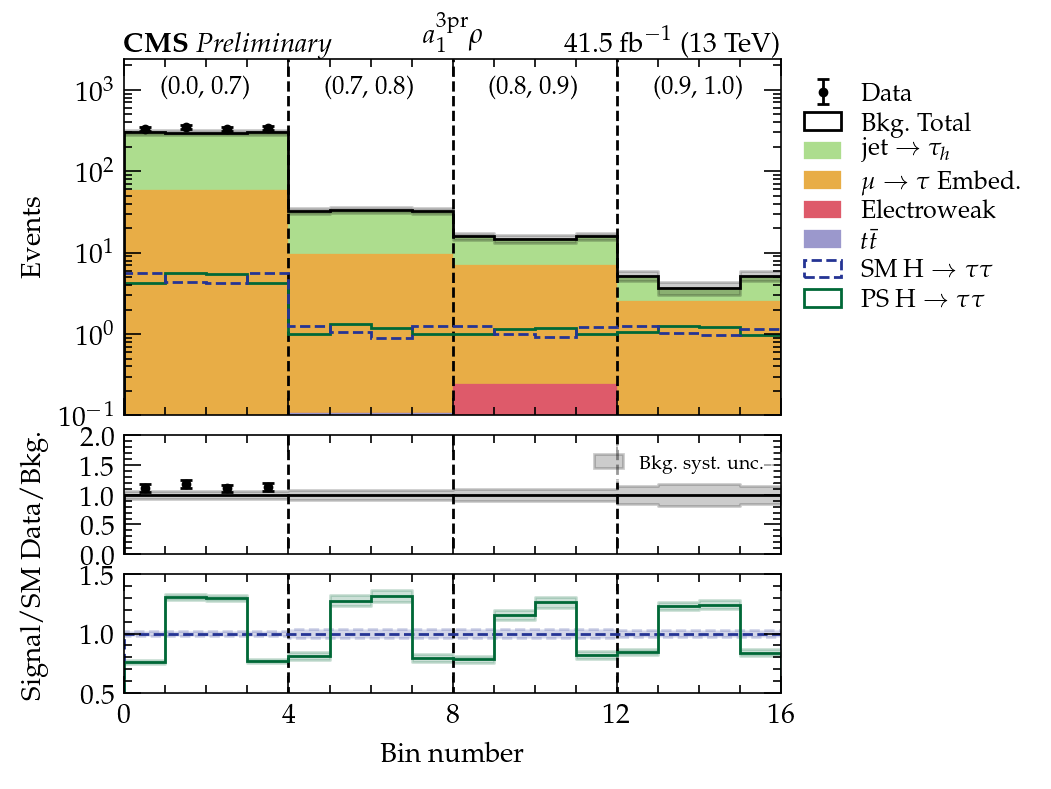

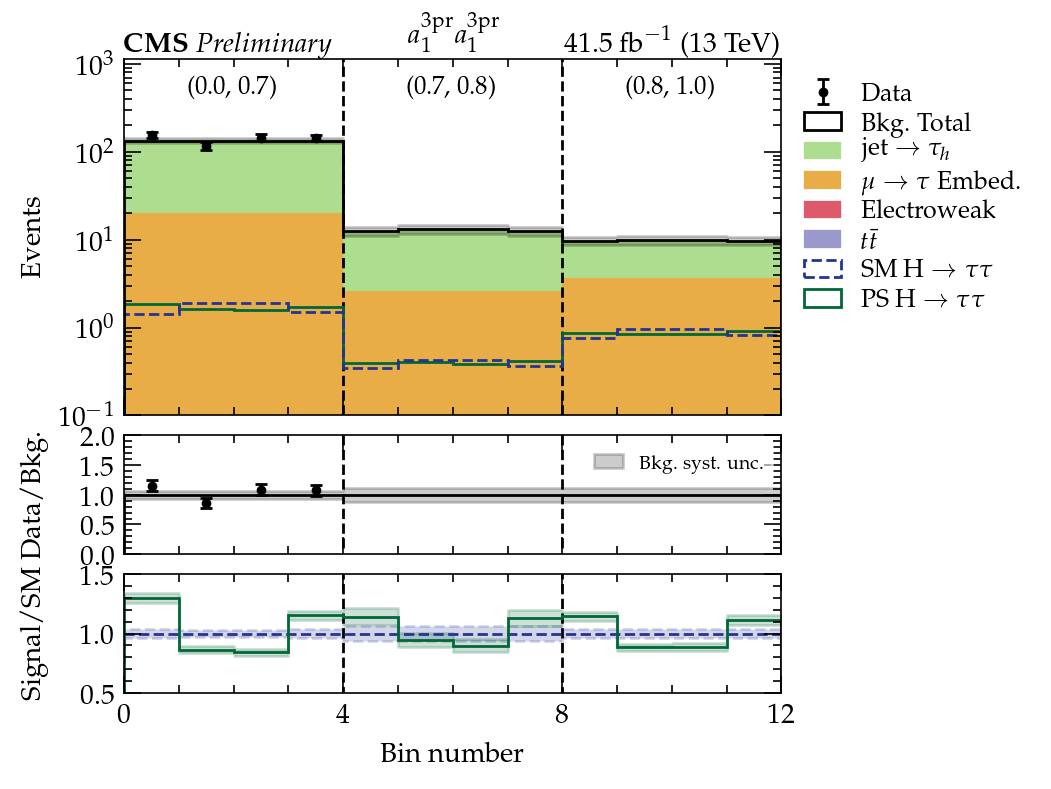

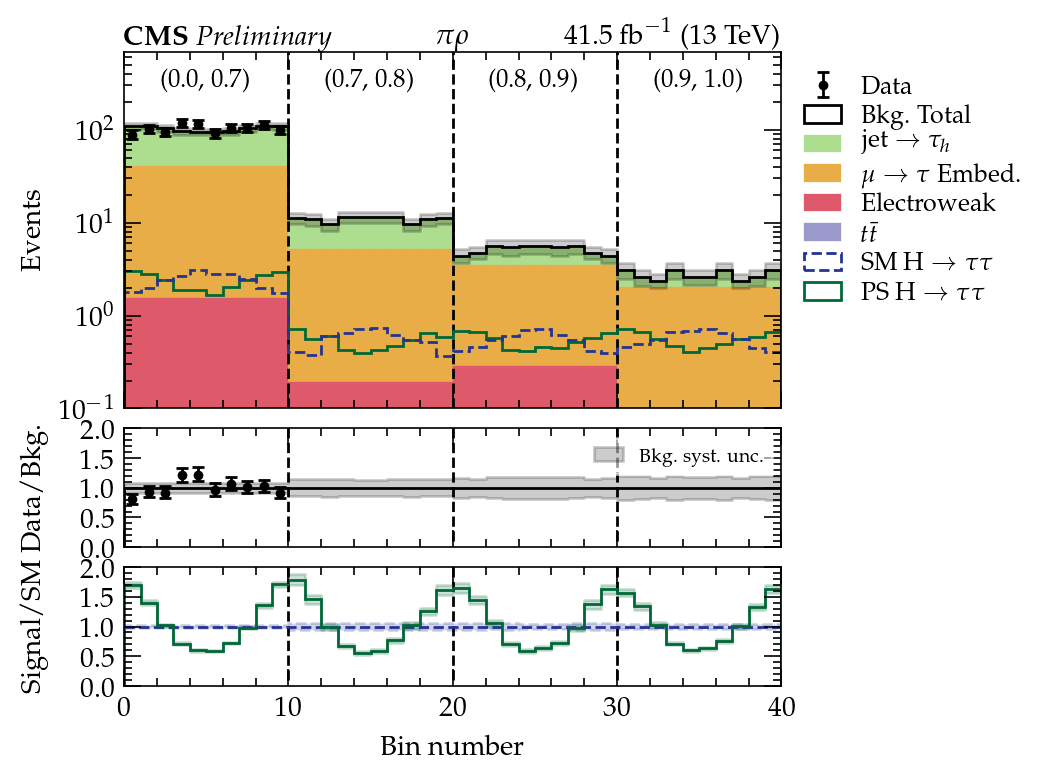

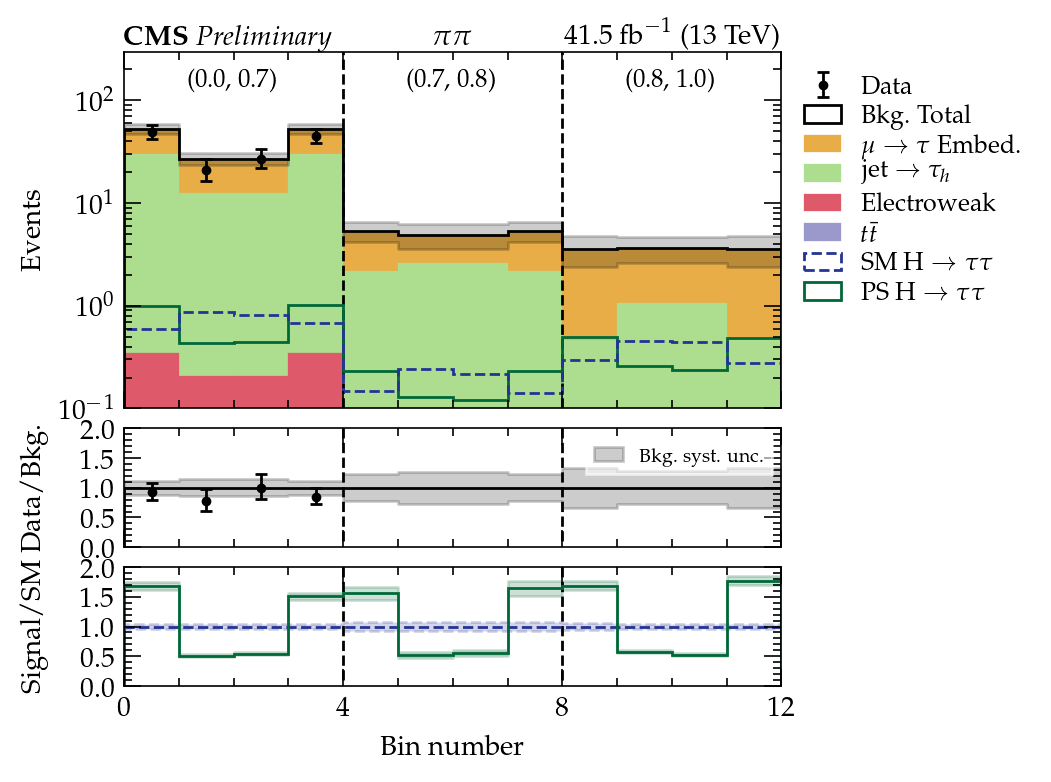

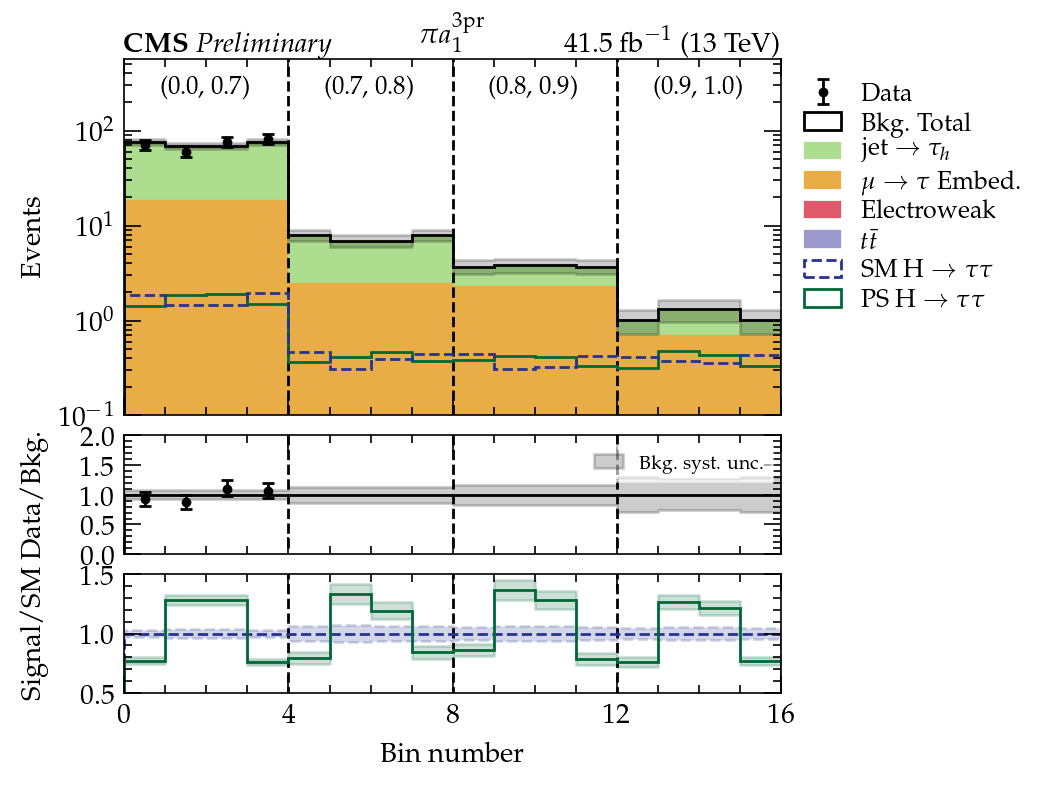

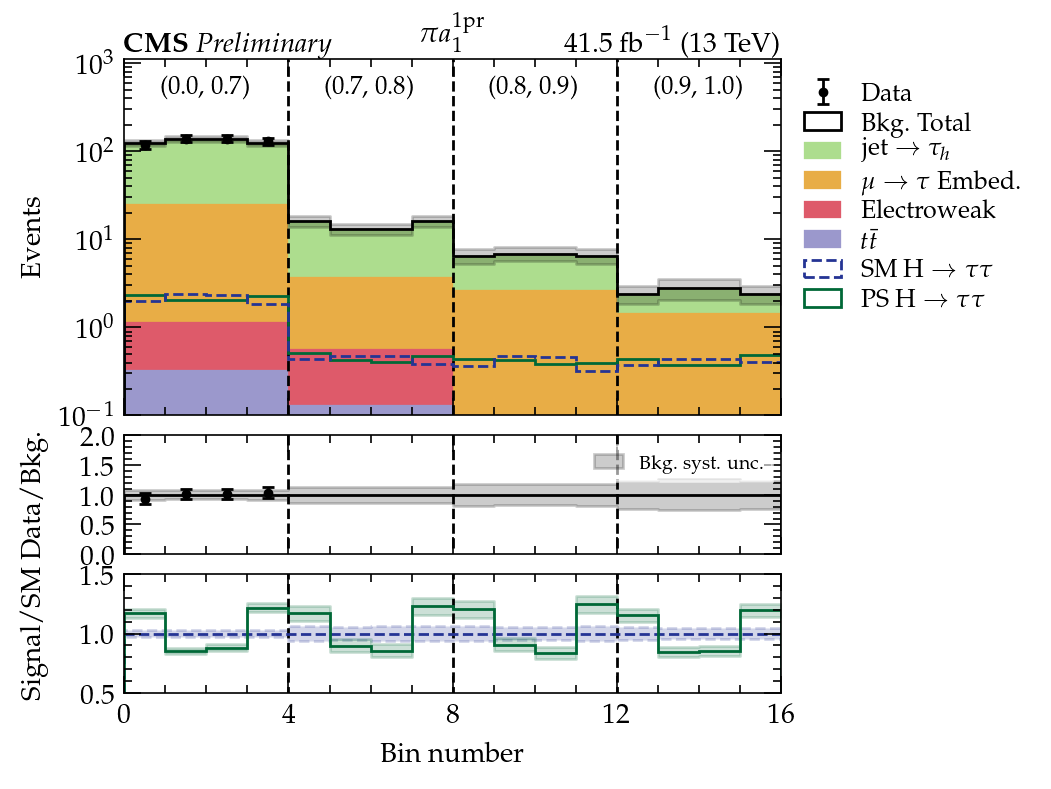

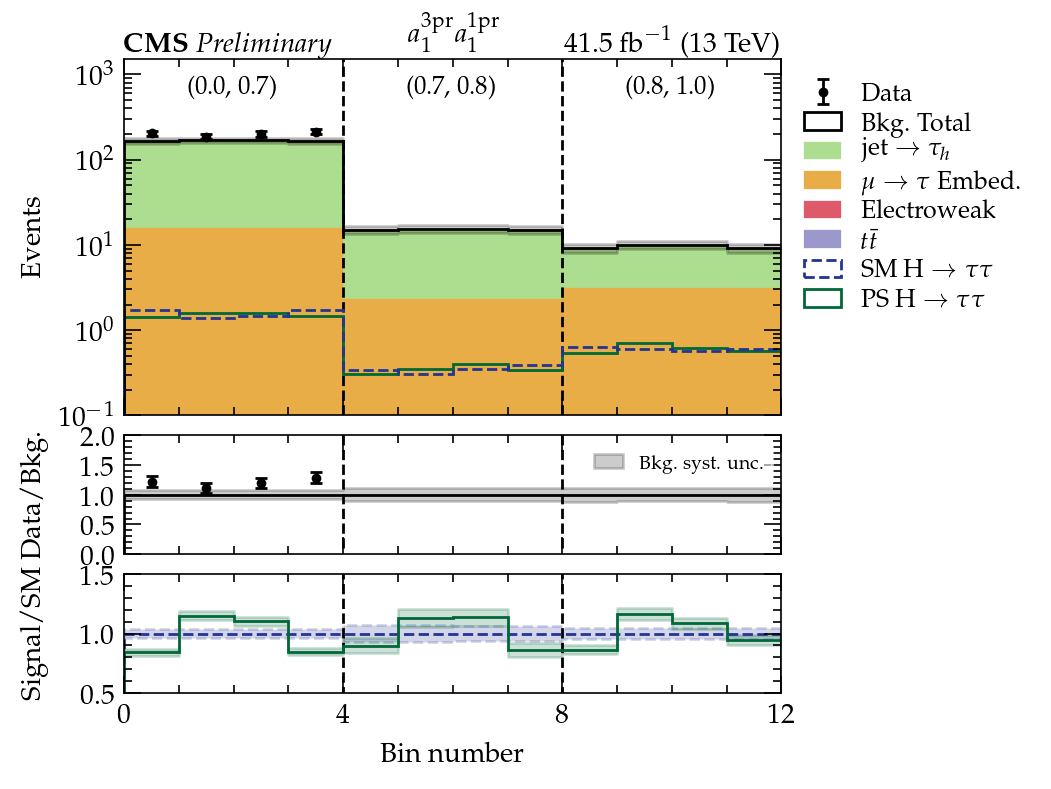

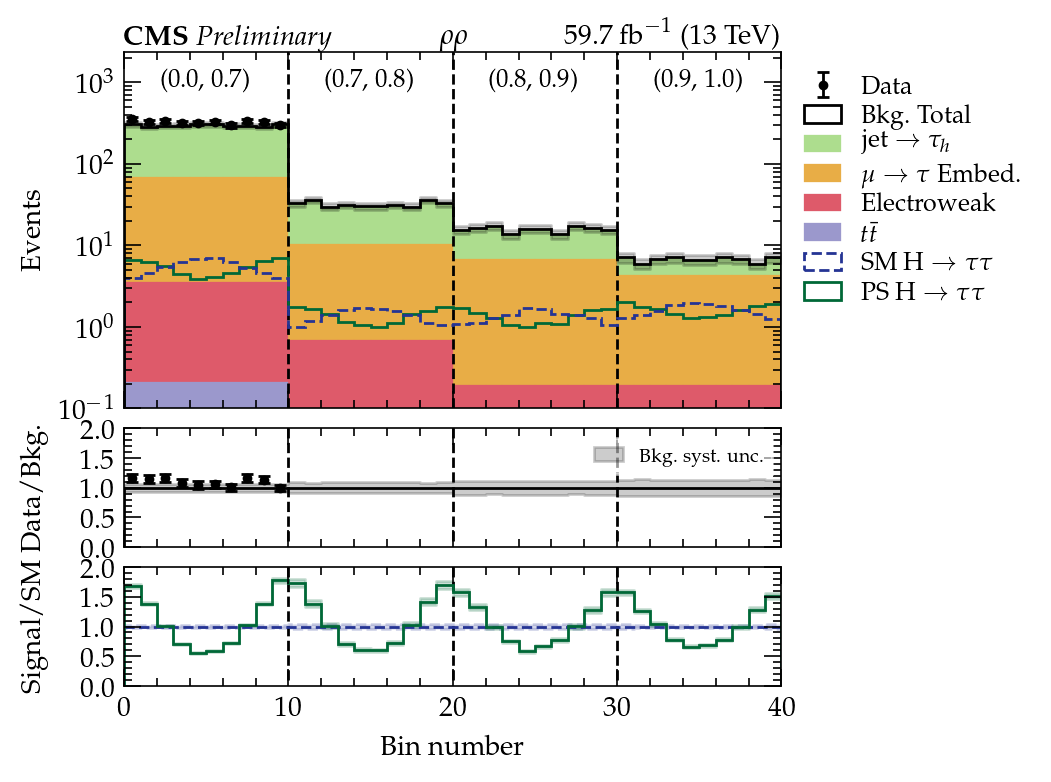

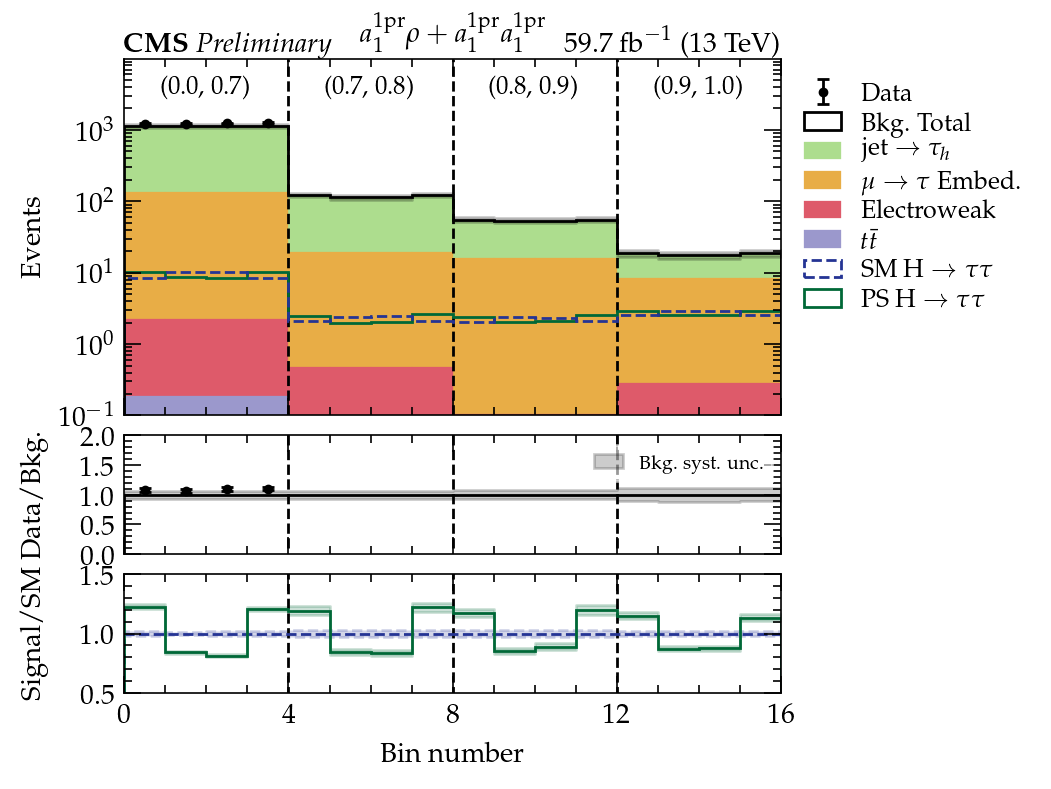

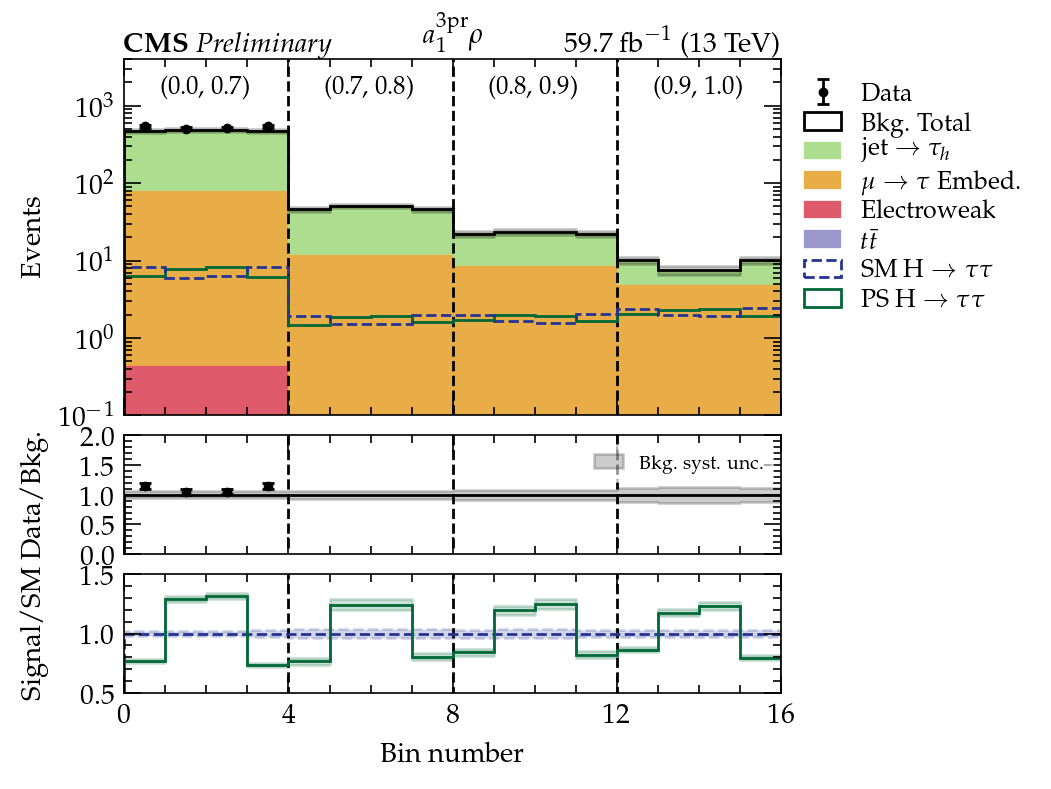

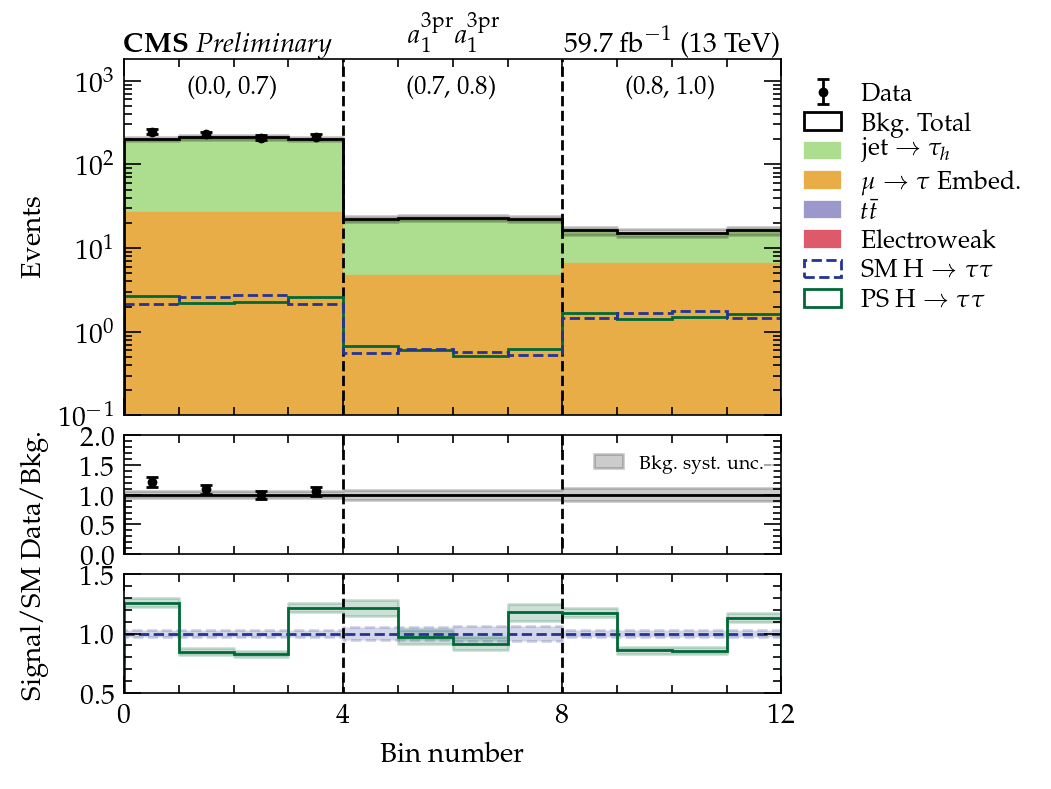

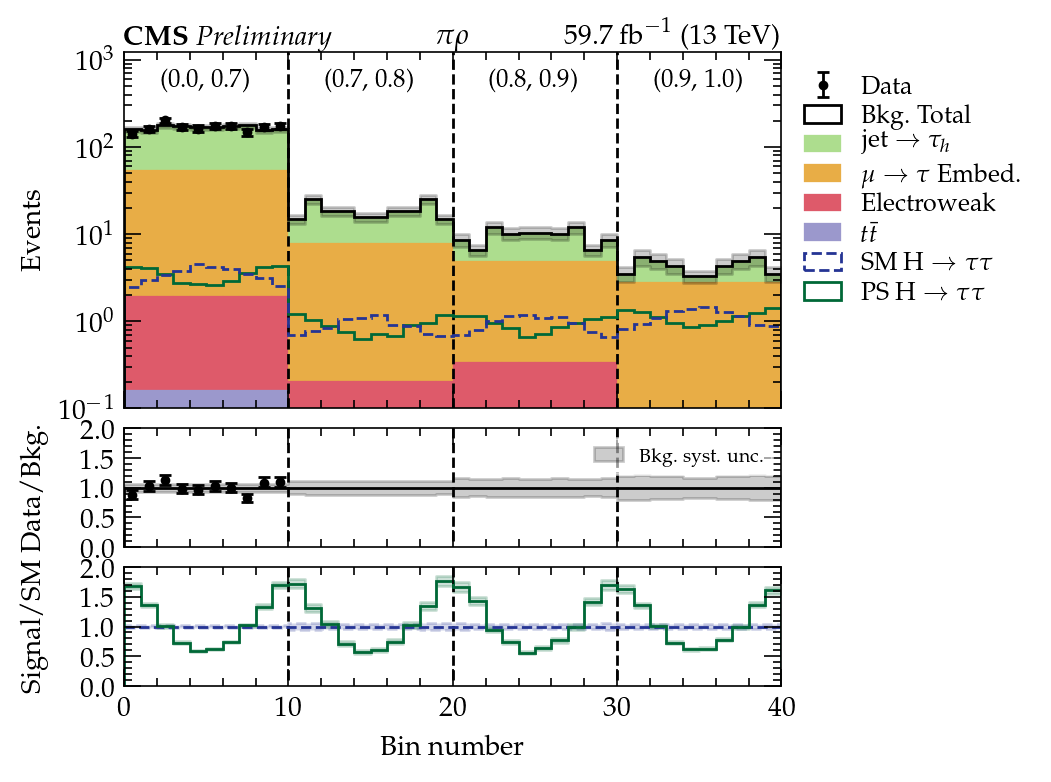

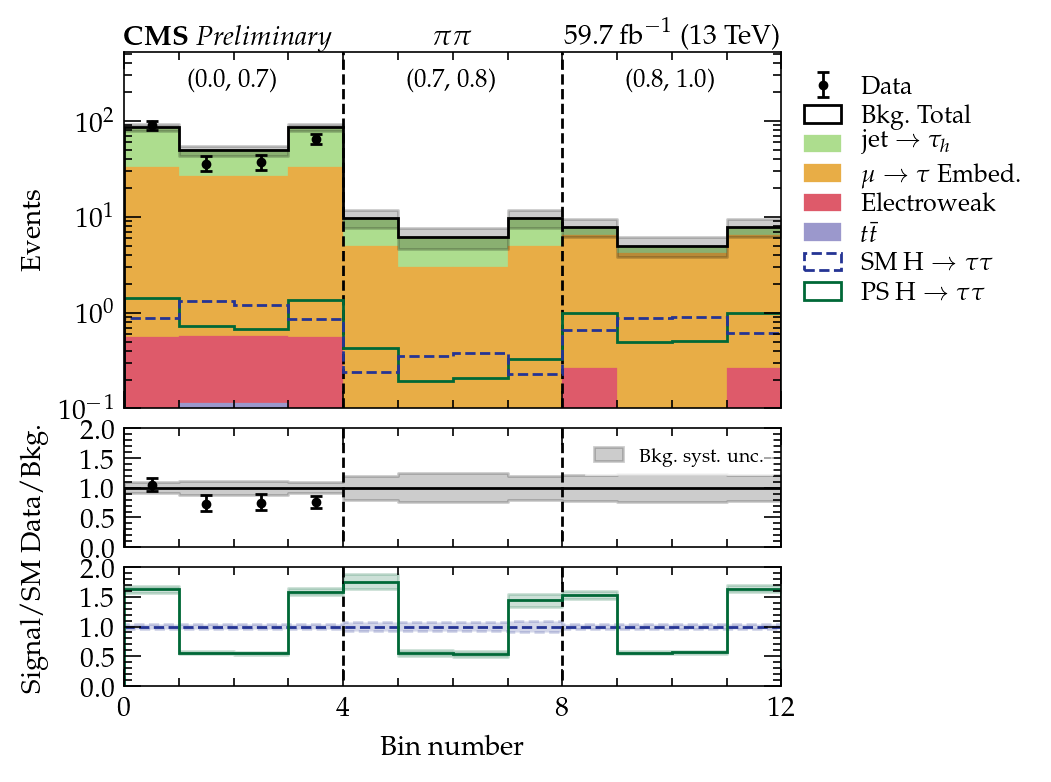

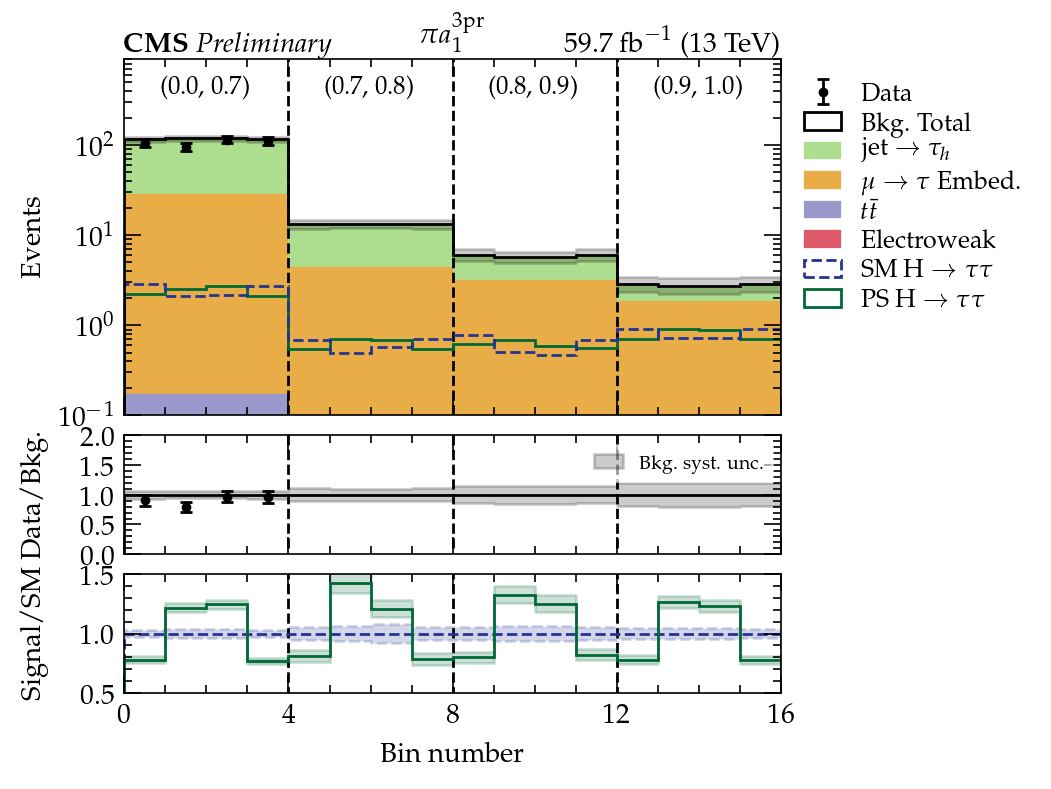

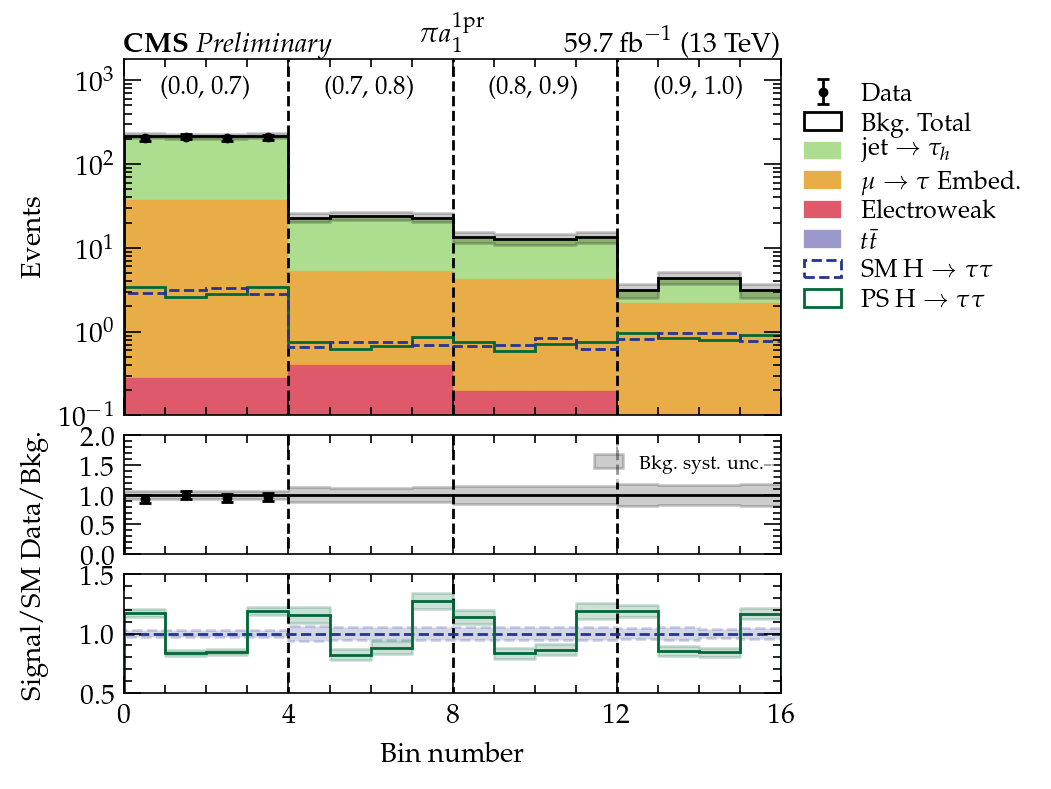

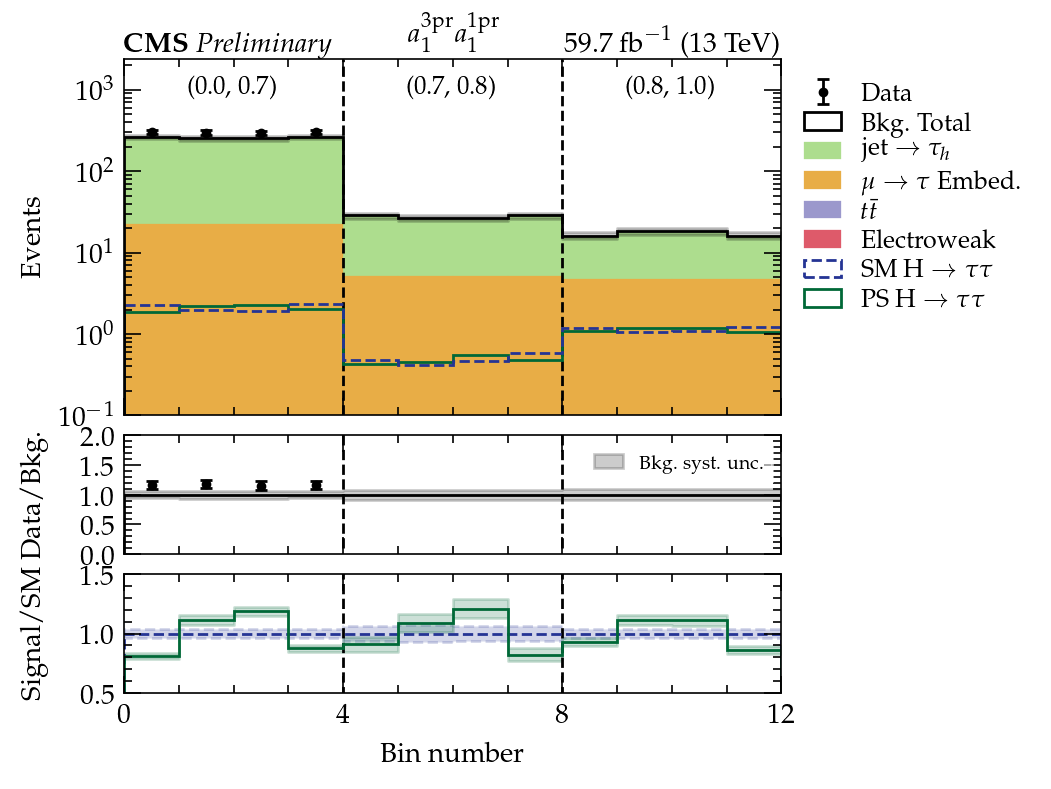

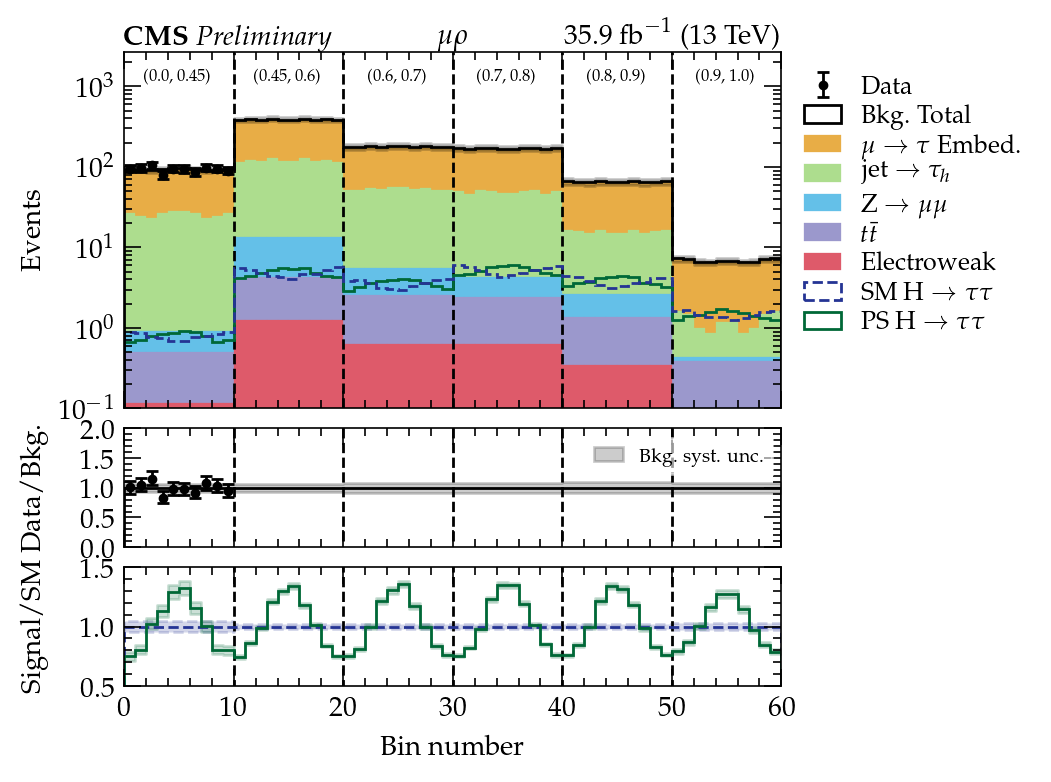

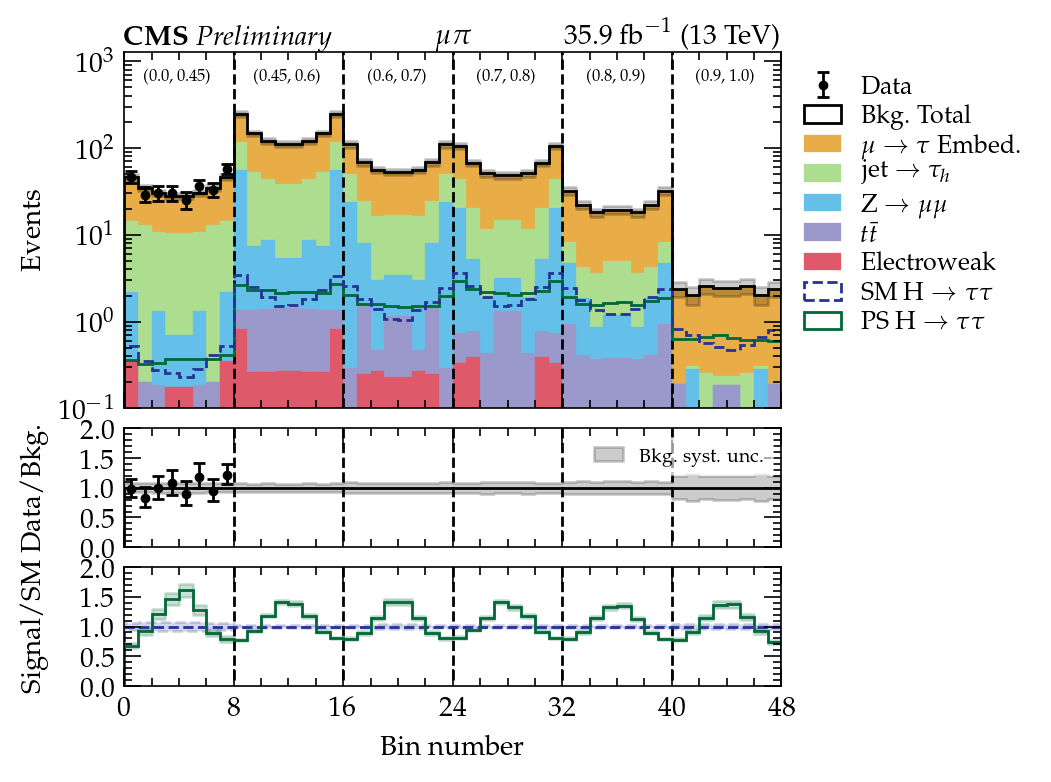

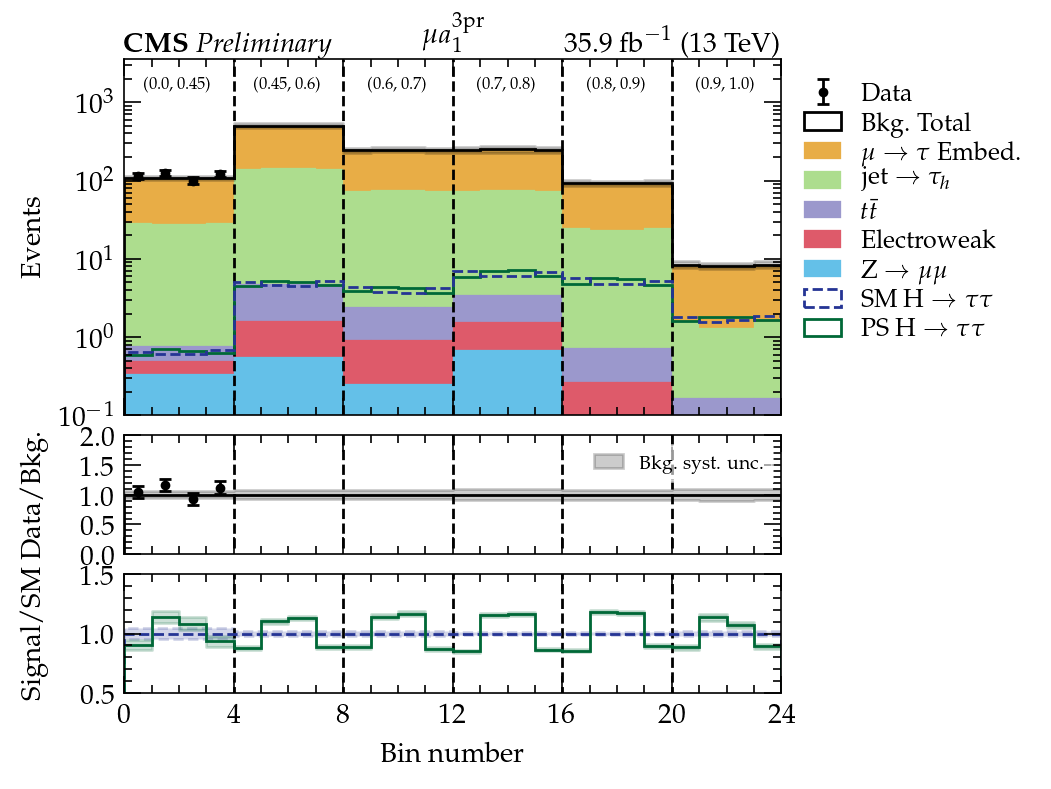

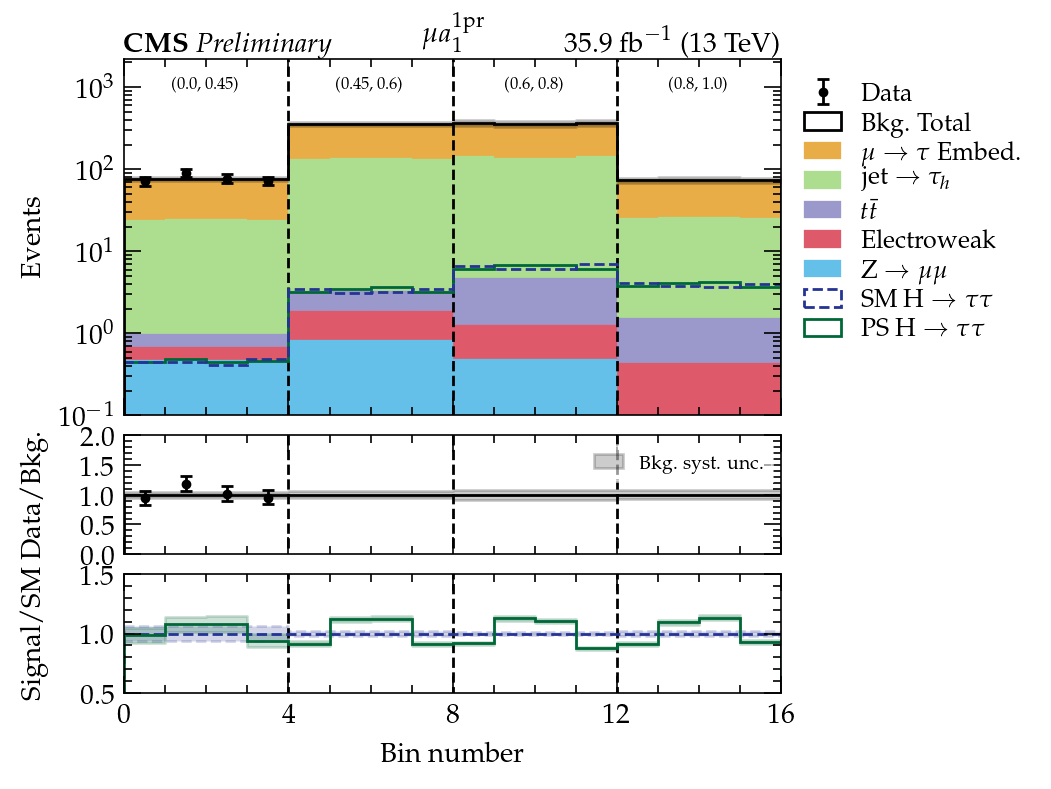

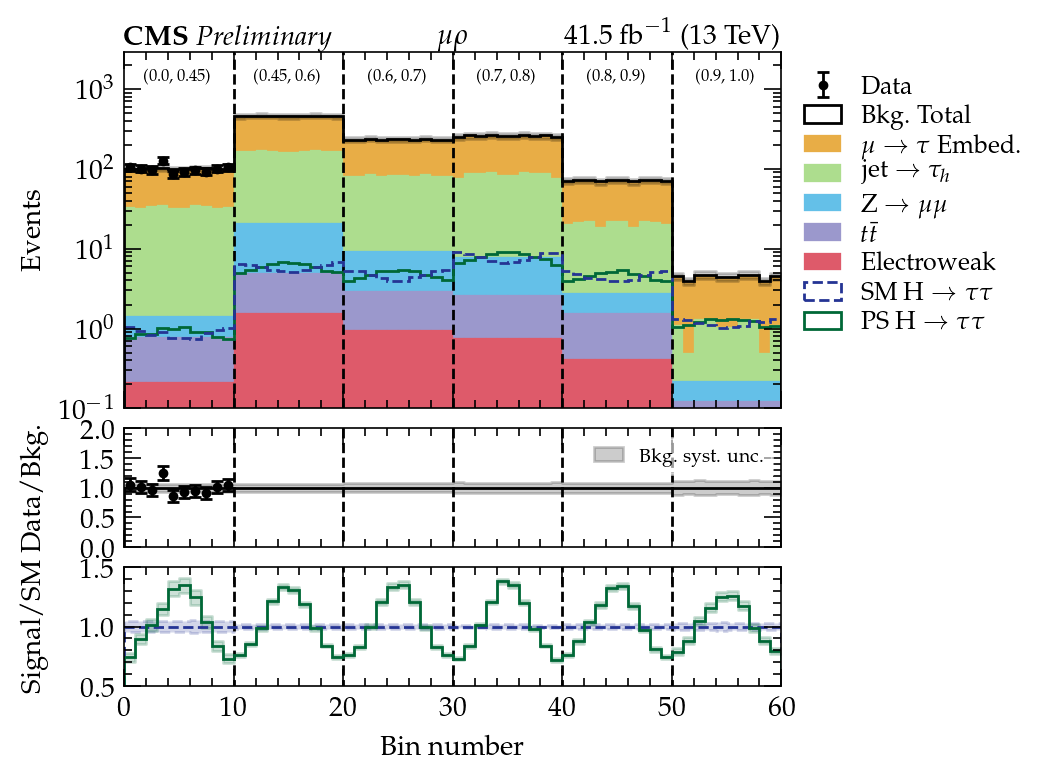

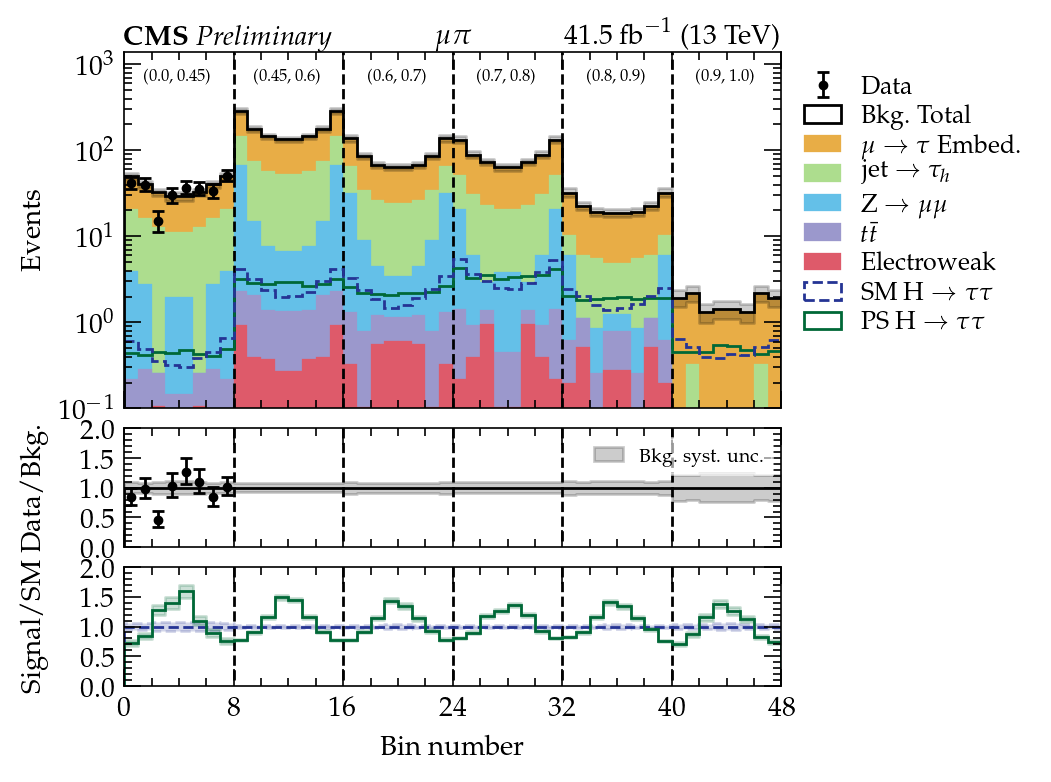

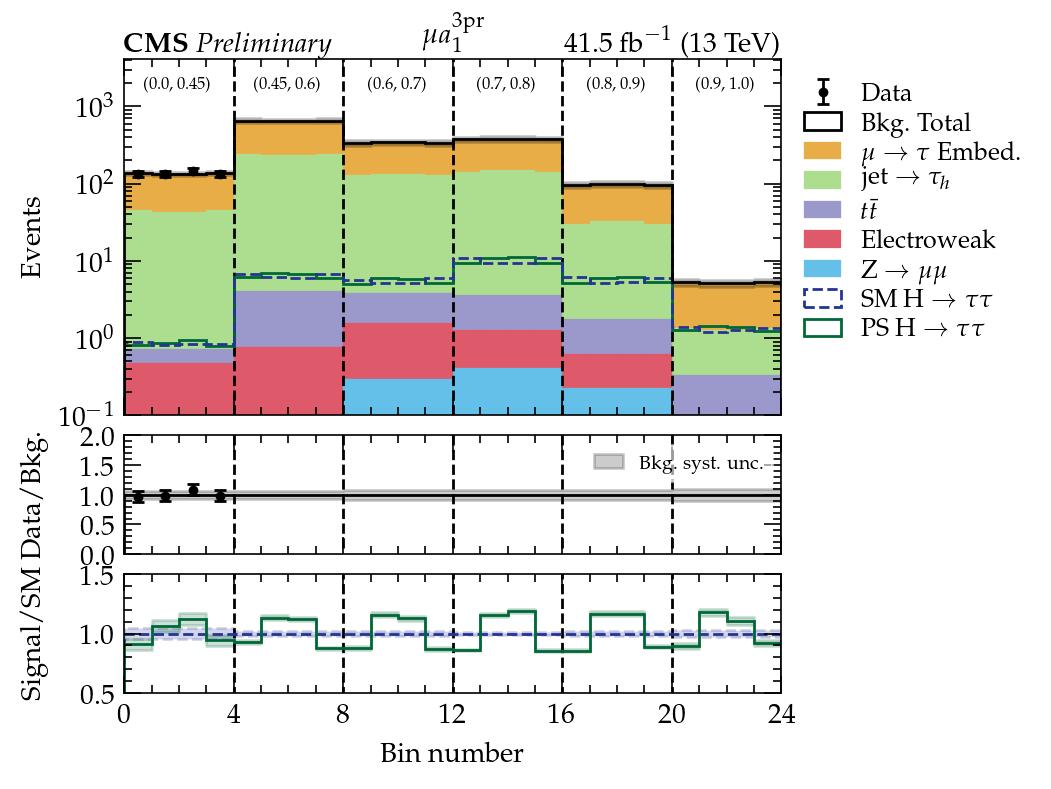

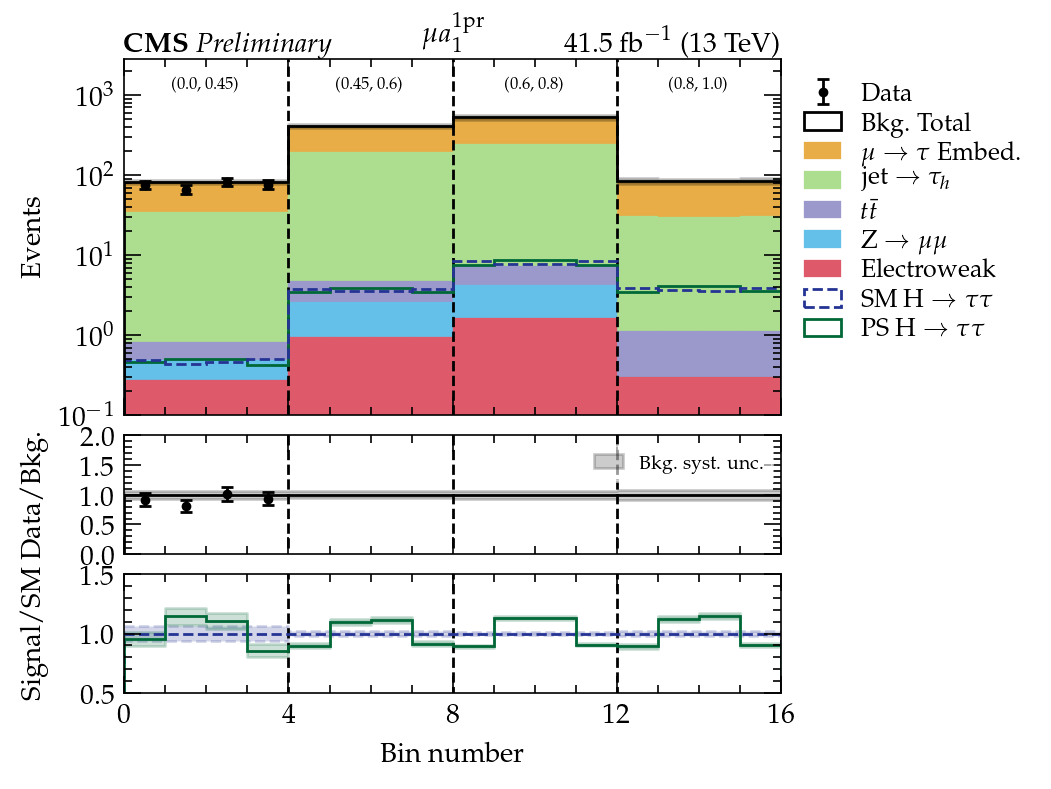

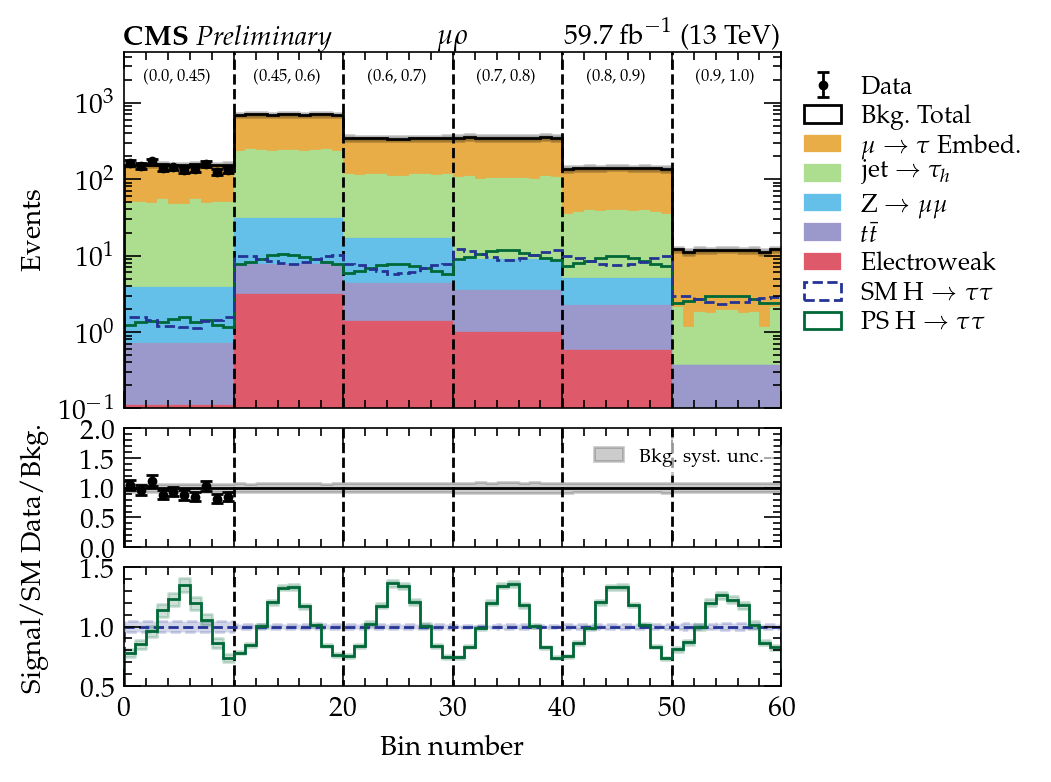

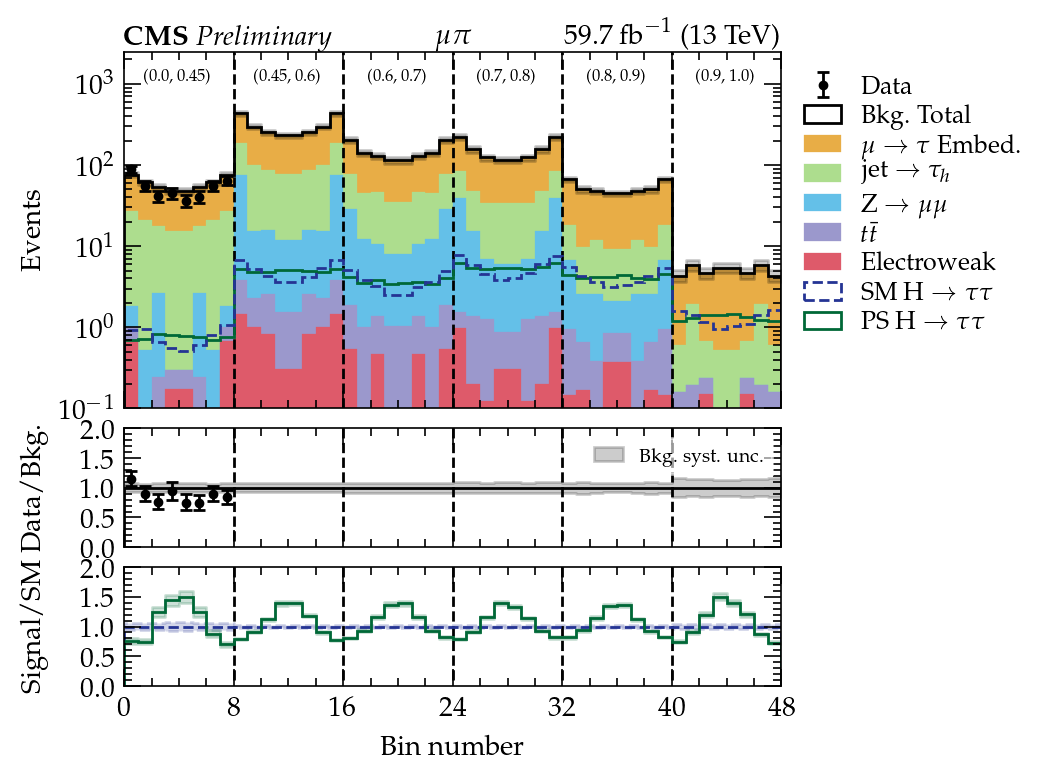

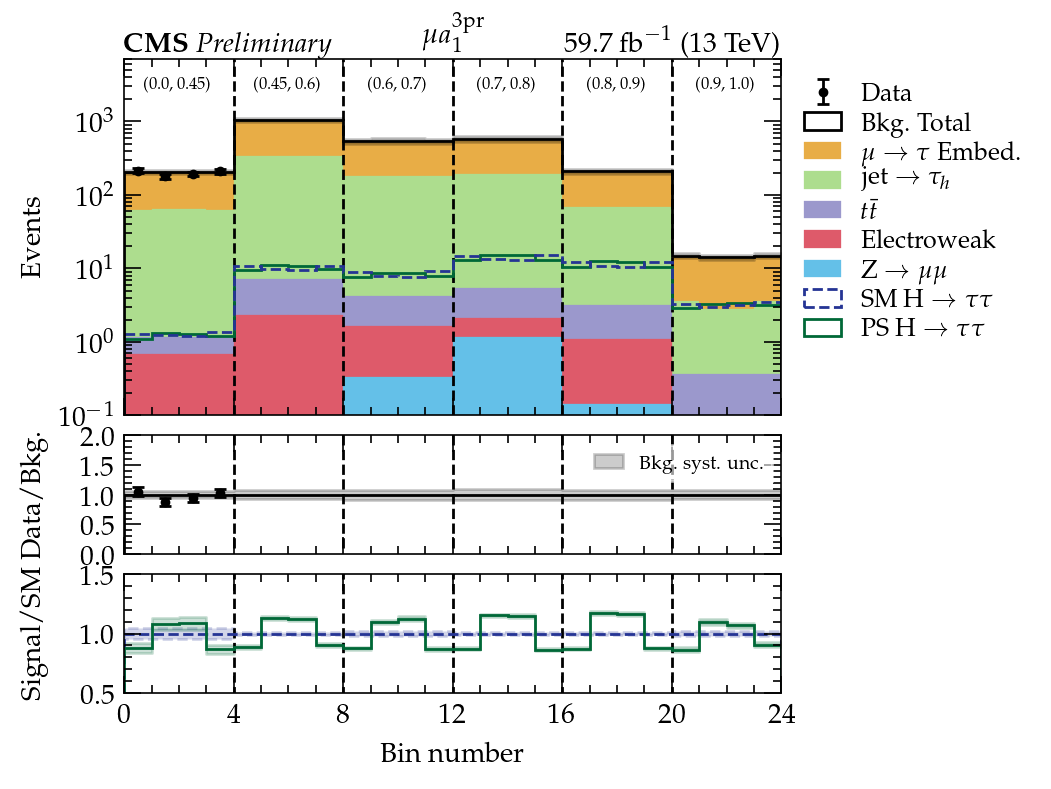

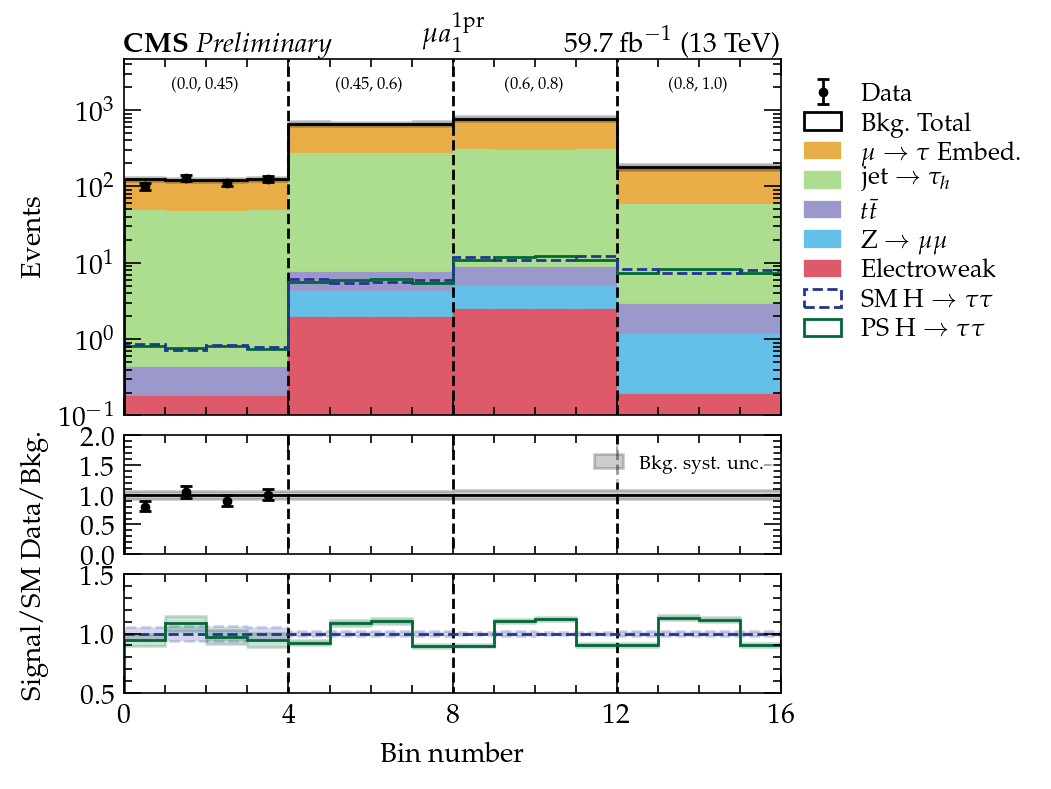

In [6]:
# draw unrolled
dir_ = "01052020"
for add in ["", "_mergeXbins"]:
    for channel in ["tt","mt"]:
        for year in ["2016","2017","2018"]:
            if channel == "tt":
                unrolled_bins = list(range(3, 12))
            elif channel == "mt":
                unrolled_bins = list(range(3, 7))
            for bin_number in unrolled_bins:
                category = "higgs"
                
                plot_var = "Bin_number"
                
                # temporary (for prefit only):
                #datacard = (
                #    "/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
                #    f"CombineHarvester/HTTSMCPDecays18/shapes_eff_sm_prefitonly.root"
                #)
                datacard = (
                    #"/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
                    #f"CombineHarvester/HTTSMCPDecays18/shapes_eff_sm_prefitonly_{channel}_{year}.root"
                    
                    "/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
                    f"CombineHarvester/HTTSMCPDecays18/output/{dir_}{add}/shapes_eff_sm_prefitonly_{year}.root"
                    
                    #"/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
                    #"CombineHarvester/HTTSMCPDecays18/shapes_eff_sm_mtbin3.root"
                )
                alt_datacard = (
                    #"/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
                    #f"CombineHarvester/HTTSMCPDecays18/shapes_eff_ps_prefitonly_{channel}_{year}.root"
                    
                    "/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
                    f"CombineHarvester/HTTSMCPDecays18/output/{dir_}{add}/shapes_eff_ps_prefitonly_{year}.root"
                    
                    #"/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
                    #"CombineHarvester/HTTSMCPDecays18/shapes_eff_ps_mtbin3.root"
                )
                directory = f"htt_{channel}_{year}_{bin_number}_13TeV_{to_plot}"
                
                if channel == "mt":
                    folder_card = "DESY_30042020"
                elif channel == "tt":
                    folder_card = "IC_newbins_v2"
                datacard_for_statunc = (
                    "/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
                    f"CombineHarvester/HTTSMCPDecays18/shapes/{folder_card}/{year}/htt_{channel}.inputs-sm-13TeV.root"
                )
                bin_name = nbins_kw[channel][bin_number][3].replace("-","")
                if channel == "mt":
                    directory_for_statunc = f"{channel}_{bin_name}_sig_{year}"
                elif channel == "tt":
                    tautau_directories = {
                        3: f"tt_{year}_higgs_Rho_Rho",
                        4: f"tt_{year}_higgs_0A1_Rho_and_0A1_0A1",
                        5: f"tt_{year}_higgs_A1_Rho",
                        6: f"tt_{year}_higgs_A1_A1",
                        7: f"tt_{year}_higgs_Pi_Rho_Mixed",
                        8: f"tt_{year}_higgs_Pi_Pi",
                        9: f"tt_{year}_higgs_Pi_A1_Mixed",
                        10: f"tt_{year}_higgs_Pi_0A1_Mixed",
                        11: f"tt_{year}_higgs_A1_0A1",
                    }
                    directory_for_statunc = tautau_directories[bin_number]
                
                processes_for_statunc = [proc.replace("htt", "htt125") for proc in processes]
                
                if "higgs" in category:
                    partial_blind = True
                else:
                    partial_blind = False
                blind=False
            
                df_plot = create_df(datacard, directory, channel, processes, ch_kw)
                df_plot_alt = create_df(alt_datacard, directory, channel, processes, ch_kw)
                
                df_plot_for_statunc = create_df(datacard_for_statunc, directory_for_statunc, channel, processes_for_statunc, ch_kw)
                
                ps_mask = df_plot.index.get_level_values("parent") != "H_ps"
                ps_alt_mask = df_plot_alt.index.get_level_values("parent") != "H_ps"
                if df_plot_alt is not None:
                    df_plot = pd.concat([df_plot.loc[ps_mask,:], df_plot_alt.loc[~ps_alt_mask,:]], axis='index', sort=False)
                    # edit uncertainty on signal to only use stat
                    # do SM unc. first (redefine mask as indices may change)
                    sm_mask = df_plot.index.get_level_values("parent") != "H_sm"
                    sm_statunc_mask = df_plot_for_statunc.index.get_level_values("parent") != "H_sm"
                    df_plot.loc[~sm_mask,"sum_ww"] = df_plot_for_statunc.loc[~sm_statunc_mask, "sum_ww"]
                    # do PS unc.
                    ps_mask = df_plot.index.get_level_values("parent") != "H_ps"
                    ps_statunc_mask = df_plot_for_statunc.index.get_level_values("parent") != "H_ps"
                    df_plot.loc[~ps_mask,"sum_ww"] = df_plot_for_statunc.loc[~ps_statunc_mask, "sum_ww"]
                if partial_blind:
                    # unblind first window of unrolled bins only
                    data_mask = df_plot.index.get_level_values("parent") == "data_obs"
                    blind_mask = df_plot.index.get_level_values("binvar0") >= nbins_kw[channel][bin_number][1]
                    df_plot.loc[data_mask & blind_mask, "sum_w"] = np.nan
                draw_1d(
                    df_plot, plot_var, channel, category, year, blind, fractions=fractions,
                    sigs=signals, signal_scale=1., ch_kw=ch_kw, process_kw=process_kw, 
                    var_kw=var_kw, leg_kw=leg_kw, unrolled=True, nbins=nbins_kw[channel][bin_number], 
                    mcstat=True, mcsyst=True,
                    sig_ratio=True,
                    postfix=add
                )

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/vols/build/cms/akd116/Notebooks/plotting.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/vols/build/cms/akd116/Notebooks/plotting.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/vols/build/cms/akd116/Notebooks/plotting.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/vols/build/cms/akd116/Notebooks/plotting.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  gridspec_kw={"height_ratios": (3, 1), "hspace": 0.1, "wspace": 0.1},
/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


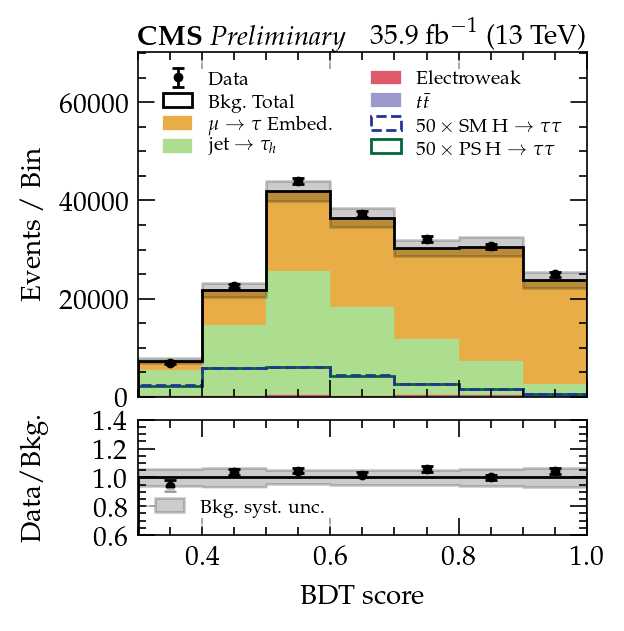

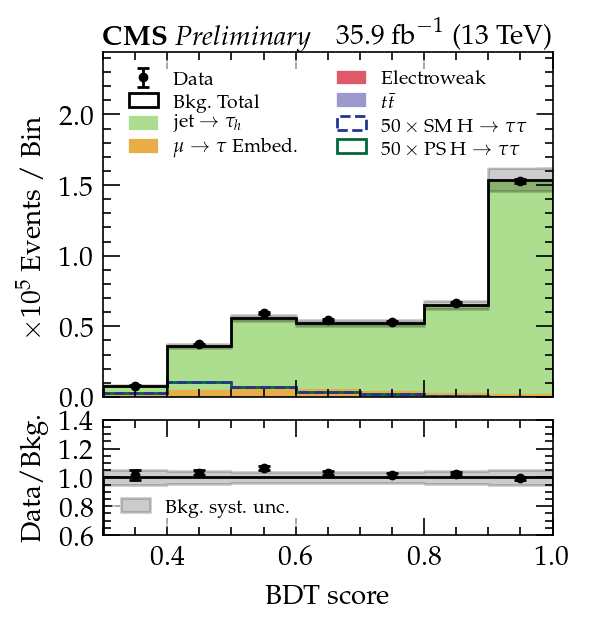

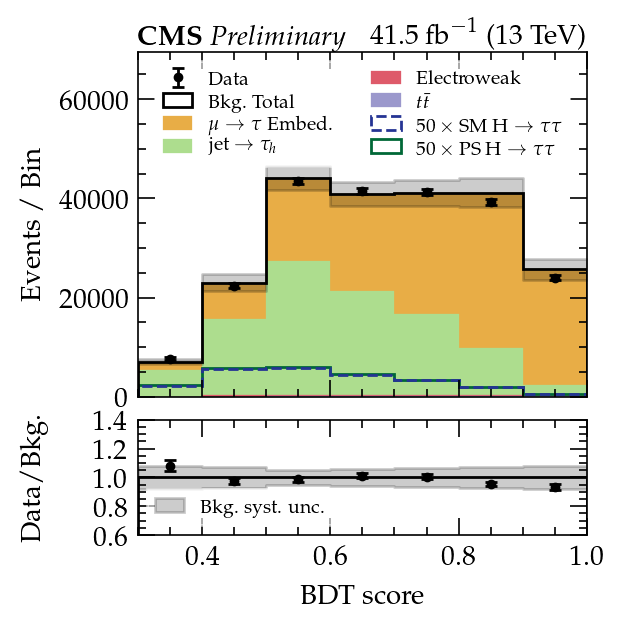

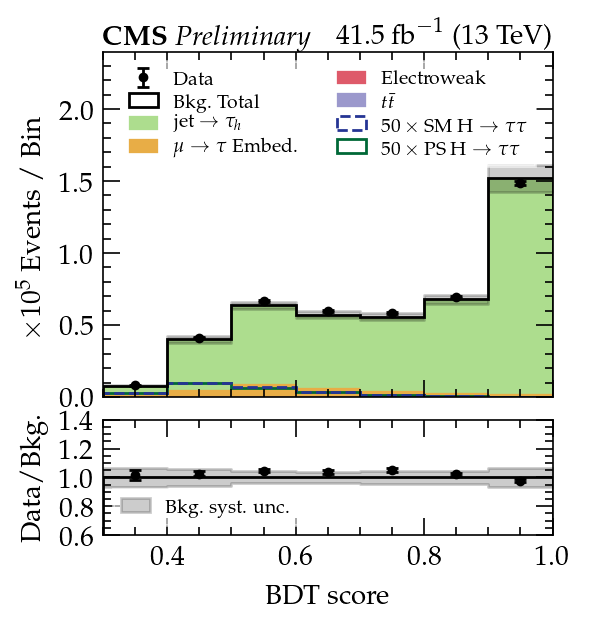

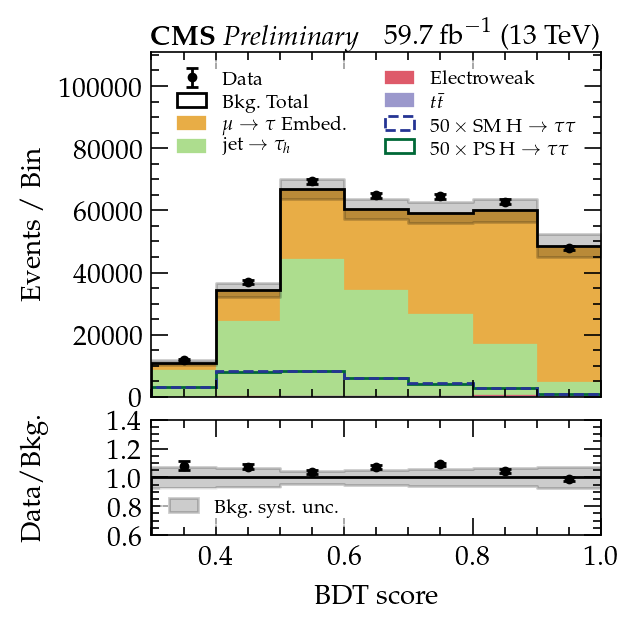

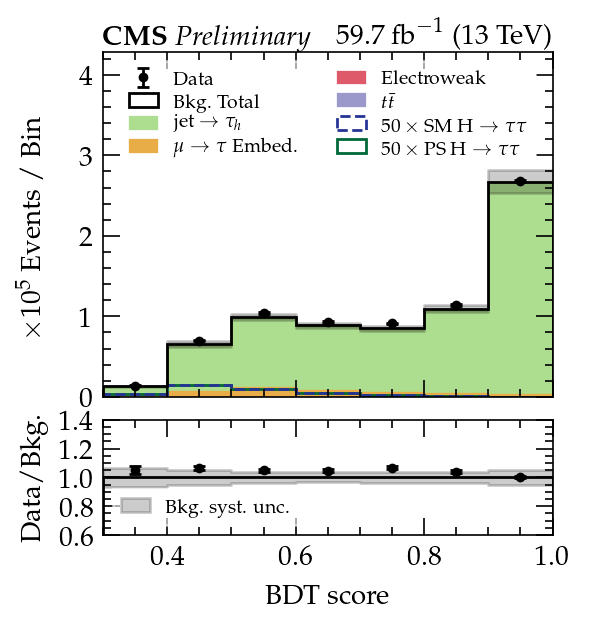

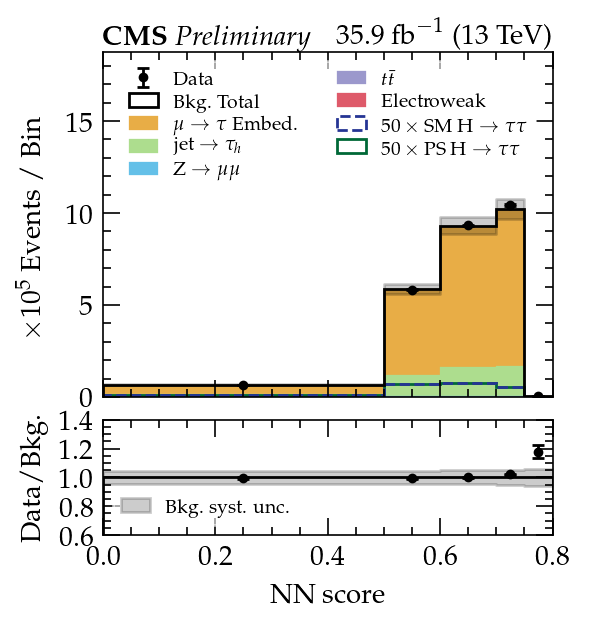

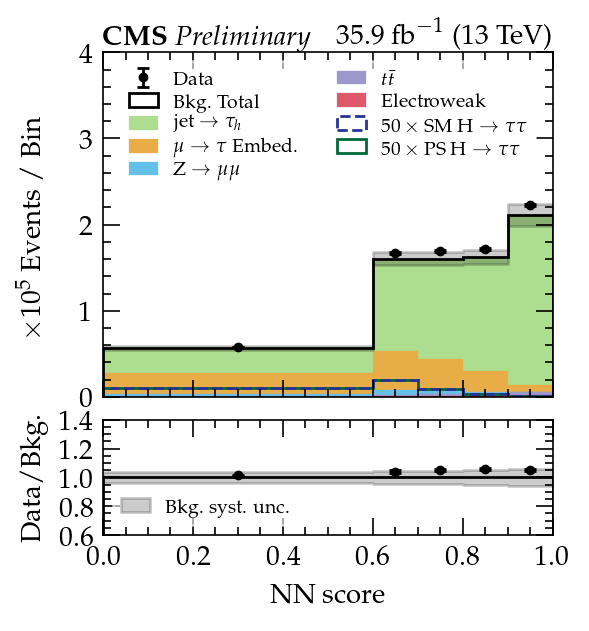

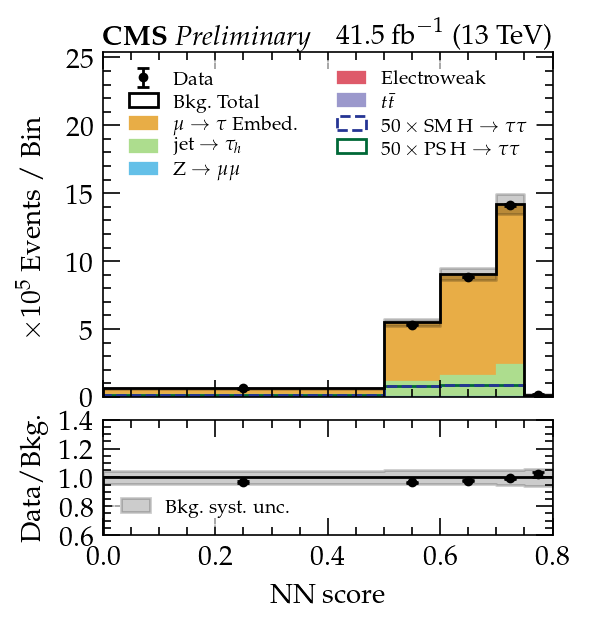

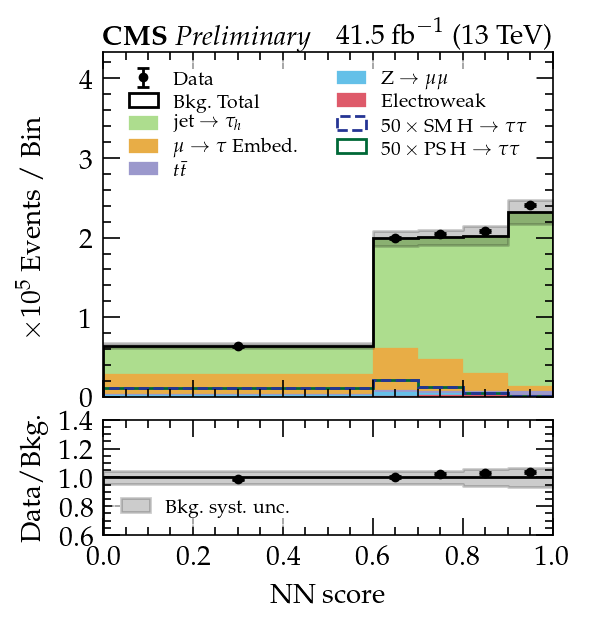

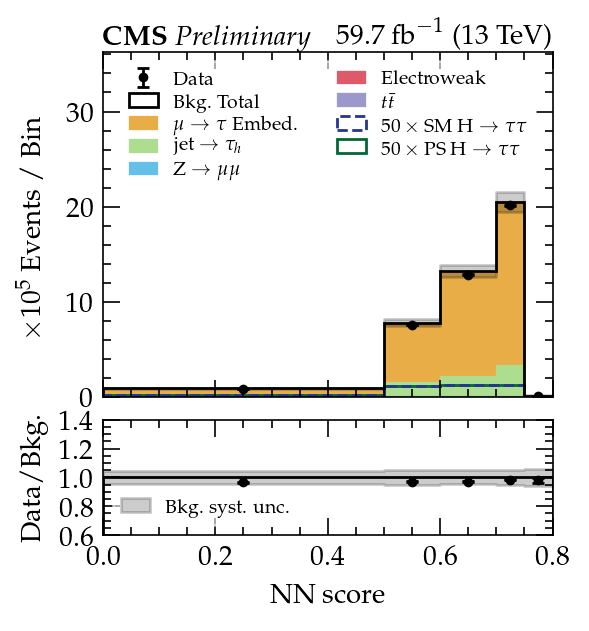

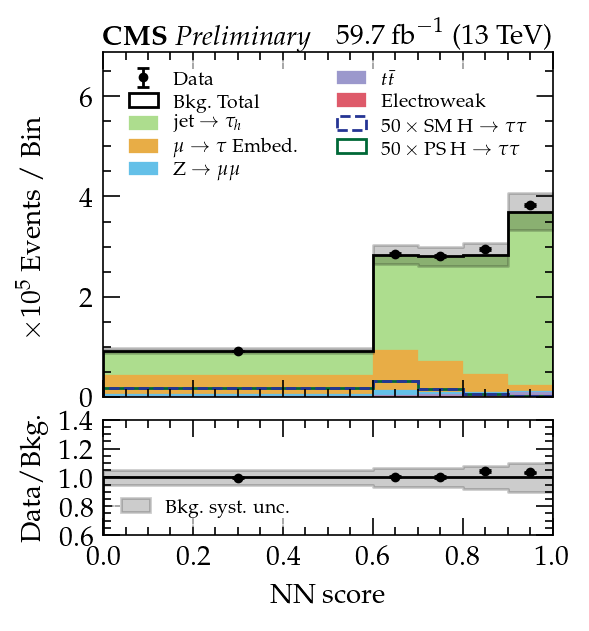

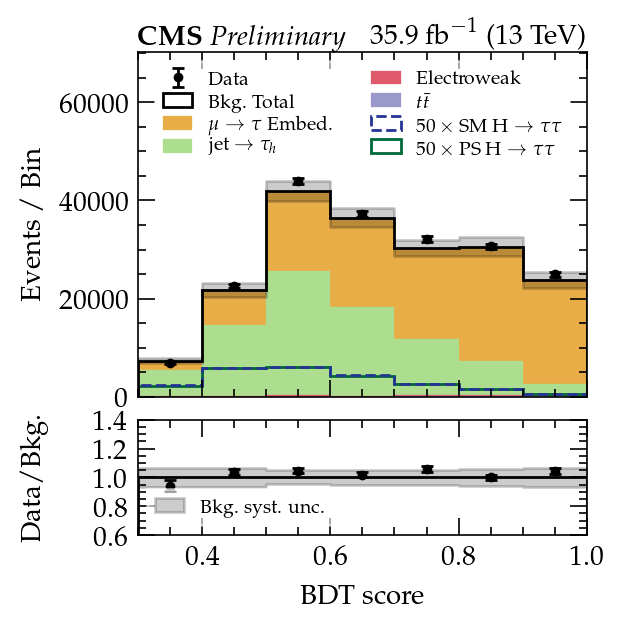

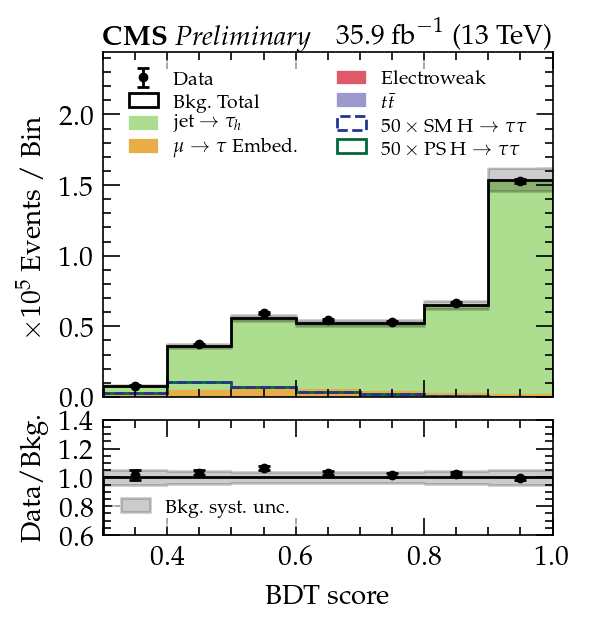

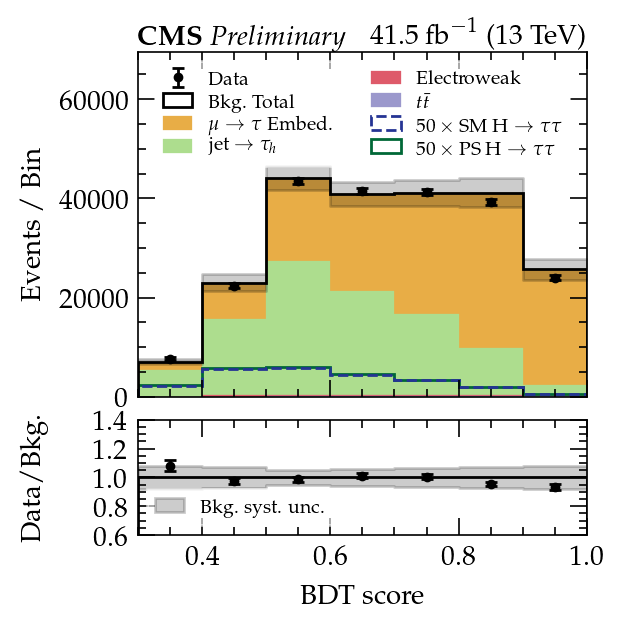

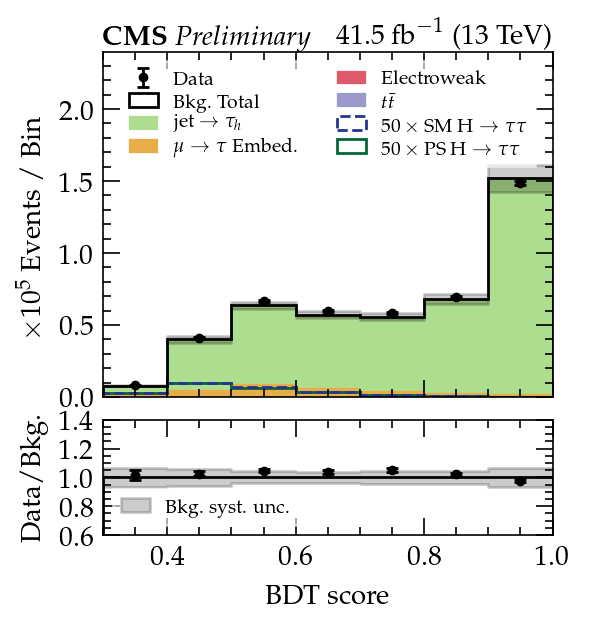

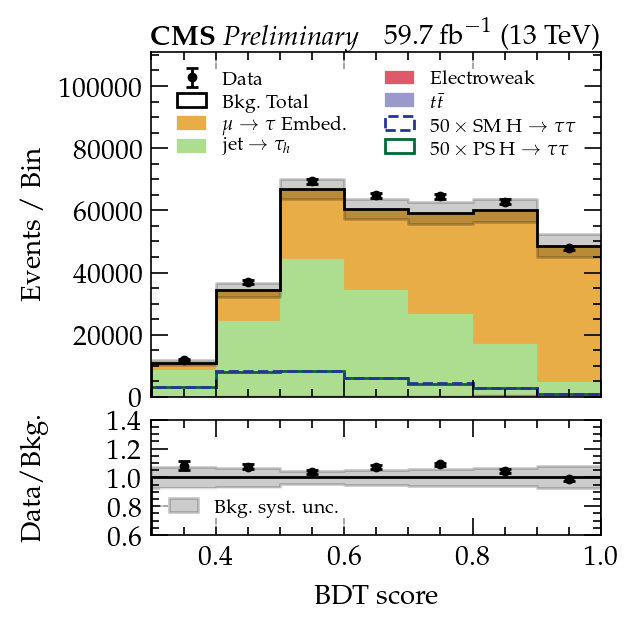

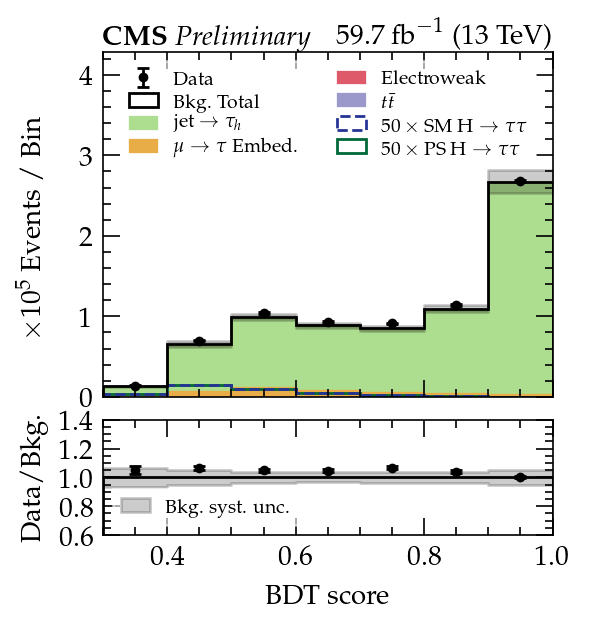

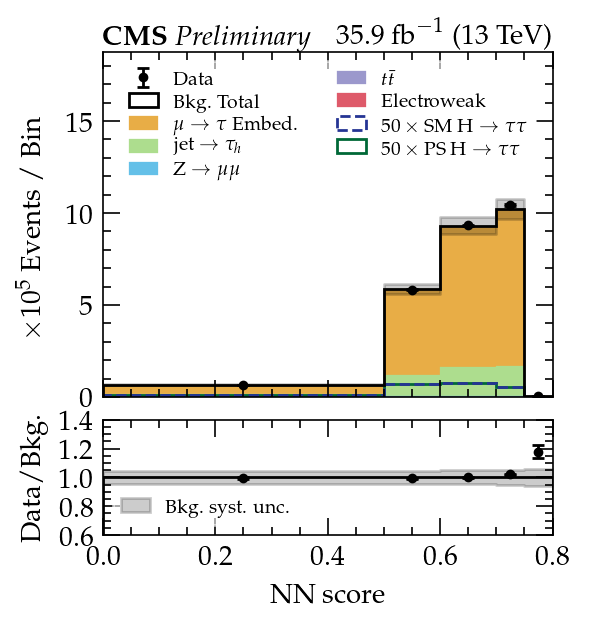

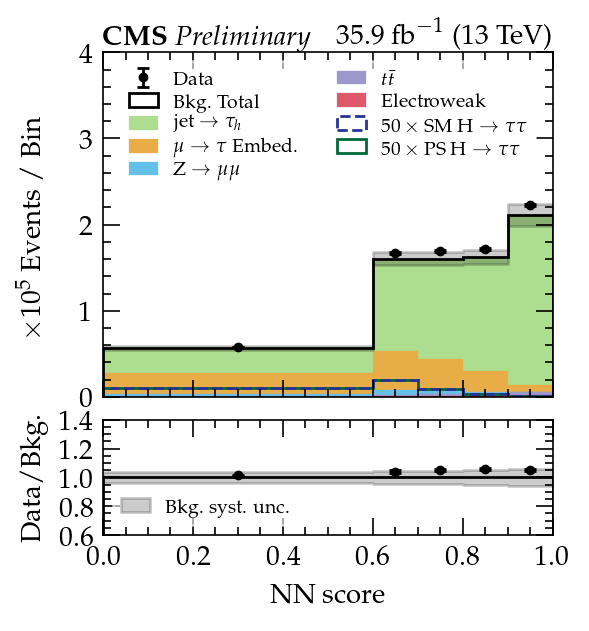

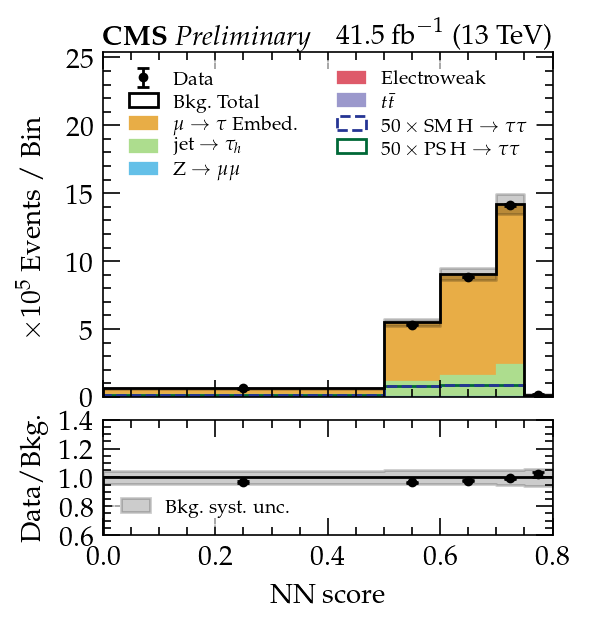

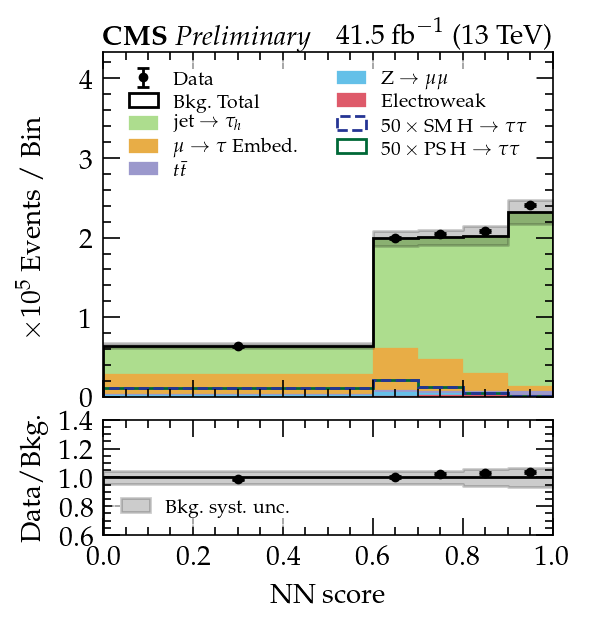

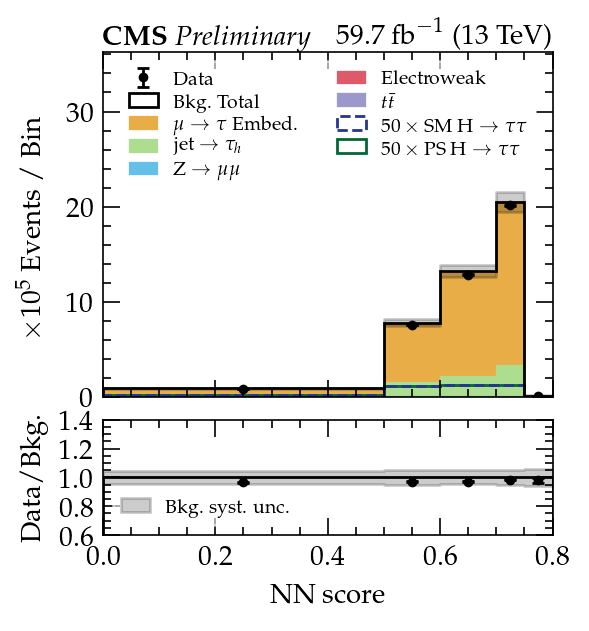

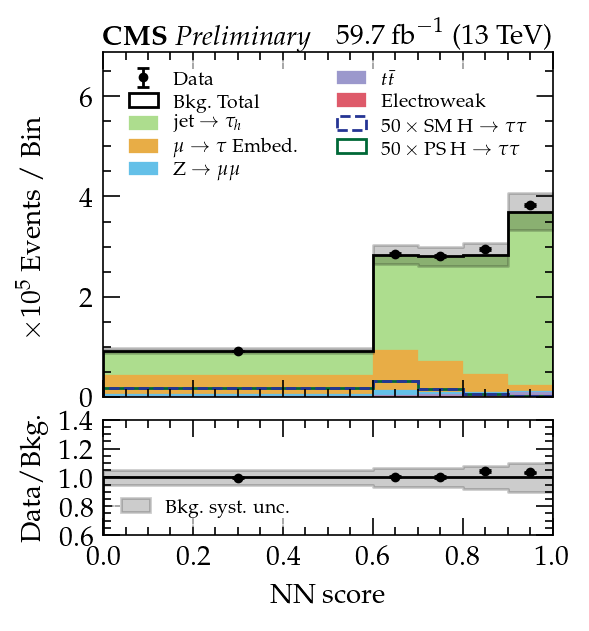

In [7]:
dir_ = "01052020"
for add in ["", "_mergeXbins"]:
    for channel in ["tt","mt"]:
        for year in ["2016","2017","2018"]:

            # draw background categories (not unrolled)
            for bin_number in list(range(1, 3)):
                category = "inclusive"
                
                if channel == "tt":
                    plot_var = "IC_15Mar2020_max_score"
                elif channel == "mt":
                    plot_var = "NN_score"
                
                # temporary (for prefit only):
                datacard = (
                    "/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
                    f"CombineHarvester/HTTSMCPDecays18/output/{dir_}{add}/shapes_eff_sm_prefitonly_{year}.root"
                )
                alt_datacard = (
                    "/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
                    f"CombineHarvester/HTTSMCPDecays18/output/{dir_}{add}/shapes_eff_ps_prefitonly_{year}.root"
                )
                directory = f"htt_{channel}_{year}_{bin_number}_13TeV_{to_plot}"
                
                if "higgs" in category:
                    blind = True
                else:
                    blind = False
            
                df_plot = create_df(datacard, directory, channel, processes, ch_kw)
                df_plot_alt = create_df(alt_datacard, directory, channel, processes, ch_kw)
                if df_plot_alt is not None:
                    df_plot = pd.concat([df_plot, df_plot_alt.loc[df_plot_alt.index.get_level_values("parent") == "H_ps"]], axis='index', sort=False)
                
                draw_1d(
                    df_plot, plot_var, channel, category, year, blind, fractions=fractions,
                    sigs=signals, signal_scale=signal_scale, ch_kw=ch_kw, process_kw=process_kw, 
                    var_kw=var_kw, leg_kw=leg_kw, unrolled=False, mcstat=True, mcsyst=True,
                    norm_bins=True, nbins=nbins_kw[channel][bin_number],
                    postfix=add,
                )

Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt
Loading data_obs
Loading EmbedZTT
Loading ZL
Loading TTT
Loading VVT
Loading jetFakes
Loading ggH_sm_htt
Loading qqH_sm_htt
Loading ggH_ps_htt
Loading qqH_ps_htt


/home/hep/akd116/miniconda2/envs/python3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/hep/akd116/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


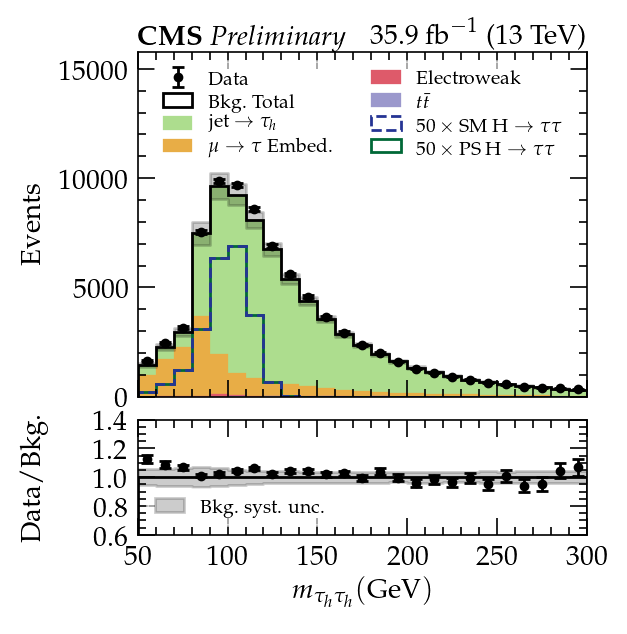

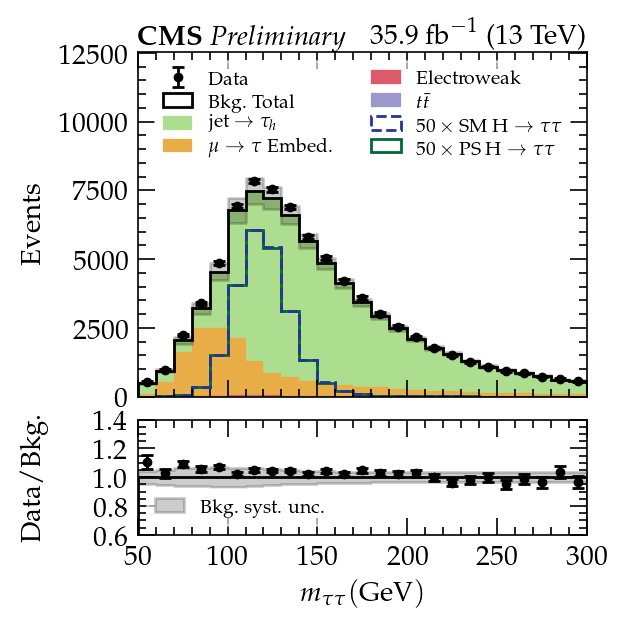

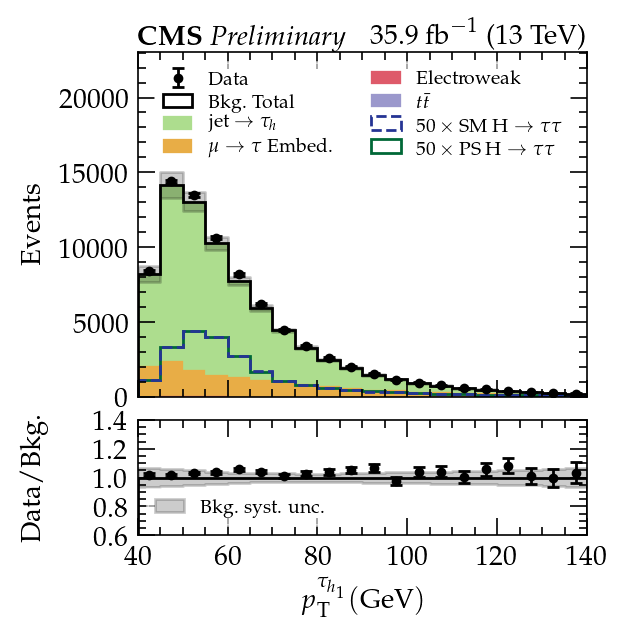

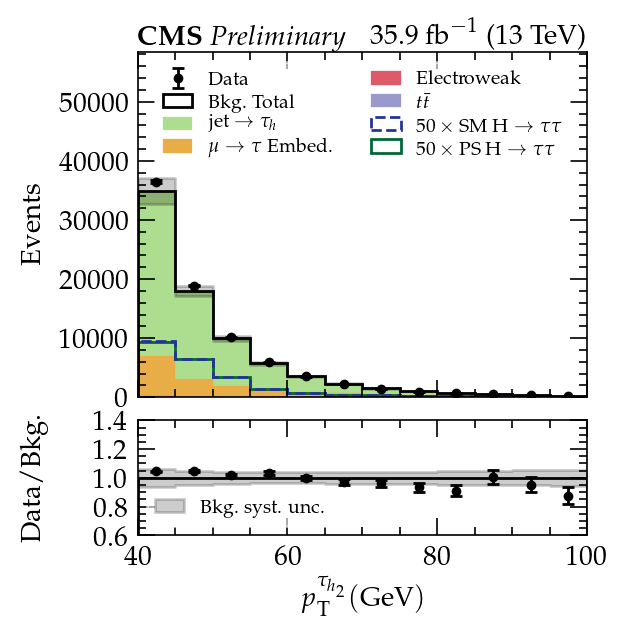

In [14]:
# for control plots in CH
# draw background categories (not unrolled)
channel = "tt"
year = "2016"
nbins_control_kw = {
    1: "m_vis",
    2: "svfit_mass",
    3: "pt_1", 
    4: "pt_2",
}
for bin_number in list(range(1, 5)):
    category = "inclusive"
    
    plot_var = nbins_control_kw[bin_number]
    
    # temporary (for prefit only):
    datacard = (
        #"/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
        #f"CombineHarvester/HTTSMCPDecays18/shapes_eff_sm_prefitonly.root"
        "/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
        f"CombineHarvester/HTTSMCPDecays18/shapes_eff_sm_control_{year}.root"
    )
    alt_datacard = (
        #"/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
        #f"CombineHarvester/HTTSMCPDecays18/shapes_eff_ps_prefitonly_{channel}_{year}.root"
        "/vols/build/cms/akd116/newest/Combine/Decays/CMSSW_10_2_13/src/"
        f"CombineHarvester/HTTSMCPDecays18/shapes_eff_ps_control_{year}.root"
    )
    directory = f"htt_{channel}_{year}_{bin_number}_13TeV_{to_plot}"
    
    blind = False

    df_plot = create_df(datacard, directory, channel, processes, ch_kw)
    df_plot_alt = create_df(alt_datacard, directory, channel, processes, ch_kw)
    if df_plot_alt is not None:
        df_plot = pd.concat([df_plot, df_plot_alt.loc[df_plot_alt.index.get_level_values("parent") == "H_ps"]], axis='index', sort=False)
    
    draw_1d(
        df_plot, plot_var, channel, category, year, blind, fractions=fractions,
        sigs=signals, signal_scale=signal_scale, ch_kw=ch_kw, process_kw=process_kw, 
        var_kw=var_kw, leg_kw=leg_kw, unrolled=False, mcstat=True, mcsyst=True,
        norm_bins=False, 
    )